# **AI for Security Project: IoT23**

## Here we are, CyberCats!
Gabriella Bertolino,

Guendalina Nardi,

Domenico Pittari,

Sofia Varotto.

<div style="text-align: center;">
<img src="https://i.imgur.com/4PPWmhJ.jpeg" alt="pciture" width="800"/>
</div>

#**Table of Contents**


1. [Import Section](#import-section)  
2. [Global Variables and Settings](#global-variables-and-settings)  
3. [Data Pre-Processing](#data-pre-processing)  
4. [Data loading and dataset structure](#data-loading-and-dataset-structure)  
5. [Dataset Summary Statistics](#dataset-summary-statistics)  
6. [Data Visualization](#data-visualization)  
   - [Analysis of Numeric Features](#analysis-of-numeric-features)  
7. [Data Preparation: outlier filtering](#data-preparation-outlier-filtering)  

8. [Supervised learning](#supervised-learning)  
   - [Linear Model](#linear-model)  
     - [Naive Bayes](#naive-bayes)  
     - [Naive Bayes with undersampled training data](#naive-bayes-with-undersampled-training-data)  
     - [SVM](#svm)  
   - [Non Linear](#non-linear)  
     - [SVM (RBF)](#svm-rbf)  
     - [SVC (RBF)](#svc-rbf)  
     - [KNN](#knn)  
       - [KNN with grid search](#knn-with-grid-search)  
       - [KNN Balanced (reducing class 1)](#knn-balanced-reducing-class-1)  
     - [Decision tree](#decision-tree)  
       - [Decision Tree with Gridsearch](#decision-tree-with-gridsearch)  
     - [MLP Neural Network](#mlp-neural-network)  
     - [Random Forest](#random-forest)  
       - [Random Forest with Gridsearch](#random-forest-with-gridsearch)  

9. [Boosting](#boosting)  
   - [AdaBoost](#adaboost)  
   - [Gradient Boosting](#gradient-boosting)  
   - [XG Boost](#xg-boost)  

10. [Unsupervised Learning](#unsupervised-learning)  
    - [Clustering](#clustering)  
      - [K-means clustering](#k-means-clustering)  
      - [t-SNE](#t-sne)  
      - [K-means Elbow Method](#k-means-elbow-method)  
        - [K-means Elbow Method with Homogeneity Score](#k-means-elbow-method-with-homogeneity-score)  
        - [K-means Elbow Method with Calinski–Harabasz Index](#k-means-elbow-method-with-calinskiharabasz-index)  
      - [K-Means Iterative Behavior](#k-means-iterative-behavior)  
        - [K-Means Iterations on Two Features](#k-means-iterations-on-two-features)  
        - [t-SNE 2D + K-Means Iterations](#t-sne-2d--k-means-iterations)  
      - [Hierarchical Clustering: model selection and dendrograms](#hierarchical-clustering-model-selection-and-dendrograms)  
        - [Data preparation](#data-preparation)  
        - [Homogeneity Score + Calinski–Harabasz Index](#homogeneity-score--calinskiharabasz-index)  
        - [Silhouette Score](#silhouette-score)  
        - [Ward Dendogram](#ward-dendogram)  
      - [Density-based Clustering](#density-based-clustering)  
        - [Homogeneity Score](#density-based-clustering-homogeneity-score)  
        - [Calinski–Harabasz Index](#density-based-clustering-calinskiharabasz-index)  
        - [Silhouette Score](#density-based-clustering-silhouette-score)  

11. [Anomaly Detection](#anomaly-detection)  
    - [LOF](#lof)  
    - [Isolation Forest](#isolation-forest)  
    - [One-class SVM](#one-class-svm)  
    - [Elliptic Envelope](#elliptic-envelope)  

12. [FINAL RESULTS](#final-results)  
13. [Conclusions](#conclusions)  

14. [Alternative Dataset Analysis](#alternative-dataset-analysis)  
    - [Numeric Feature Selection](#numeric-feature-selection)  
    - [Data Summary Statistics](#data-summary-statistics-1)  
    - [Data visualization](#data-visualization-1)  
    - [Models training and Testing](#models-training-and-testing)  
      - [SVM (RBF)](#svm-rbf-1)  
      - [Decision Tree](#decision-tree-1)  
      - [Random Forest](#random-forest-1)  
      - [KNN](#knn-1)  
    - [Results](#results)  
    - [Comparison between IoT-23 (our main dataset) and CIC-IDS2017 (alternative dataset)](#comparison-between-iot-23-our-main-dataset-and-cic-ids2017-alternative-dataset)




#**Import Section**


**Installation of external libraries (run in a separate cell only if needed)**

In [ ]:
!pip install -q xgboost imblearn lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


**Base imports: standard library, data handling, plotting**

In [ ]:
import os
import time
import random
import math
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Scikit-learn: model selection, preprocessing, pipeline**

In [ ]:
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    KFold,
    StratifiedShuffleSplit
)

from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    Binarizer
)

from sklearn.pipeline import make_pipeline

**Scikit-learn: classification / regression / clustering models**




Naive Bayes

In [ ]:
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
    BernoulliNB,
    ComplementNB
)

Linear models / SVM / k-NN

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, OneClassSVM
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor

Trees and ensemble methods

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    VotingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
    IsolationForest
)

Neural networks

In [ ]:
from sklearn.neural_network import MLPClassifier

Baseline models

In [ ]:
from sklearn.dummy import DummyClassifier

Clustering and dimensionality reduction

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Classical anomaly detection


In [ ]:
from sklearn.covariance import EllipticEnvelope

Other utilities

In [ ]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.calibration import CalibrationDisplay

Hierarchical clustering tools (SciPy)





In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

**Scikit-learn: metrics and scoring**

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    roc_auc_score,
    mean_squared_error,
    log_loss,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    calinski_harabasz_score,
    silhouette_score,
    make_scorer
)

**Imbalanced learning and external models**




In [ ]:
from imblearn.metrics import specificity_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from xgboost import XGBClassifier

**Explainability (LIME)**

In [ ]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

# Global Variables and Settings

This part of the notebook defines the **common environment** used to train and evaluate all machine-learning models.

* A global dictionary `RESULTS` and a list `MODELS_RESULTS` are initialized to store model performance.
* A fixed `RANDOM_SEED` is applied to both Python’s `random` and NumPy to ensure **reproducibility** in shuffling, model initialization, and sampling.
* A `metrics` dictionary maps human-readable names (**Accuracy**, **Precision**, **Recall**, **Specificity**, **F1 Score**) to their scoring functions, making it easy to loop over them later.
* ANSI color codes and a Matplotlib color palette are defined to keep **printed outputs and plots visually consistent**.
* Warnings are globally suppressed to reduce noise in the notebook.

The `ModelResult` class acts as a **container for model performance**:

* Each instance represents one trained model, storing:
  `name`, `accuracy`, `precision`, `recall`, `specificity`, `f1_score`, `roc`, and `auc`.
* The `from_array()` classmethod allows building an instance from an array of metrics plus ROC/AUC.
* Utility methods (`get_summary()`, `get_summary_2()`, `get_fpr_tpr()`) make it easy to:
  - aggregate metrics into tables,
  - compare models,
  - and access ROC curves for plotting.

Overall, this section provides a **standardized framework** to:
1. Run multiple models,
2. Store their metrics in a unified format,
3. And compare them consistently throughout the notebook.



In [ ]:
RESULTS={}
# Format Modelname_version:(accuracy,precision,recall,specificity,)

# random configuration
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# used for printing metrics
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "Specificity": specificity_score,
    "F1 Score": f1_score
}

# print with colors codes
RED = "\033[31m"
GREEN = "\033[32m"
CYAN = "\033[34m"
PURPLE = "\033[95m"
RESET = "\033[0m"


colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan', 'tab:purple', 'tab:gray', 'tab:olive']
warnings.filterwarnings("ignore")

In [ ]:
class ModelResult:
    """
    A class to represent the results of our machine learning models.
    """

    def __init__(self, name, accuracy, precision, recall, specificity,f1_score, roc, auc):
        self.name = name
        self.accuracy = accuracy
        self.precision = precision
        self.recall = recall
        self.specificity = specificity
        self.f1_score = f1_score
        self.roc = roc
        self.auc = auc

        # roc is a tuple made by:
        #  -fpr: 2d array of false positive rates
        #  -tpr: 2d true positive rates
        #  -thresholds: The decision thresholds corresponding to each pair of FPR and TPR


    @classmethod
    def from_array(cls, name, metrics, roc, auc):
        # Alternative constructor to create an instance of ModelMetrics using an array of metrics.
        # usage: model = ModelMetrics.from_array("Model_1", metrics_array, roc_tuple, auc_value)
        accuracy, precision, recall, specificity, f1_score = metrics
        return cls(name, accuracy, precision, recall, specificity, f1_score, roc, auc)


    def __repr__(self):
        return (f"ModelResult(name={self.name}, accuracy={self.accuracy:.8f}, "
                f"precision={self.precision:.8f}, recall={self.recall:.8f}, "
                f"specificity={self.specificity:.8f}, f1_score={self.f1_score:.8f}, "
                f"auc={self.auc:.8f}"
                )

    def get_summary(self):
        return {
            "accuracy": self.accuracy,
            "precision": self.precision,
            "recall": self.recall,
            "specificity": self.specificity,
            "f1_score": self.f1_score,
            "roc": self.roc,
            "auc": self.auc

        }

    def get_summary_2(self):
      return [self.name, self.accuracy, self.precision,self.recall, self.specificity, self.specificity]


    def get_fpr_tpr(self):
        return self.roc[0],self.roc[1]

METRICS = ['accuracy', 'precision', 'recall', 'specificity',  'f1_score']
#used for dynamically convert to attr. for comparison during result analysis

MODELS_RESULTS = []
#will store the objects of class ModelResult

# **Data Pre-Processing**

The IoT-23 dataset is originally distributed across multiple files.  
We first downloaded all of these files locally and combined them into a single unified dataset to simplify preprocessing and subsequent model training.

**Label Consolidation**

The dataset provided two separate label columns: **`label`** and **`detailed-label`**.  
Since a classifier can only learn one target column at a time, and because many of the detailed classes were redundant or described symptoms of the same attack, we merged these two columns into a single, numerically encoded label.

This reduces the number of classes and helps lower the computational burden when training on a dataset of roughly **1.5 million rows**.

**Categorical Encoding**

Two categorical fields, **`proto`** and **`conn_state`**, were one-hot encoded.  
This transformation ensures compatibility with machine-learning models that require numerical inputs and improves the interpretability of the correlation matrix generated later.

**Handling Missing Values**

Missing values in IoT-23 are encoded using **dashes**.  
Such placeholders cannot be used directly in most machine-learning algorithms.

We tested different strategies and found that:

- dashes were replaced with **0**, which yielded the best model performance;
- true missing values (**NaN**) were replaced with **-1**, to distinguish them from both valid zeros and the original dash placeholders.

**Dropping Non-Informative Columns**

The columns **`uid`**, **`id.orig_h`**, and **`id.resp_h`** were removed.  
Although they contain metadata such as capture IDs, host IPs, and responder ports, these fields offer little predictive value for attack classification and would unnecessarily inflate the feature space.



#**Data loading and dataset structure**

This section:
1. Loads the **IoT-23 combined dataset** directly from GitHub.
2. Verifies that all **25 columns** are correctly imported and that there are **no missing values**.
3. Summarizes the dataset structure:
   - data types (float, int, bool, categorical),
   - number of features per type,
   - column-level metadata (uniques, missing %, etc.).
4. Identifies categorical variables (in particular, the `label` column).
5. Explores the **class distribution** of the target variable `label`.



In [ ]:
#To avoid mounting drives, or uploading files to colab each time we retrieve the dataset from github.

url = "https://media.githubusercontent.com/media/clav3rwastaken/AI/refs/heads/main/iot23_combined.csv"


df = pd.read_csv(url, encoding="utf-8")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

duration  orig_bytes  resp_bytes  missed_bytes  orig_pkts  orig_ip_bytes  \
0  2.998796           0           0           0.0        3.0          180.0   
1  0.000000           0           0           0.0        1.0           60.0   
2  0.000000           0           0           0.0        1.0           60.0   
3  2.998804           0           0           0.0        3.0          180.0   
4  0.000000           0           0           0.0        1.0           60.0   

   resp_pkts  resp_ip_bytes                      label  proto_icmp  ...  \
0        0.0            0.0  PartOfAHorizontalPortScan       False  ...   
1        0.0            0.0  PartOfAHorizontalPortScan       False  ...   
2        0.0            0.0  PartOfAHorizontalPortScan       False  ...   
3        0.0            0.0                     Benign       False  ...   
4        0.0            0.0                     Benign       False  ...   

   conn_state_RSTOS0  conn_state_RSTR  conn_state_RSTRH  conn_state_S0  \
0              False            False             False           True   
1              False            False             False           True   
2              False            False             False           True   
3              False            False             False           True   
4              False            False             False           True   

   conn_state_S1  conn_state_S2  conn_state_S3  conn_state_SF  conn_state_SH  \
0          False          False          False          False          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   conn_state_SHR  
0           False  
1           False  
2           False  
3           False  
4           False  

[5 rows x 25 columns]

In [ ]:
#Check to verify that no NaN values are present in the datas
print(df.isna().sum())

duration             0
orig_bytes           0
resp_bytes           0
missed_bytes         0
orig_pkts            0
orig_ip_bytes        0
resp_pkts            0
resp_ip_bytes        0
label                0
proto_icmp           0
proto_tcp            0
proto_udp            0
conn_state_OTH       0
conn_state_REJ       0
conn_state_RSTO      0
conn_state_RSTOS0    0
conn_state_RSTR      0
conn_state_RSTRH     0
conn_state_S0        0
conn_state_S1        0
conn_state_S2        0
conn_state_S3        0
conn_state_SF        0
conn_state_SH        0
conn_state_SHR       0
dtype: int64


In [ ]:
#Let's check if the data is stored in the dataframe:
df

duration  orig_bytes  resp_bytes  missed_bytes  orig_pkts  \
0        2.998796           0           0           0.0        3.0   
1        0.000000           0           0           0.0        1.0   
2        0.000000           0           0           0.0        1.0   
3        2.998804           0           0           0.0        3.0   
4        0.000000           0           0           0.0        1.0   
...           ...         ...         ...           ...        ...   
1444669  0.000000           0           0           0.0        1.0   
1444670  0.000000           0           0           0.0        1.0   
1444671  0.000000           0           0           0.0        1.0   
1444672  0.000000           0           0           0.0        1.0   
1444673  0.000000           0           0           0.0        1.0   

         orig_ip_bytes  resp_pkts  resp_ip_bytes                      label  \
0                180.0        0.0            0.0  PartOfAHorizontalPortScan   
1                 60.0        0.0            0.0  PartOfAHorizontalPortScan   
2                 60.0        0.0            0.0  PartOfAHorizontalPortScan   
3                180.0        0.0            0.0                     Benign   
4                 60.0        0.0            0.0                     Benign   
...                ...        ...            ...                        ...   
1444669           40.0        0.0            0.0  PartOfAHorizontalPortScan   
1444670           40.0        0.0            0.0  PartOfAHorizontalPortScan   
1444671           40.0        0.0            0.0  PartOfAHorizontalPortScan   
1444672           40.0        0.0            0.0  PartOfAHorizontalPortScan   
1444673           40.0        0.0            0.0  PartOfAHorizontalPortScan   

         proto_icmp  ...  conn_state_RSTOS0  conn_state_RSTR  \
0             False  ...              False            False   
1             False  ...              False            False   
2             False  ...              False            False   
3             False  ...              False            False   
4             False  ...              False            False   
...             ...  ...                ...              ...   
1444669       False  ...              False            False   
1444670       False  ...              False            False   
1444671       False  ...              False            False   
1444672       False  ...              False            False   
1444673       False  ...              False            False   

         conn_state_RSTRH  conn_state_S0  conn_state_S1  conn_state_S2  \
0                   False           True          False          False   
1                   False           True          False          False   
2                   False           True          False          False   
3                   False           True          False          False   
4                   False           True          False          False   
...                   ...            ...            ...            ...   
1444669             False           True          False          False   
1444670             False           True          False          False   
1444671             False           True          False          False   
1444672             False           True          False          False   
1444673             False           True          False          False   

         conn_state_S3  conn_state_SF  conn_state_SH  conn_state_SHR  
0                False          False          False           False  
1                False          False          False           False  
2                False          False          False           False  
3                False          False          False           False  
4                False          False          False           False  
...                ...            ...            ...             ...  
1444669          False          False          False           F

#**Dataset Summary Statistics**

This section performs an exploratory summary of the IoT-23 dataset structure.  
It reports the dataset shape, column types, missing-value diagnostics, metadata for each feature, the list of categorical columns, and the distribution of the target variable.



In [ ]:
# Print basic shape (rows, columns) of the dataset
rows, cols = df.shape
print("=== A.1 | SHAPE ===")
print(f"File: {url}")
print(f"Rows: {rows:,}  |  Cols: {cols:,}\n")

=== A.1 | SHAPE ===
File: https://media.githubusercontent.com/media/clav3rwastaken/AI/refs/heads/main/iot23_combined.csv
Rows: 1,444,674  |  Cols: 25



In [ ]:
# Show column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444674 entries, 0 to 1444673
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   duration           1444674 non-null  float64
 1   orig_bytes         1444674 non-null  int64  
 2   resp_bytes         1444674 non-null  int64  
 3   missed_bytes       1444674 non-null  float64
 4   orig_pkts          1444674 non-null  float64
 5   orig_ip_bytes      1444674 non-null  float64
 6   resp_pkts          1444674 non-null  float64
 7   resp_ip_bytes      1444674 non-null  float64
 8   label              1444674 non-null  object 
 9   proto_icmp         1444674 non-null  bool   
 10  proto_tcp          1444674 non-null  bool   
 11  proto_udp          1444674 non-null  bool   
 12  conn_state_OTH     1444674 non-null  bool   
 13  conn_state_REJ     1444674 non-null  bool   
 14  conn_state_RSTO    1444674 non-null  bool   
 15  conn_state_RSTOS0  1444674 non-n

In [ ]:
# Count how many columns belong to each dtype
dtype_counts = df.dtypes.astype(str).value_counts().rename_axis("dtype").reset_index(name="n_cols")
print("\n=== A.1 | DTYPE SUMMARY ===")
print(dtype_counts.to_string(index=False))


=== A.1 | DTYPE SUMMARY ===
  dtype  n_cols
   bool      16
float64       6
  int64       2
 object       1


In [ ]:
# Build column-level metadata (dtype, n_unique, missing count/%)
col_meta = (
    pd.DataFrame({
        "column": df.columns,
        "dtype": df.dtypes.astype(str).values,
        "n_unique": [df[c].nunique(dropna=False) for c in df.columns],
        "n_missing": [df[c].isna().sum() for c in df.columns],
    })
    .assign(missing_pct=lambda x: (x["n_missing"]/rows*100).round(4))
    .sort_values(["dtype","column"])
)
print("\n=== A.1 | COLUMN META (prime 20 righe) ===")
print(col_meta.head(20).to_string(index=False))


=== A.1 | COLUMN META (prime 20 righe) ===
           column   dtype  n_unique  n_missing  missing_pct
   conn_state_OTH    bool         2          0          0.0
   conn_state_REJ    bool         2          0          0.0
  conn_state_RSTO    bool         2          0          0.0
conn_state_RSTOS0    bool         2          0          0.0
  conn_state_RSTR    bool         2          0          0.0
 conn_state_RSTRH    bool         2          0          0.0
    conn_state_S0    bool         2          0          0.0
    conn_state_S1    bool         2          0          0.0
    conn_state_S2    bool         2          0          0.0
    conn_state_S3    bool         2          0          0.0
    conn_state_SF    bool         2          0          0.0
    conn_state_SH    bool         2          0          0.0
   conn_state_SHR    bool         2          0          0.0
       proto_icmp    bool         2          0          0.0
        proto_tcp    bool         2          0          

In [ ]:
# Identify categorical columns (object dtype)
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("=== A.2 | CATEGORICAL COLUMNS ===")
print(f"Categorical columns found: {categorical_cols}\n")

=== A.2 | CATEGORICAL COLUMNS ===
Categorical columns found: ['label']



In [ ]:
# Quick inspection of each categorical variable
for col in categorical_cols:
  unique_vals = df[col].nunique()
  print(f"Column: {col}")
  print(f" - Number of unique values: {unique_vals}")
  print(f" - Example values: {df[col].unique()[:5]}")
  print("-" * 40)

Column: label
 - Number of unique values: 12
 - Example values: ['PartOfAHorizontalPortScan' 'Benign' 'Okiru' 'DDoS' 'C&C-HeartBeat']
----------------------------------------


In [ ]:
# Compute frequency and percentage distribution of target label
if 'label' in df.columns:
    label_counts = df['label'].value_counts().sort_values(ascending=False)
    label_percent = (label_counts / len(df) * 100).round(2)

    print("\n=== A.2 | Distribution of the target variable 'label' ===")
    for label, count in label_counts.items():
        print(f"{label:30s} {count:6d}  ({label_percent[label]}%)")


=== A.2 | Distribution of the target variable 'label' ===
PartOfAHorizontalPortScan      825939  (57.17%)
Okiru                          262690  (18.18%)
Benign                         197809  (13.69%)
DDoS                           138777  (9.61%)
C&C                             15100  (1.05%)
Attack                           3915  (0.27%)
C&C-HeartBeat                     349  (0.02%)
C&C-FileDownload                   43  (0.0%)
C&C-Torii                          30  (0.0%)
FileDownload                       13  (0.0%)
C&C-HeartBeat-FileDownload          8  (0.0%)
C&C-Mirai                           1  (0.0%)


The dataset inspection confirms that the IoT-23 dataframe contains **1,444,674 rows and 25 columns**, consistent with the full aggregated dataset.

All columns have **1,444,674 non-null values**, meaning there are **no missing data points**.😺  
Four dtypes are present: `float64`, `int64`, `bool`, and one `object` column (`label`). A dtype summary shows that most features are **boolean** (16), followed by a smaller set of continuous numeric variables and a single categorical target.

The column-level metadata table confirms that:
- boolean fields always have exactly **two unique values**,  
- numeric features display wide variability,  
- the percentage of missing values is **0%** for all features.

Categorical analysis identifies a single categorical feature, **`label`**, with **12 distinct traffic classes**.

The class distribution reveals a **strongly imbalanced dataset**:
- *PartOfAHorizontalPortScan* ≈ 57% of all samples,  
- *Okiru* and *Benign* ≈ 18% and 14%,  
- multiple classes are extremely rare (some with only a few samples, e.g., *C&C-Mirai* with just one instance). 😾  

This confirms that downstream ML models will likely require **class balancing strategies** (resampling, class weighting, or anomaly-focused methods) to avoid bias toward majority classes.


Overall, the exploratory summary confirms that the dataset is **complete, clean, highly imbalanced**, and composed mainly of boolean indicators and heavily skewed numeric variables.


#**Data Visualization**

This block builds a horizontal bar chart of the target variable `label`, using a logarithmic x-axis to highlight the strong imbalance between very frequent and very rare traffic classes.



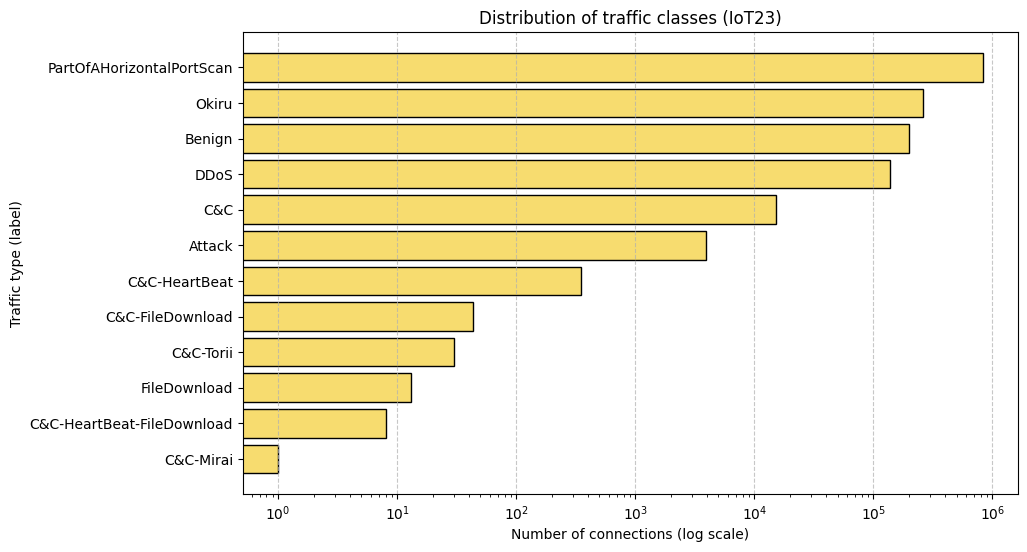

In [ ]:
# Plot: class distribution
plt.figure(figsize=(10, 6))
plt.barh(label_counts.index, label_counts.values, color='#F7DC6F', edgecolor='black')
plt.xlabel("Number of connections (log scale)")
plt.ylabel("Traffic type (label)")
plt.title("Distribution of traffic classes (IoT23)")
plt.xscale('log')  #Logaritmic scale
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


The bar chart shows a **highly skewed distribution** of traffic classes in the dataset.  
PartOfAHorizontalPortScan is by far the dominant class, representing the majority of connections, followed by Okiru, Benign, and DDoS.  

Classes such as C&C-Mirai, FileDownload, or C&C-FileDownload have extremely low frequencies, in some cases close to zero. 😾  
This confirms a severe class imbalance, meaning that most machine learning models will naturally favor the majority classes unless the dataset is rebalanced.

The logarithmic x-axis makes the wide variation in class counts clearly visible.  



##Analysis of Numeric Features

In this section we explore the numeric traffic features:

* we list all numeric columns (bytes, packets, and duration-related variables),
* compute detailed descriptive statistics (including kurtosis and skewness),
* visualize distributions with log-scale histograms,
* and inspect variability and outliers using log-transformed and standard boxplots.

The goal is to understand how heavy-tailed and skewed these variables are before applying scaling or transformations.


In [ ]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
print("=== A.3 | NUMERIC COLUMNS ===")
print(f"Numeric columns found ({len(num_cols)}): {num_cols}\n")

=== A.3 | NUMERIC COLUMNS ===
Numeric columns found (8): ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']



In [ ]:
# Descriptive stats and detection of heavy tails/skewness
desc = df[num_cols].describe().T
desc["median"] = df[num_cols].median()
desc["kurtosis"] = df[num_cols].kurtosis()
desc["skewness"] = df[num_cols].skew()
desc = desc[["count","mean","std","min","25%","median","75%","max","kurtosis","skewness"]].round(4)
display(desc)

heavy_tail = desc[desc["kurtosis"] > 3].index.tolist()
skewed = desc[abs(desc["skewness"]) > 1].index.tolist()

print("Variables with kurtosis > 3 (heavy tails):", heavy_tail)
print("Variables with |skewness| > 1 (asymmetric):", skewed)

count       mean           std  min   25%  median   75%  \
duration       1444674.0     0.3061  8.568450e+01 -1.0  -1.0     0.0   0.0   
orig_bytes     1444674.0  2725.2424  1.714763e+06 -1.0  -1.0     0.0   0.0   
resp_bytes     1444674.0    18.0128  9.726978e+03 -1.0  -1.0     0.0   0.0   
missed_bytes   1444674.0     0.1989  4.241970e+01  0.0   0.0     0.0   0.0   
orig_pkts      1444674.0   178.0510  7.230421e+04  0.0   1.0     1.0   2.0   
orig_ip_bytes  1444674.0  7745.5247  2.849409e+06  0.0  40.0    40.0  80.0   
resp_pkts      1444674.0     0.1258  1.547440e+01  0.0   0.0     0.0   0.0   
resp_ip_bytes  1444674.0    28.4604  1.014930e+04  0.0   0.0     0.0   0.0   

                        max      kurtosis   skewness  
duration       4.897682e+04  2.056966e+05   435.1168  
orig_bytes     1.744830e+09  8.134994e+05   864.2769  
resp_bytes     1.166102e+07  1.429759e+06  1192.7021  
missed_bytes   2.027200e+04  1.013789e+05   292.8285  
orig_pkts      6.602735e+07  5.281709e+05   657.5683  
orig_ip_bytes  1.914793e+09  2.995212e+05   514.6909  
resp_pkts      9.307000e+03  2.648962e+05   502.6525  
resp_ip_bytes  1.207699e+07  1.387782e+06  1166.7614

Variables with kurtosis > 3 (heavy tails): ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']
Variables with |skewness| > 1 (asymmetric): ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']


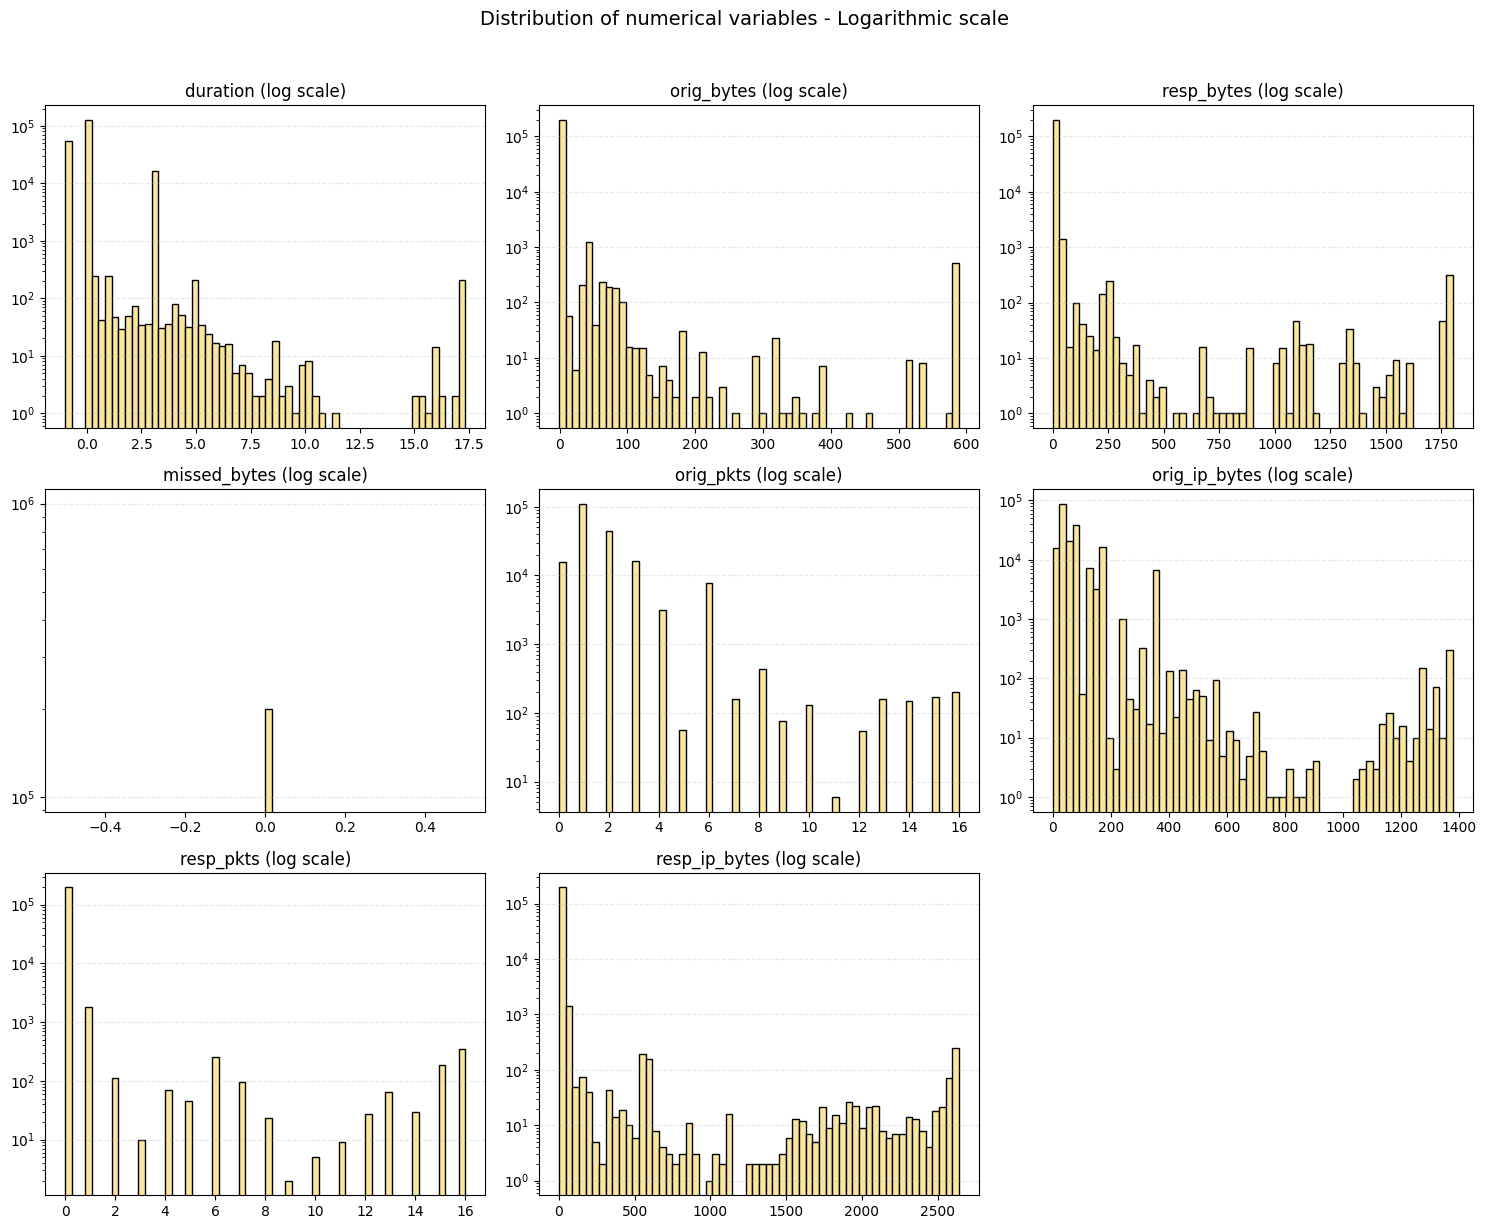

In [ ]:
def quick_numeric_distributions_log(
    df,
    cols=None,
    max_plots=8,
    sample=200_000,
    bins=50,
    clip_quantiles=(0.001, 0.999)
):

    # Select numeric columns if no specific list is provided.
    if cols is None:
        cols = df.select_dtypes(include=["number"]).columns.tolist()


    # Use a random sample of the dataset to speed up plotting on large data.
    df_ = df.sample(sample, random_state=42) if (sample and len(df) > sample) else df

    # Prepare a subplot grid based on how many variables will be visualized.
    n = min(len(cols), max_plots)
    rows = (n + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
    axes = np.array(axes).reshape(-1)

    # For each selected numeric column, clean extreme values and plot its histogram in log scale.
    for ax, col in zip(axes, cols[:n]):
        s = df_[col].replace([np.inf, -np.inf], np.nan).dropna()
        if clip_quantiles:
            lo, hi = s.quantile(clip_quantiles)
            s = s.clip(lo, hi)

        ax.hist(s.values, bins=bins, color="#F9E79F", edgecolor="black", log=True)
        ax.set_title(f"{col} (log scale)")
        ax.grid(axis='y', linestyle='--', alpha=0.3)

    # Remove unused subplot axes if fewer plots than grid slots are used.
    for ax in axes[n:]:
        ax.remove()

    # Add an overall title and adjust the layout.
    fig.suptitle("Distribution of numerical variables - Logarithmic scale", y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()


# Call the function to visualize up to eight numeric variable distributions.
quick_numeric_distributions_log(
    df,
    max_plots=8,
    sample=200_000,
    bins=60,
    clip_quantiles=(0.001, 0.999)
)

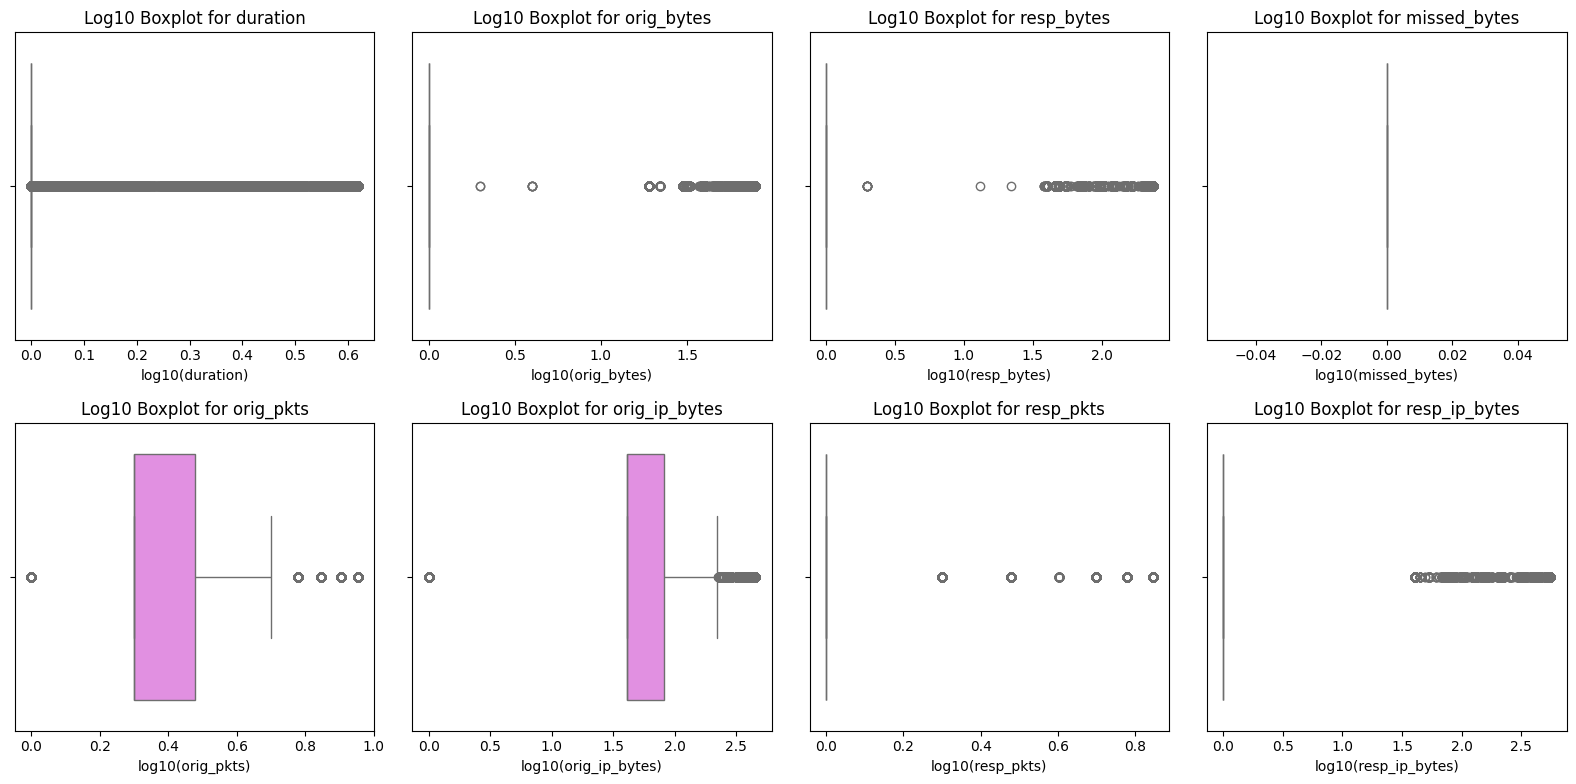

In [ ]:
# Select all numeric columns (integers and floats) from the dataset.
numeric_features = df.select_dtypes(include=["float64", "float32", "int64", "int32"]).columns.tolist()

# Identify numeric features that are binary (i.e., contain only two unique values).
binary_columns = [c for c in numeric_features if df[c].nunique() <= 2]

# Keep only continuous numeric features by excluding binary ones.
final_columns = [c for c in numeric_features if c not in binary_columns]

# Apply log10 transformation (with +1 shift) after clipping negative values to zero.
df_log10 = df[final_columns].clip(lower=0).apply(lambda x: np.log10(x + 1))

# Copy transformed data and cap extreme values at the 99.5th percentile to reduce visual distortion.
df_vis = df_log10.copy()
for col in final_columns:
    upper = df_vis[col].quantile(0.995)
    df_vis[col] = np.minimum(df_vis[col], upper)

# Compute the number of rows and columns needed for the boxplot grid layout.
num_plots = len(final_columns)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplot figure for the boxplots.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))
axes = axes.ravel()

# Set a clean visual theme for the plots.
sns.set_theme(style="whitegrid")

# Generate a log-scaled boxplot for each continuous numeric feature.
for i, col in enumerate(final_columns):
    sns.boxplot(
        x=df_vis[col],
        ax=axes[i],
        color="violet"
    )
    axes[i].set_title(f"Log10 Boxplot for {col}", fontsize=12)
    axes[i].set_xlabel(f"log10({col})")

# Disable unused subplot axes if the grid has extra slots.
for j in range(len(final_columns), len(axes)):
    axes[j].axis("off")

# Adjust spacing and display the full figure.
plt.tight_layout()
plt.show()

In [ ]:
# Drop columns that are not useful for correlation (like strings)
columns_to_drop = ['UID', 'id.orig_h', 'id.resp_h', 'proto']
df_cleaned = df.drop(columns=[c for c in columns_to_drop if c in df.columns])

# Keep only numeric columns
df_numeric = df_cleaned.select_dtypes(include=['float64', 'float32', 'int64', 'int32'])

print("Numeric columns used for correlation:", df_numeric.columns.tolist())

Numeric columns used for correlation: ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']


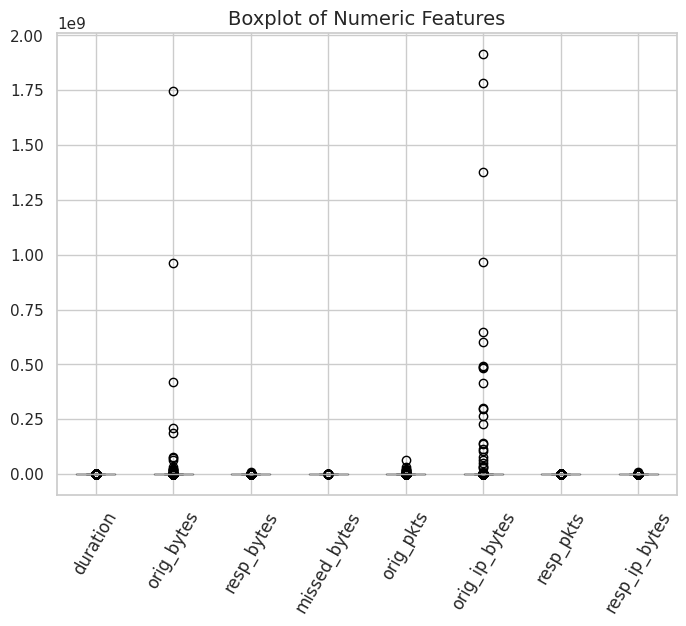

In [ ]:
# Generate a standard boxplot for all numeric features to quickly inspect their spread, variability, and presence of outliers.
plt.figure(figsize=(8, 6))
df_numeric.boxplot()

plt.xticks(rotation=60, fontsize=12)
plt.title("Boxplot of Numeric Features", fontsize=14)
plt.show()

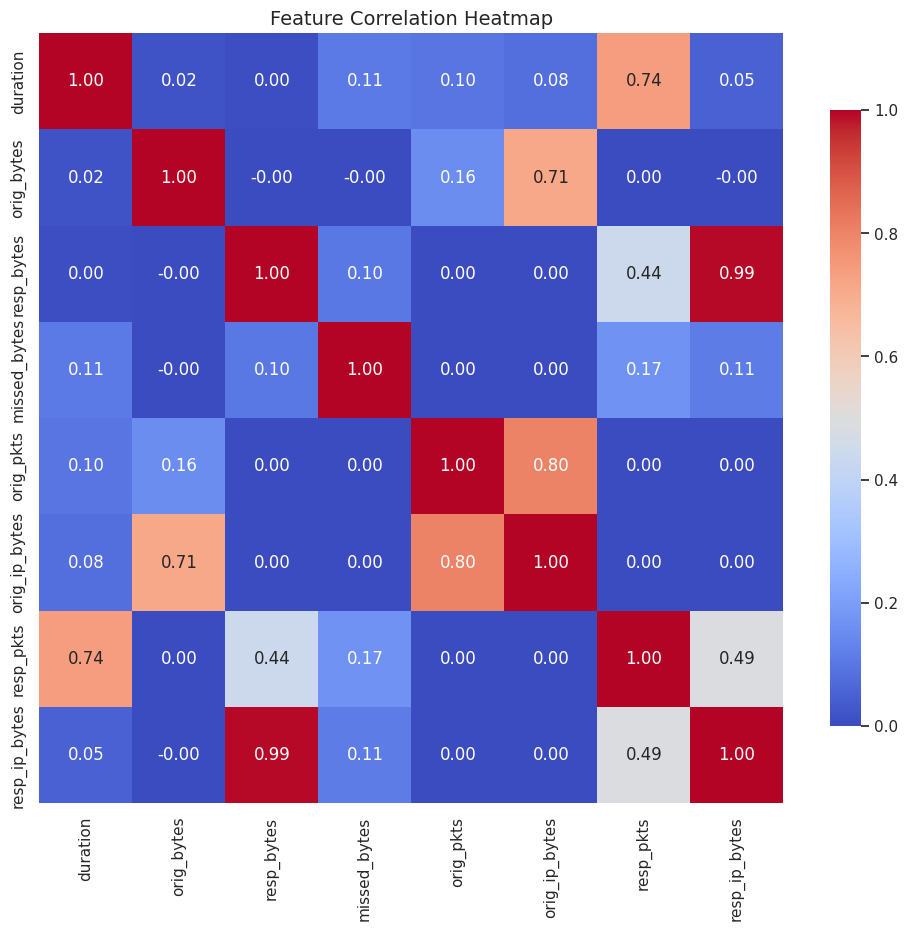


=== Highly Correlated Feature Pairs (|corr| ≥ 0.7) ===
duration                  ↔ resp_pkts                 :  corr = 0.739
orig_bytes                ↔ orig_ip_bytes             :  corr = 0.712
resp_bytes                ↔ resp_ip_bytes             :  corr = 0.993
orig_ip_bytes             ↔ orig_pkts                 :  corr = 0.804


In [ ]:
# Compute the correlation matrix for all numeric features.
corr_matrix = df_numeric.corr()

# Plot a heatmap to visually inspect correlations between numeric variables.
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar_kws={"shrink": 0.8}
)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# Extract correlation values for the target label if present, otherwise fallback to the first column.
if 'label' in df_numeric.columns:
    target_corr = corr_matrix['label'].sort_values(ascending=False)
else:
    target_corr = corr_matrix.iloc[0].sort_values(ascending=False)  # fallback

# Identify pairs of features whose absolute correlation is above the threshold (|corr| ≥ 0.7).
high_corr_pairs = set()

print("\n=== Highly Correlated Feature Pairs (|corr| ≥ 0.7) ===")

# Iterate through the matrix to detect strongly correlated feature pairs.
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            value = corr_matrix.loc[col1, col2]
            if abs(value) >= 0.7:
                pair = tuple(sorted([col1, col2]))
                if pair not in high_corr_pairs:
                    high_corr_pairs.add(pair)
                    print(f"{pair[0]:25} ↔ {pair[1]:25} :  corr = {value:.3f}")

In [ ]:
# Map all string-based attack labels to numeric class codes to prepare the dataset for modeling.
df_cat = df.replace({"label":{"Benign":0,"C&C":1,"C&C-FileDownload":1,"C&C-HeartBeat":2,'C&C-HeartBeat-FileDownload':2,
                               "PartOfAHorizontalPortScan":8,'Okiru':7,'DDoS':5,'C&C-Torii':4,'Attack':9,
                               'FileDownload':6,'C&C-Mirai':3}})

# Display the unique numeric class values to verify correct label encoding.
df_cat.label.unique()

# Show dataset structure after encoding to confirm the transformation was applied successfully.
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444674 entries, 0 to 1444673
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   duration           1444674 non-null  float64
 1   orig_bytes         1444674 non-null  int64  
 2   resp_bytes         1444674 non-null  int64  
 3   missed_bytes       1444674 non-null  float64
 4   orig_pkts          1444674 non-null  float64
 5   orig_ip_bytes      1444674 non-null  float64
 6   resp_pkts          1444674 non-null  float64
 7   resp_ip_bytes      1444674 non-null  float64
 8   label              1444674 non-null  int64  
 9   proto_icmp         1444674 non-null  bool   
 10  proto_tcp          1444674 non-null  bool   
 11  proto_udp          1444674 non-null  bool   
 12  conn_state_OTH     1444674 non-null  bool   
 13  conn_state_REJ     1444674 non-null  bool   
 14  conn_state_RSTO    1444674 non-null  bool   
 15  conn_state_RSTOS0  1444674 non-n

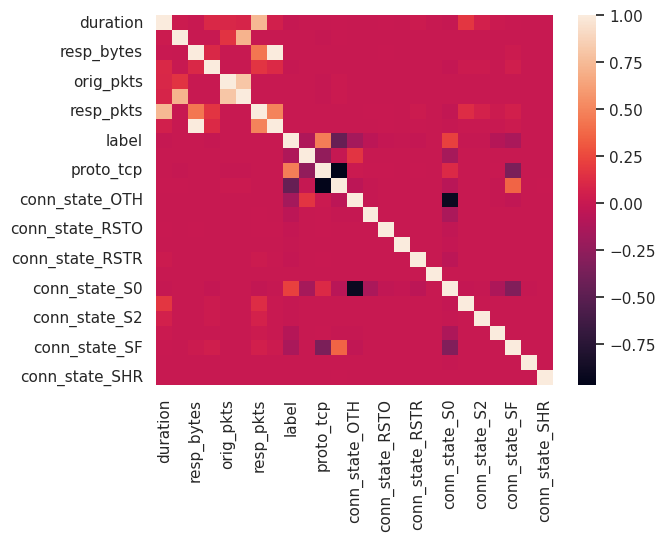

duration  orig_bytes  resp_bytes  missed_bytes  orig_pkts  \
duration           1.000000    0.019200    0.004783      0.107435   0.095932   
orig_bytes         0.019200    1.000000   -0.000003     -0.000005   0.155556   
resp_bytes         0.004783   -0.000003    1.000000      0.102040   0.000065   
missed_bytes       0.107435   -0.000005    0.102040      1.000000   0.000022   
orig_pkts          0.095932    0.155556    0.000065      0.000022   1.000000   
orig_ip_bytes      0.079761    0.712319    0.000093      0.000027   0.804117   
resp_pkts          0.738517    0.000005    0.437877      0.170280   0.000175   
resp_ip_bytes      0.050458   -0.000003    0.992827      0.110690   0.000074   
label             -0.008987   -0.000811   -0.002575     -0.009035  -0.001471   
proto_icmp         0.000634   -0.000079   -0.000093     -0.000236  -0.000123   
proto_tcp         -0.002193   -0.007817    0.000120      0.000953  -0.011999   
proto_udp          0.002095    0.008090   -0.000099     -0.000921   0.012417   
conn_state_OTH    -0.000008   -0.000472   -0.000533     -0.001394  -0.000732   
conn_state_REJ     0.000025   -0.000069   -0.000081     -0.000204  -0.000106   
conn_state_RSTO    0.004948   -0.000014    0.002480     -0.000048  -0.000023   
conn_state_RSTOS0 -0.000029   -0.000007   -0.000009     -0.000021  -0.000011   
conn_state_RSTR    0.023728   -0.000030    0.000337      0.001230  -0.000045   
conn_state_RSTRH  -0.000007   -0.000003   -0.000003     -0.000009  -0.000005   
conn_state_S0     -0.010230    0.000515   -0.005761     -0.014346   0.000799   
conn_state_S1      0.175770   -0.000006    0.000538      0.019710   0.000011   
conn_state_S2      0.057859   -0.000005    0.000591      0.020325   0.000003   
conn_state_S3      0.009212   -0.000064    0.001020     -0.000194  -0.000097   
conn_state_SF      0.008245   -0.000158    0.016870      0.042010  -0.000251   
conn_state_SH     -0.000008   -0.000004   -0.000004     -0.000011  -0.000006   
conn_state_SHR    -0.000004   -0.000002    0.000071     -0.000006  -0.000003   

                   orig_ip_bytes  resp_pkts  resp_ip_bytes     label  \
duration                0.079761   0.738517       0.050458 -0.008987   
orig_bytes              0.712319   0.000005      -0.000003 -0.000811   
resp_bytes              0.000093   0.437877       0.992827 -0.002575   
missed_bytes            0.000027   0.170280       0.110690 -0.009035   
orig_pkts               0.804117   0.000175       0.000074 -0.001471   
orig_ip_bytes           1.000000   0.000198       0.000102 -0.001533   
resp_pkts               0.000198   1.000000       0.489314 -0.003355   
resp_ip_bytes           0.000102   0.489314       1.000000 -0.003059   
label                  -0.001533  -0.003355      -0.003059  1.000000   
proto_icmp             -0.000135  -0.000409      -0.000141 -0.115762   
proto_tcp              -0.013228  -0.001192       0.000201  0.467102   
proto_udp               0.013689   0.001339      -0.000170 -0.451363   
conn_state_OTH         -0.000808  -0.002144      -0.000777 -0.163410   
conn_state_REJ         -0.000117   0.002674       0.000065 -0.058334   
conn_state_RSTO        -0.000024   0.008997       0.003080 -0.020362   
conn_state_RSTOS0      -0.000012  -0.000017      -0.000012 -0.009657   
conn_state_RSTR        -0.000048   0.018123       0.001561 -0.015629   
conn_state_RSTRH       -0.000005   0.000105       0.000002  0.001101   
conn_state_S0           0.000879  -0.024866      -0.008578  0.223598   
conn_state_S1           0.000013   0.130911       0.008734 -0.012215   
conn_state_S2           0.000004   0.065721       0.004554 -0.006586   
conn_state_S3          -0.000105   0.017191       0.002362 -0.085307   
conn_state_SF          -0.000269   0.053538       0.023944 -0.139809   
conn_state_SH          -0.000006  -0.000019      -0.000007 -0.005412   
conn_state_SHR         -0.000003   0.000143       0.000073 -0.002706   

                   proto_icmp  ...  conn_state_RSTOS0  conn_state

In [ ]:
# Compute the correlation matrix for all numeric features in the encoded dataset.
corrMatrix = df_cat.corr()

# Visualize the correlation matrix as a heatmap to inspect relationships between features.
sns.heatmap(corrMatrix)
plt.show()

# Display the full correlation matrix for numerical inspection.
corrMatrix

In [ ]:
# Extract and sort correlations between each feature and the target variable 'label'.
target_corr = corrMatrix['label'].sort_values(ascending=False)

# Define ANSI color codes for highlighting positive (green) and negative (red) correlations in the console.
GREEN = "\033[92m"
RED = "\033[91m"
RESET = "\033[0m"

# Print table header for feature–target correlation values.
print(f"{'Feature':<35}{'Correlation (%)':>18}")
print("-" * 55)

# Loop through each feature and display its correlation with the target, formatted and color-coded.
for feature, value in target_corr.items():
    if feature == 'label':
        continue

    perc = round(value * 100, 2)

    # Choose green for positive correlations and red for negative ones.
    color = GREEN if perc >= 0 else RED

    print(f"{feature:<35}{color}{perc:>18.2f}%{RESET}")

Feature                               Correlation (%)
-------------------------------------------------------
proto_tcp                                       46.71%
conn_state_S0                                   22.36%
conn_state_RSTRH                                 0.11%
orig_bytes                                      -0.08%
orig_pkts                                       -0.15%
orig_ip_bytes                                   -0.15%
resp_bytes                                      -0.26%
conn_state_SHR                                  -0.27%
resp_ip_bytes                                   -0.31%
resp_pkts                                       -0.34%
conn_state_SH                                   -0.54%
conn_state_S2                                   -0.66%
duration                                        -0.90%
missed_bytes                                    -0.90%
conn_state_RSTOS0                               -0.97%
conn_state_S1                                   -1.22%
conn_state

The numeric feature analysis shows that all traffic-related variables are **heavily skewed and heavy-tailed**:

* Descriptive statistics reveal **very high kurtosis and extreme skewness** for all numeric features, especially for `resp_bytes`, `orig_pkts`, and `resp_ip_bytes`. 😾  
* Log-scale histograms confirm that most observations are concentrated near very small values, with a long right tail corresponding to a small number of very large flows.
* The log10 boxplots (after capping extreme values) still show compressed interquartile ranges and many isolated points, highlighting persistent outliers and strong asymmetry.
* The standard boxplot is dominated by extreme spikes (typical for network traffic) making the box regions almost invisible and further confirming that raw distributions are far from normal.

Overall, this suggests that **log/quantile transformations or robust scaling** will be important to stabilize models, especially distance-based methods such as K-means or hierarchical clustering.


#**Data Preparation: outlier filtering**

To reduce the impact of extreme values in network traffic, we apply a simple 3σ rule to filter out the most extreme `orig_ip_bytes` outliers.


In [ ]:
df_cat = df_cat[np.abs(df_cat.orig_ip_bytes-df_cat.orig_ip_bytes.mean()) <=
(3*df_cat.orig_ip_bytes.std())]

We keep only rows where `orig_ip_bytes` lies within three standard deviations from its mean.  
Even though the distribution is not normal, the 3σ rule is still useful to:

* remove extreme spikes,
* reduce skewness,
* stabilize training for models and scalers that are sensitive to very large values.

Outliers in network traffic can be **several orders of magnitude larger** than typical flows, so this filtering helps prevent a few rare connections from dominating the learning process.


#**Supervised learning**

##**Linear Model**

Naive Bayes models assume that features are conditionally independent given the class, and compute class probabilities using Bayes’ rule.
Each variant makes different assumptions about the feature distributions:

*   **Gaussian NB**: features are continuous and normally distributed.

*   **Bernoulli NB**: features are binary (0/1).

*   **Multinomial NB**: features behave like non-negative counts.

*   **Complement NB**: improvement of Multinomial NB for imbalanced data.

All models are evaluated with confusion matrices, ROC curves and scalar metrics, then stored in a common RESULTS structure for comparison with the other algorithms.


Bernoulli Naive Bayes


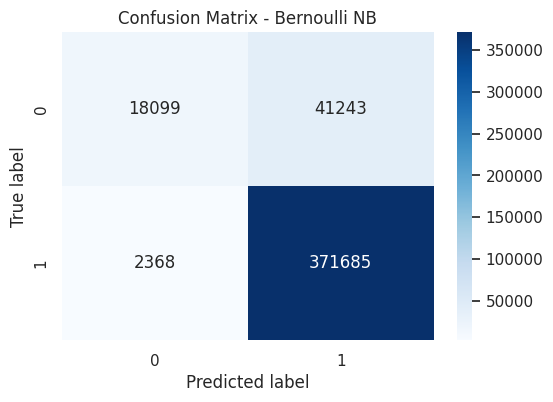

              precision    recall  f1-score   support

           0     0.8843    0.3050    0.4536     59342
           1     0.9001    0.9937    0.9446    374053

    accuracy                         0.8994    433395
   macro avg     0.8922    0.6493    0.6991    433395
weighted avg     0.8980    0.8994    0.8774    433395



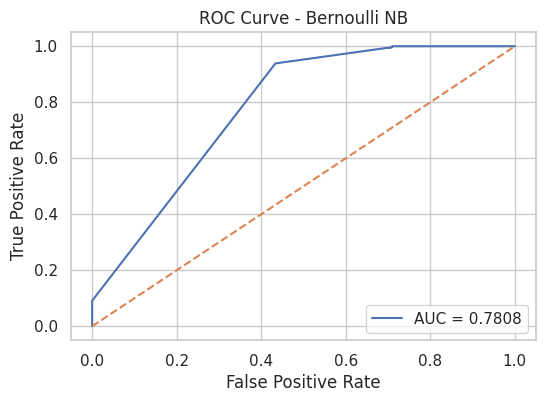

NBBernoulli_v1 Results:
 Accuracy:    0.89937
 Precision:   0.90012
 Recall:      0.99367
 Specificity: 0.30499
 F score:     0.94458
 AUC:         0.78079

Multinomial Naive Bayes


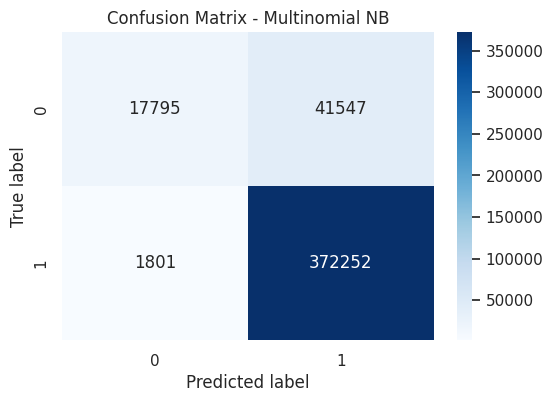

              precision    recall  f1-score   support

           0     0.9081    0.2999    0.4509     59342
           1     0.8996    0.9952    0.9450    374053

    accuracy                         0.9000    433395
   macro avg     0.9038    0.6475    0.6979    433395
weighted avg     0.9008    0.9000    0.8773    433395



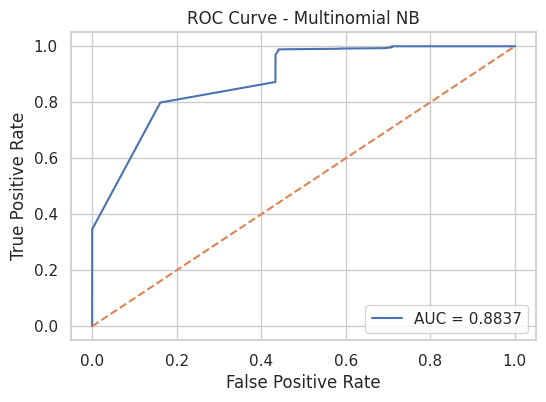

NBMultinomial_v1 Results:
 Accuracy:    0.89998
 Precision:   0.89960
 Recall:      0.99519
 Specificity: 0.29987
 F score:     0.94498
 AUC:         0.88375

Gaussian Naive Bayes


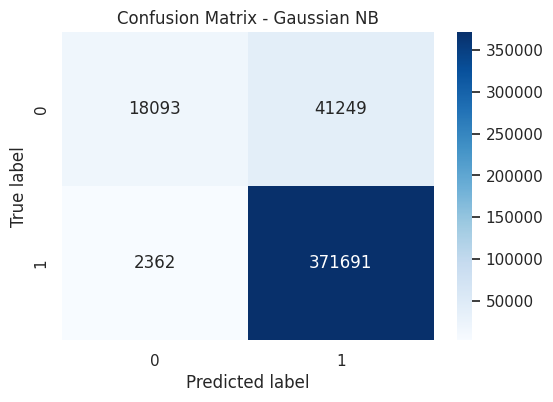

              precision    recall  f1-score   support

           0     0.8845    0.3049    0.4535     59342
           1     0.9001    0.9937    0.9446    374053

    accuracy                         0.8994    433395
   macro avg     0.8923    0.6493    0.6990    433395
weighted avg     0.8980    0.8994    0.8773    433395



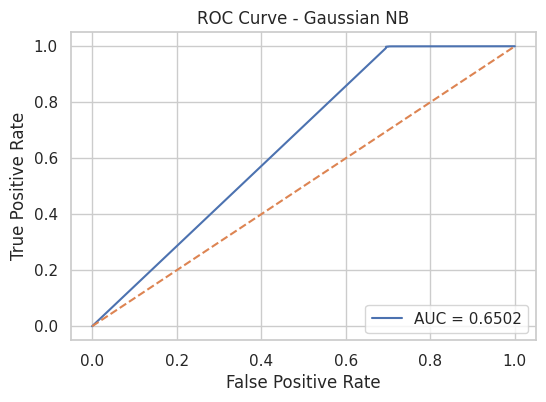

NBGaussian_v1 Results:
 Accuracy:    0.89937
 Precision:   0.90011
 Recall:      0.99369
 Specificity: 0.30489
 F score:     0.94459
 AUC:         0.65018

Complement Naive Bayes


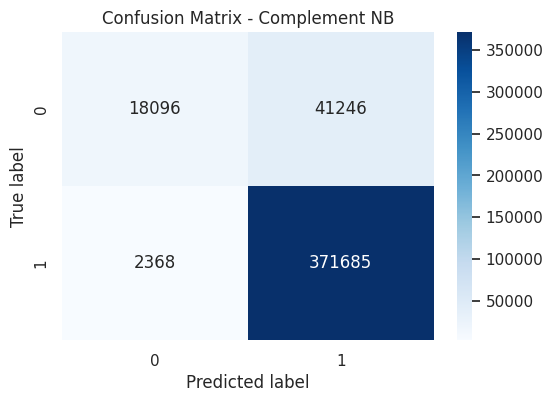

              precision    recall  f1-score   support

           0     0.8843    0.3049    0.4535     59342
           1     0.9001    0.9937    0.9446    374053

    accuracy                         0.8994    433395
   macro avg     0.8922    0.6493    0.6990    433395
weighted avg     0.8979    0.8994    0.8773    433395



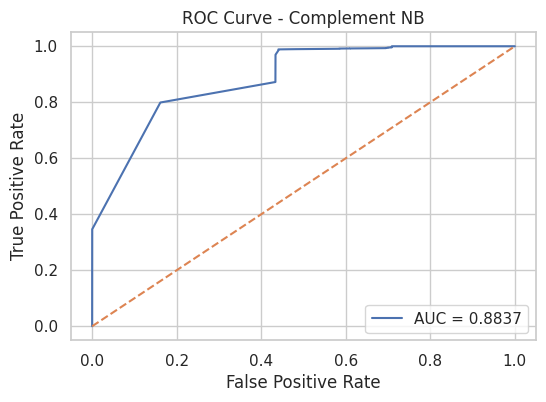

NBComplement_v1 Results:
 Accuracy:    0.89937
 Precision:   0.90011
 Recall:      0.99367
 Specificity: 0.30494
 F score:     0.94458
 AUC:         0.88375


In [ ]:
# Naive Bayes family with different variants

# Features and target
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

# Binary label with benign and malicious traffic
Y = (df_cat['label'] != 0).astype(int)

# Train and test split shared by all Naive Bayes models
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

# Definition of Naive Bayes models

# GaussianNB works well with continuous features, scaling is recommended
bayes_Gaussian = make_pipeline(
    MinMaxScaler(),
    GaussianNB()
)

# BernoulliNB expects binary features, a binarizer is applied
bayes_Bernoulli = make_pipeline(
    Binarizer(threshold=0.0),
    BernoulliNB()
)

# MultinomialNB expects non negative features similar to counts; light scaling is applied
bayes_Multinomial = make_pipeline(
    MinMaxScaler(),
    MultinomialNB()
)

# ComplementNB is a variant of MultinomialNB, often more robust with imbalanced classes
bayes_Complement = make_pipeline(
    MinMaxScaler(),
    ComplementNB()
)

# Collection of Naive Bayes models
BAYES_MODELS = {
    "Bernoulli":   bayes_Bernoulli,
    "Multinomial": bayes_Multinomial,
    "Gaussian":    bayes_Gaussian,
    "Complement":  bayes_Complement
}

# Version tag for this Naive Bayes family
model_version = "_v1"

for name, model in BAYES_MODELS.items():
    print(f"\n{name} Naive Bayes")

    # Train the model
    model.fit(X_train, Y_train)

    # Predictions on the test set
    Y_pred = model.predict(X_test)

    # Confusion matrix with heatmap
    cm = confusion_matrix(Y_test, Y_pred)

    fig, ax = plt.subplots(figsize=(6, 4))
    fig.set_facecolor('#ffffff')
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax)
    ax.set_title(f"Confusion Matrix - {name} NB")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    plt.show()

    # Text classification report with precision, recall and F score per class
    print(classification_report(Y_test, Y_pred, digits=4))

    # ROC curve and AUC based on predicted probabilities of the positive class
    Y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
    auc = roc_auc_score(Y_test, Y_proba)

    fig, ax = plt.subplots(figsize=(6, 4))
    fig.set_facecolor('#ffffff')
    ax.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    ax.plot([0, 1], [0, 1], linestyle="--")
    ax.set_title(f"ROC Curve - {name} NB")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")
    plt.show()

    # Scalar metrics + storage in ModelResult / RESULTS
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, zero_division=0)
    recall = recall_score(Y_test, Y_pred, zero_division=0)
    specificity = specificity_score(Y_test, Y_pred)
    f1score = f1_score(Y_test, Y_pred, zero_division=0)

    roc_data = (fpr, tpr, thresholds)

    # Unique model name such as NBBernoulli_v1
    full_name = "NB" + name + model_version

    model_result = ModelResult(
        full_name,
        accuracy,
        precision,
        recall,
        specificity,
        f1score,
        roc_data,
        auc
    )
    MODELS_RESULTS.append(model_result)

    RESULTS[full_name] = (accuracy, precision, recall, specificity, f1score)

    print(f"{CYAN}{full_name} Results:{RESET}")
    print(f" Accuracy:    {accuracy:.5f}")
    print(f" Precision:   {precision:.5f}")
    print(f" Recall:      {recall:.5f}")
    print(f" Specificity: {specificity:.5f}")
    print(f" F score:     {f1score:.5f}")
    print(f" AUC:         {auc:.5f}")

**General pattern**

Across all four variants:

- **Accuracy ~ 0.90** on the test set.
- **Malicious recall ≈ 0.994-0.996** → very few attacks are missed. 😺
- **Specificity ≈ 0.30** → many benign flows are predicted as malicious (high false-positive rate). 😾  
- F1 for the malicious class ≈ 0.945.

So Naive Bayes behaves like a **high-recall, high-alarm detector**: good at catching attacks, noisy for benign traffic.


**Confusion matrices**

All confusion matrices share the same structure:

- **TP** is very large (≈ 372k samples).  
- **FN** is very small (≈ 1.8-2.4k).  
- **TN** is ~18k.  
- **FP** is ~41k.

That’s why malicious recall is excellent, but benign recall (specificity) is low.


**Variant-by-variant summary**

***Bernoulli NB (`NBBernoulli_v1`)***

Good attack detection, but ROC AUC is the lowest among the NB variants. Many benign flows are still flagged as malicious.😾


***Multinomial NB (`NBMultinomial_v1`)***

Slightly better ranking ability (AUC) than Bernoulli, while keeping similar recall and precision. Among Naive Bayes models this is one of the **best compromises**.😺


***Gaussian NB (`NBGaussian_v1`)***

Same confusion-matrix pattern as Bernoulli, but **ROC AUC is clearly worse**. The Gaussian assumption does not match these features very well.😾


***Complement NB (`NBComplement_v1`)***

Very close to Multinomial NB, with slightly better robustness to imbalance. It shares the same strengths (high recall) and weaknesses (low specificity).😺/😾


**ROC curves**

- Multinomial and Complement NB have the **best ROC curves** (AUC ≈ 0.88).
- Bernoulli NB is moderate (AUC ≈ 0.78).
- Gaussian NB has a **much flatter ROC** (AUC ≈ 0.65), close to a weak classifier.

**Overall takeaways**

- For a **simple, very fast baselines**, Multinomial NB and Complement NB are the **preferred Naive Bayes choices** here.😺  
- For a **real intrusion detection system**,we will show that tree-based ensembles and XGBoost are going to be much better models.


###Naive Bayes with undersampled training data

This part still trains and evaluates four Naive Bayes classifiers (Bernoulli, Multinomial, Gaussian, Complement), but on a balanced training set obtained via random undersampling.

TRAIN distribution before balancing:
label
1    872790
0    138464
Name: count, dtype: int64

TRAIN distribution after UNDERSAMPLING:
label
0    138464
1    138464
Name: count, dtype: int64

Bernoulli Naive Bayes with undersampled training data


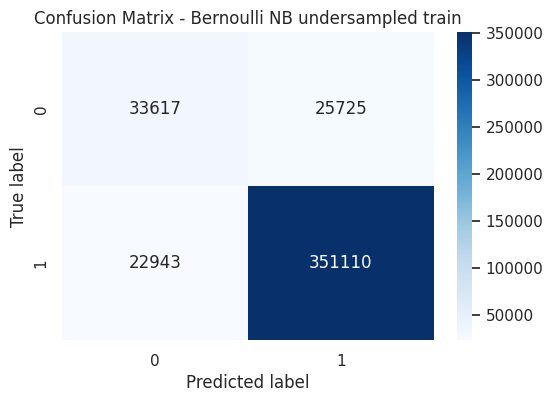

              precision    recall  f1-score   support

           0     0.5944    0.5665    0.5801     59342
           1     0.9317    0.9387    0.9352    374053

    accuracy                         0.8877    433395
   macro avg     0.7630    0.7526    0.7576    433395
weighted avg     0.8855    0.8877    0.8866    433395



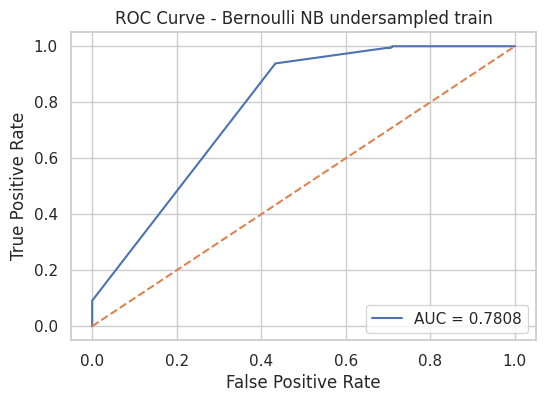

NBBernoulli_u Results:
 Accuracy:    0.88771
 Precision:   0.93173
 Recall:      0.93866
 Specificity: 0.56650
 F score:     0.93519
 AUC:         0.78079

Multinomial Naive Bayes with undersampled training data


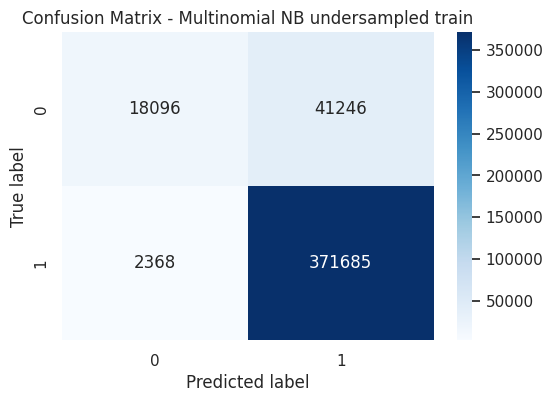

              precision    recall  f1-score   support

           0     0.8843    0.3049    0.4535     59342
           1     0.9001    0.9937    0.9446    374053

    accuracy                         0.8994    433395
   macro avg     0.8922    0.6493    0.6990    433395
weighted avg     0.8979    0.8994    0.8773    433395



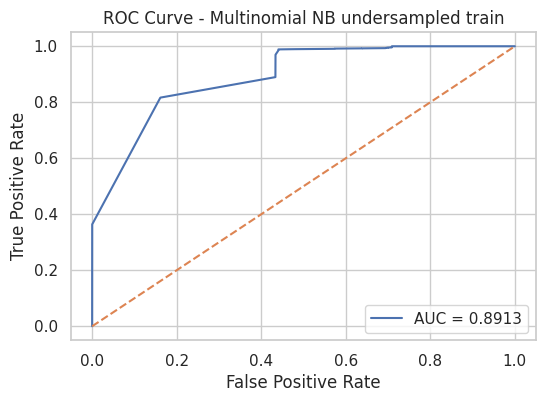

NBMultinomial_u Results:
 Accuracy:    0.89937
 Precision:   0.90011
 Recall:      0.99367
 Specificity: 0.30494
 F score:     0.94458
 AUC:         0.89134

Gaussian Naive Bayes with undersampled training data


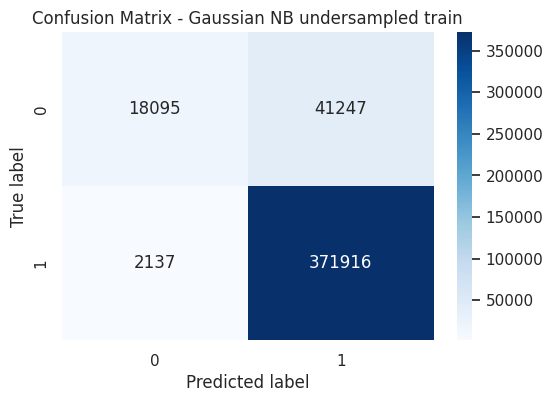

              precision    recall  f1-score   support

           0     0.8944    0.3049    0.4548     59342
           1     0.9002    0.9943    0.9449    374053

    accuracy                         0.8999    433395
   macro avg     0.8973    0.6496    0.6998    433395
weighted avg     0.8994    0.8999    0.8778    433395



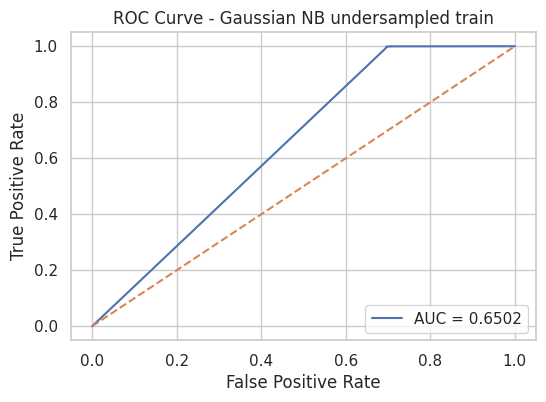

NBGaussian_u Results:
 Accuracy:    0.89990
 Precision:   0.90017
 Recall:      0.99429
 Specificity: 0.30493
 F score:     0.94489
 AUC:         0.65020

Complement Naive Bayes with undersampled training data


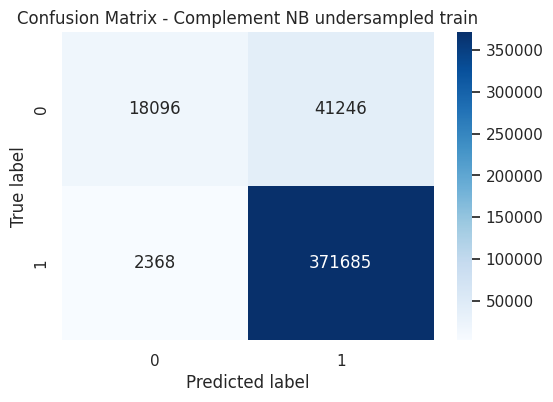

              precision    recall  f1-score   support

           0     0.8843    0.3049    0.4535     59342
           1     0.9001    0.9937    0.9446    374053

    accuracy                         0.8994    433395
   macro avg     0.8922    0.6493    0.6990    433395
weighted avg     0.8979    0.8994    0.8773    433395



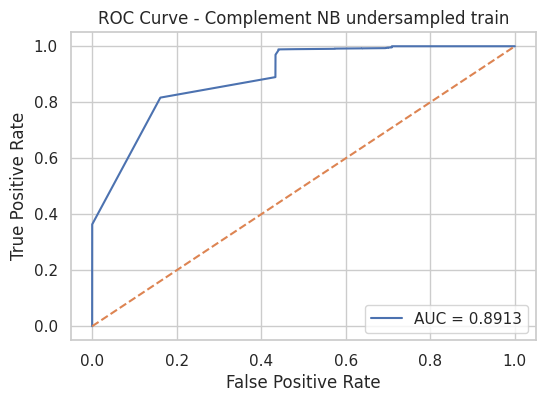

NBComplement_u Results:
 Accuracy:    0.89937
 Precision:   0.90011
 Recall:      0.99367
 Specificity: 0.30494
 F score:     0.94458
 AUC:         0.89134


In [ ]:
# Naive Bayes with undersampled training data

# Features and target for undersampling scenario
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

# Binary label with benign and malicious traffic
Y = (df_cat['label'] != 0).astype(int)

# Train and test split shared by all Naive Bayes models
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

print("TRAIN distribution before balancing:")
print(Y_train.value_counts())

# Undersampling of the minority positive class in the training set
rus = RandomUnderSampler(sampling_strategy="auto", random_state=RANDOM_SEED)
X_train_bal, Y_train_bal = rus.fit_resample(X_train, Y_train)

print("\nTRAIN distribution after UNDERSAMPLING:")
print(Y_train_bal.value_counts())

# Definition of Naive Bayes models for undersampled training
bayes_Gaussian = make_pipeline(MinMaxScaler(), GaussianNB())
bayes_Bernoulli = make_pipeline(Binarizer(threshold=0.0), BernoulliNB())
bayes_Multinomial = make_pipeline(MinMaxScaler(), MultinomialNB())
bayes_Complement = make_pipeline(MinMaxScaler(), ComplementNB())

# Collection of Naive Bayes models
BAYES_MODELS = {
    "Bernoulli":  bayes_Bernoulli,
    "Multinomial": bayes_Multinomial,
    "Gaussian":   bayes_Gaussian,
    "Complement": bayes_Complement
}

# Version tag used to identify undersampled models
model_version = "_u"

for name, model in BAYES_MODELS.items():
    print(f"\n{name} Naive Bayes with undersampled training data")

    # Train the model on the balanced training set
    model.fit(X_train_bal, Y_train_bal)

    # Predictions on the original test set
    Y_pred = model.predict(X_test)

    # Confusion matrix with heatmap
    cm = confusion_matrix(Y_test, Y_pred)

    fig, ax = plt.subplots(figsize=(6, 4))
    fig.set_facecolor('#ffffff')
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax)
    ax.set_title(f"Confusion Matrix - {name} NB undersampled train")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    plt.show()

    # Text classification report with precision, recall and F score per class
    print(classification_report(Y_test, Y_pred, digits=4))

    # ROC curve and AUC based on predicted probabilities of the positive class
    Y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
    auc = roc_auc_score(Y_test, Y_proba)

    fig, ax = plt.subplots(figsize=(6, 4))
    fig.set_facecolor('#ffffff')
    ax.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    ax.plot([0, 1], [0, 1], linestyle="--")
    ax.set_title(f"ROC Curve - {name} NB undersampled train")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")
    plt.show()

    # Scalar metrics + storage in ModelResult / RESULTS
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, zero_division=0)
    recall = recall_score(Y_test, Y_pred, zero_division=0)
    specificity = specificity_score(Y_test, Y_pred)
    fscore = f1_score(Y_test, Y_pred, zero_division=0)

    roc_data = (fpr, tpr, thresholds)

    # Unique model name that encodes Naive Bayes type and undersampling
    full_name = "NB" + name + model_version

    model_result = ModelResult(
        full_name,
        accuracy,
        precision,
        recall,
        specificity,
        fscore,
        roc_data,
        auc
    )
    MODELS_RESULTS.append(model_result)

    RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

    print(f"{CYAN}{full_name} Results:{RESET}")
    print(f" Accuracy:    {accuracy:.5f}")
    print(f" Precision:   {precision:.5f}")
    print(f" Recall:      {recall:.5f}")
    print(f" Specificity: {specificity:.5f}")
    print(f" F score:     {fscore:.5f}")
    print(f" AUC:         {auc:.5f}")


**Train Set Balancing**
- Before balancing, malicious traffic is much more frequent than benign.
- After undersampling, the training set contains **equal counts** for label 0 and 1.
- The test set remains imbalanced, so evaluation reflects a realistic scenario.

Models learn from balanced data but are tested on real-world proportions.😺


**Bernoulli Naive Bayes (NBBernoulli_u)**

Good detection of malicious flows, but weaker discrimination on benign traffic. Overall performance is **decent but not the best** among the NB variants.


**Multinomial & Complement Naive Bayes (NBMultinomial_u, NBComplement_u)**

These models are **very aggressive** at catching attacks (high recall, high F1, high AUC) but sacrifice specificity, generating many false positives.  
For security applications where missing attacks is costly, this trade-off may still be acceptable. 😺


**Gaussian Naive Bayes (NBGaussian_u)**

Although accuracy and recall look high, the **ROC curve and AUC show a weaker ranking quality**.  
Gaussian assumptions do not fit the feature distributions well → this is the **least reliable** NB variant here. 😾

**Overall comparison**

- **Best AUC / ROC:** Multinomial and Complement NB (AUC ≈ 0.89) 😺  
- **Best at catching attacks (highest recall):** Multinomial / Complement / Gaussian NB (all ≈ 0.99), but with poor specificity.  
- **Most balanced ROC vs confusion matrix:** Bernoulli NB (less extreme, but still decent).

In conclusion, **Multinomial and Complement Naive Bayes** provide the **strongest overall ROC performance**, while **Gaussian NB** should be used with caution due to its lower AUC.

###SVM

This code trains a linear Support Vector Machine (SVM) using SGDClassifier inside a scikit-learn pipeline.

The features are standardised with StandardScaler, then a linear SVM (hinge loss) is trained with class-balanced weights.

The model is evaluated on a held-out test set using a confusion matrix, classification report, and ROC curve, and its scalar metrics are stored in shared result structures.


Linear SVM with LinearSVC


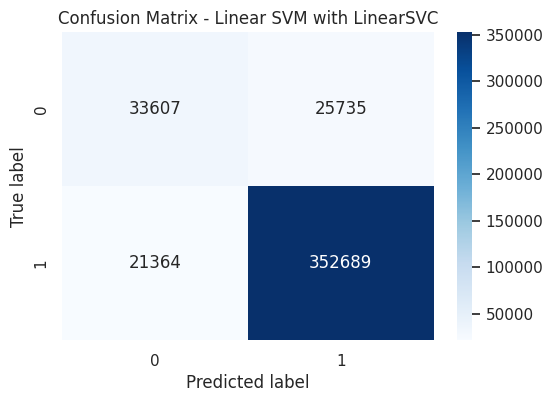

              precision    recall  f1-score   support

           0     0.6114    0.5663    0.5880     59342
           1     0.9320    0.9429    0.9374    374053

    accuracy                         0.8913    433395
   macro avg     0.7717    0.7546    0.7627    433395
weighted avg     0.8881    0.8913    0.8896    433395



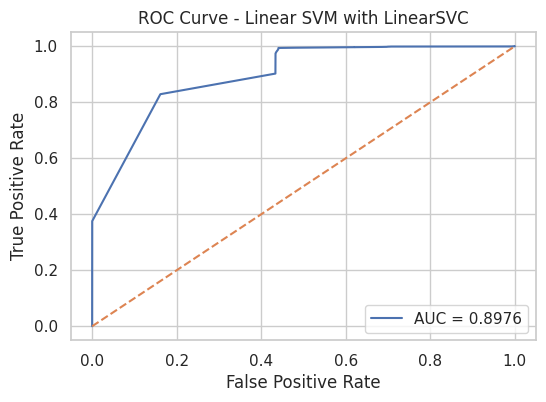

SVMlin_v1 Results:
 Accuracy:    0.89133
 Precision:   0.93199
 Recall:      0.94289
 Specificity: 0.56633
 F score:     0.93741
 AUC:         0.89759


In [ ]:
# Linear support vector machine with standard scaling

# Features and target
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

# Binary label with benign and malicious traffic
Y = (df_cat['label'] != 0).astype(int)

# Train and test split for the linear support vector machine
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

# Pipeline with standard scaler and linear support vector classifier
svm_linear = make_pipeline(
    StandardScaler(),
    SGDClassifier(
        loss="hinge",
        class_weight="balanced",
        alpha=1e-4,
        max_iter=5000,
        tol=1e-3,
        random_state=RANDOM_SEED
    )
)

print("\nLinear SVM with LinearSVC")

# Train the model
svm_linear.fit(X_train, Y_train)

# Predictions on the test set
Y_pred = svm_linear.predict(X_test)

# Confusion matrix with heatmap
cm = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor('#ffffff')
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title("Confusion Matrix - Linear SVM with LinearSVC")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.show()

# Text classification report with precision, recall and F score per class
print(classification_report(Y_test, Y_pred, digits=4))

# ROC curve and AUC using the decision function as scoring signal
Y_score = svm_linear.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
auc = roc_auc_score(Y_test, Y_score)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor('#ffffff')
ax.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
ax.plot([0, 1], [0, 1], linestyle="--")
ax.set_title("ROC Curve - Linear SVM with LinearSVC")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
specificity = specificity_score(Y_test, Y_pred)
fscore = f1_score(Y_test, Y_pred, zero_division=0)

roc_data = (fpr, tpr, thresholds)

# Unique model name for the linear support vector machine
full_name = "SVMlin_v1"

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    fscore,
    roc_data,
    auc
)
MODELS_RESULTS.append(model_result)

RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {auc:.5f}")

**Confusion matrix**

The model **detects most attacks** but still misclassifies a fair amount of benign traffic as malicious.  
Good for security (few missed attacks), but it generates non-negligible false alarms.

**Metrics**

- **Accuracy:** ~0.891  
- **Precision:** ~0.932 → most flagged flows are really malicious.  
- **Recall:** ~0.943 → very high detection rate of attacks.  
- **Specificity:** ~0.566 → only ~56% of benign flows are kept as benign.  
- **F1:** ~0.937 → strong balance between precision and recall.  
- **ROC AUC:** ~0.898 → good ranking quality, but not the best among the models.

**Quick takeaway**

- **Pros:** very high recall and F1 on malicious traffic, simple linear model, fast training and prediction.  
- **Cons:** moderate specificity and relatively many false positives compared to the best ensemble models.

Overall it’s a **solid baseline**. 😺


##**Non Linear**


###SVM (RBF)

This section trains a non-linear Support Vector Machine (SVM) with an RBF kernel to detect malicious traffic.

Because a full SVM on the whole dataset would be too slow and classes are highly imbalanced, the code first undersamples the majority class and then takes a small balanced subset (8,000 rows) for training.

The model is evaluated on the original full test set using a confusion matrix, a classification report, and the ROC curve.

Original training label distribution:
label
1    872790
0    138464
Name: count, dtype: int64

Training label distribution after undersampling:
label
0    138464
1    138464
Name: count, dtype: int64

Reduced training size for SVM: 8000 rows

Support vector machine with radial basis function kernel and undersampled training data


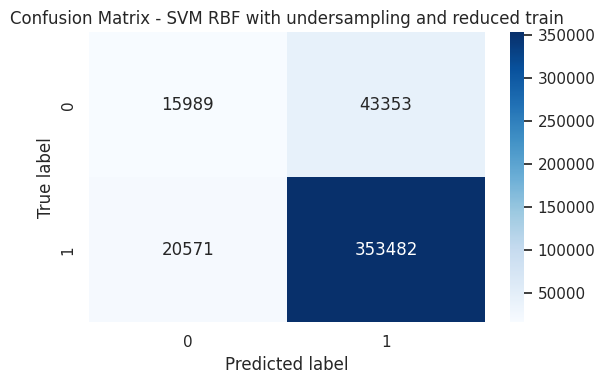


Classification report for support vector machine with radial basis function kernel
              precision    recall  f1-score   support

           0     0.4373    0.2694    0.3334     59342
           1     0.8908    0.9450    0.9171    374053

    accuracy                         0.8525    433395
   macro avg     0.6640    0.6072    0.6253    433395
weighted avg     0.8287    0.8525    0.8372    433395



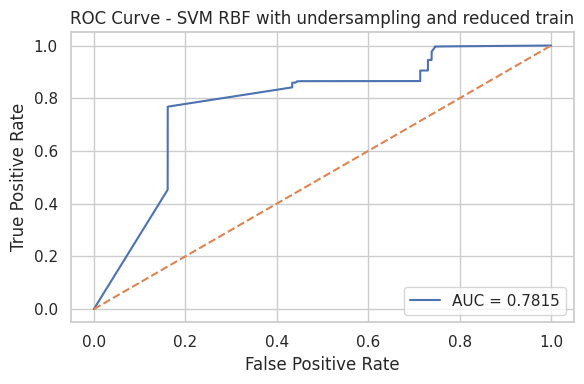

SVMrbf_u_small Results:
 Accuracy:    0.85250
 Precision:   0.89075
 Recall:      0.94501
 Specificity: 0.26944
 F score:     0.91708
 AUC:         0.78150


In [ ]:
# Feature and target definition
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

# Binary label with benign and malicious traffic
Y = (df_cat['label'] != 0).astype(int)

# Train and test split for this configuration
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

print("Original training label distribution:")
print(Y_train.value_counts())

# Undersampling of the majority class in the training data
rus = RandomUnderSampler(sampling_strategy="auto", random_state=RANDOM_SEED)
X_train_bal, Y_train_bal = rus.fit_resample(X_train, Y_train)

print("\nTraining label distribution after undersampling:")
print(Y_train_bal.value_counts())

# Reduction of the training set size for the support vector machine
max_train_size = 8000
train_size = min(max_train_size, X_train_bal.shape[0])

X_train_small, _, Y_train_small, _ = train_test_split(
    X_train_bal, Y_train_bal,
    train_size=train_size,
    stratify=Y_train_bal,
    random_state=RANDOM_SEED
)

print(f"\nReduced training size for SVM: {X_train_small.shape[0]} rows")

# Pipeline with standard scaler and radial basis kernel classifier
svm_rbf = make_pipeline(
    StandardScaler(),
    SVC(
        kernel="rbf",
        class_weight="balanced",
        C=1.0,
        gamma="scale",
        probability=False,
        max_iter=1500,
        random_state=RANDOM_SEED
    )
)

print("\nSupport vector machine with radial basis function kernel and undersampled training data")

# Train the model
svm_rbf.fit(X_train_small, Y_train_small)

# Predictions on the test set and decision scores
Y_pred = svm_rbf.predict(X_test)
scores = svm_rbf.decision_function(X_test)

# Confusion matrix with heatmap
cm = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor('#ffffff')
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title("Confusion Matrix - SVM RBF with undersampling and reduced train")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.tight_layout()
plt.show()

# Text classification report with precision, recall and F score per class
print("\nClassification report for support vector machine with radial basis function kernel")
print(classification_report(Y_test, Y_pred, digits=4))

# ROC curve and AUC based on decision function scores
fpr, tpr, thresholds = roc_curve(Y_test, scores)
auc = roc_auc_score(Y_test, scores)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor('#ffffff')
ax.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
ax.plot([0, 1], [0, 1], linestyle="--")
ax.set_title("ROC Curve - SVM RBF with undersampling and reduced train")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
specificity = specificity_score(Y_test, Y_pred)
fscore = f1_score(Y_test, Y_pred, zero_division=0)

roc_data = (fpr, tpr, thresholds)

# Unique model name for radial basis kernel support vector machine with undersampling
base_name = "SVMrbf"
model_version = "_u_small"
full_name = base_name + model_version

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    fscore,
    roc_data,
    auc
)
MODELS_RESULTS.append(model_result)

RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {auc:.5f}")


**Confusion matrix**

  - The model often predicts *malicious* for benign traffic → low **specificity** (~0.27).

  - High detection of attacks with **recall** ≈ 0.95.

So the SVM RBF is good at catching malicious flows, but it misclassifies many benign flows as attacks (lots of FPs).

**Classification report and scalar metrics**

- Very strong performance on the **malicious** class (high recall and F1).
- Poor performance on the **benign** class (low recall/specificity).
- Compared to other models in our pipeline, this SVM RBF is overall **weaker**, especially in terms of AUC and benign-class recognition.😾

**ROC curve**

- The ROC curve lies above the diagonal, confirming the model has useful signal.
- However, the **AUC ≈ 0.78** is clearly lower than the ~0.93-0.94 AUC we obtained with other models.

Overall, this method can detect many attacks, but at the cost of many false alarms and lower ranking quality than our best ensemble models.


###SVC (RBF)

Here, we train a Support Vector Classifier (SVC) with an RBF kernel on a small, balanced training subset obtained by undersampling the majority class.

We evaluate the model on the full original test set using confusion matrix, classification report, ROC curve, and accuracy, precision, recall, specificity, F1, AUC.

This configuration tests whether adding probability calibration (and thus a smoother decision boundary) improves performance compared to the previous SVM RBF experiment.

Original training label distribution:
label
1    872790
0    138464
Name: count, dtype: int64

Training label distribution after undersampling:
label
0    138464
1    138464
Name: count, dtype: int64

Reduced training set size for support vector classifier: (5000, 24)

Support vector classifier with radial basis kernel and probability estimates


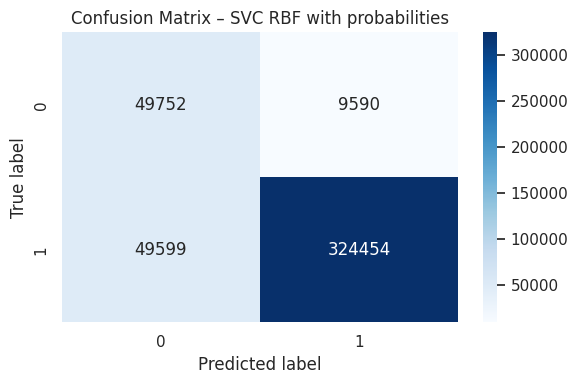


Classification report for support vector classifier with radial basis kernel
              precision    recall  f1-score   support

           0     0.5008    0.8384    0.6270     59342
           1     0.9713    0.8674    0.9164    374053

    accuracy                         0.8634    433395
   macro avg     0.7360    0.8529    0.7717    433395
weighted avg     0.9069    0.8634    0.8768    433395



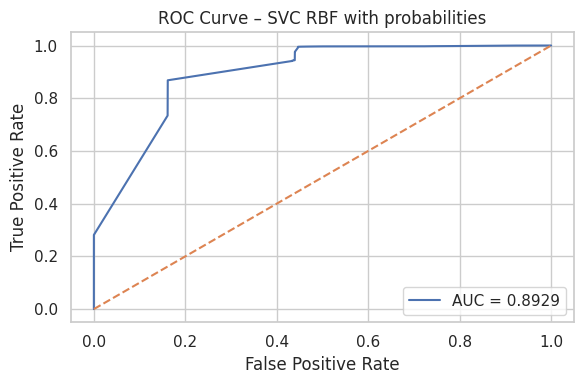

SVCrbf_u_prob Results:
 Accuracy:    0.86343
 Precision:   0.97129
 Recall:      0.86740
 Specificity: 0.83839
 F score:     0.91641
 AUC:         0.89294


In [ ]:
# Support vector classifier with radial basis function kernel and probability estimates

# Features and target for radial basis support vector classifier
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

# Binary label with benign and malicious traffic
Y = (df_cat['label'] != 0).astype(int)

# Train and test split for this configuration
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

print("Original training label distribution:")
print(Y_train.value_counts())

# Undersampling to balance the training set
rus = RandomUnderSampler(sampling_strategy="auto", random_state=RANDOM_SEED)
X_train_bal, Y_train_bal = rus.fit_resample(X_train, Y_train)

print("\nTraining label distribution after undersampling:")
print(Y_train_bal.value_counts())

# Reduced training subset for support vector classifier
max_train_size = 5000
train_size = min(max_train_size, X_train_bal.shape[0])

X_tr_small, _, Y_tr_small, _ = train_test_split(
    X_train_bal, Y_train_bal,
    train_size=train_size,
    stratify=Y_train_bal,
    random_state=RANDOM_SEED
)

print("\nReduced training set size for support vector classifier:", X_tr_small.shape)

# Pipeline with radial basis kernel and probability estimates
svc_rbf = make_pipeline(
    StandardScaler(),
    SVC(
        kernel="rbf",
        C=1.0,
        gamma="scale",
        class_weight="balanced",
        probability=True,
        max_iter=3000,
        random_state=RANDOM_SEED
    )
)

print("\nSupport vector classifier with radial basis kernel and probability estimates")

# Train the model
svc_rbf.fit(X_tr_small, Y_tr_small)

# Predictions on the test set and probability scores
Y_pred = svc_rbf.predict(X_test)
Y_proba = svc_rbf.predict_proba(X_test)[:, 1]

# Confusion matrix with heatmap
cm = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor('#ffffff')
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title("Confusion Matrix – SVC RBF with probabilities")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.tight_layout()
plt.show()

# Text classification report with precision, recall and F score per class
print("\nClassification report for support vector classifier with radial basis kernel")
print(classification_report(Y_test, Y_pred, digits=4))

# ROC curve and AUC based on predicted probabilities
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
auc = roc_auc_score(Y_test, Y_proba)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor('#ffffff')
ax.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
ax.plot([0, 1], [0, 1], linestyle="--")
ax.set_title("ROC Curve – SVC RBF with probabilities")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
specificity = specificity_score(Y_test, Y_pred)
fscore = f1_score(Y_test, Y_pred, zero_division=0)

roc_data = (fpr, tpr, thresholds)

# Unique model name for radial basis support vector classifier with undersampling and probabilities
base_name = "SVCrbf"
model_version = "_u_prob"
full_name = base_name + model_version

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    fscore,
    roc_data,
    auc
)
MODELS_RESULTS.append(model_result)

RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {auc:.5f}")


**Confusion matrix**

Compared to the previous SVM RBF, this version:
  - **Greatly improves specificity** (many fewer benign → malicious errors).😺
  - **Slightly lowers recall** for malicious flows (more missed attacks).😾

Overall, this model is **more balanced** and much less noisy than `SVMrbf_u_small`. 😺

**Classification metrics**

- This RBF SVC detects malicious flows well while **substantially reducing false alarms**.
- The high **precision** means the model is reliable when it raises alerts.
- AUC ≈ 0.89 shows good ranking ability.

**ROC curve**

- The curve stays well above the diagonal, indicating that the model effectively distinguishes between benign and malicious samples.

- The beginning of the curve shows a very high TPR even at moderate FPR values, meaning the model can detect most attacks while keeping false alarms relatively low.

- The overall shape is smoother compared to the SVM RBF version without probability outputs (this is because calibrated probabilities allow for better ranking of the instances).

- The area under the curve (AUC ≈ 0.89) indicates good rank-ordering capability. 😺


**Overall takeaways**
- Training on a **balanced, reduced dataset** significantly improved **specificity** while preserving solid recall.
- This SVC configuration is the **best-performing SVM variant so far** in terms of balance between detecting attacks and avoiding excess false positives.😺

###KNN

k-Nearest Neighbours is a simple, distance-based machine learning algorithm.
It classifies a test sample by finding the k closest training samples and assigning the majority class among them.

In this section:

- A subset of 50,000 samples is used for training, because KNN scales poorly with very large datasets.

- Features are scaled using StandardScaler.

Aftewwards, the model is trained and evaluated using confusion matrix, classification report, ROC curve + AUC, and scalar metrics

Original training shape: (1011254, 24)
Reduced training shape: (50000, 24)

K nearest neighbours classifier on reduced training set


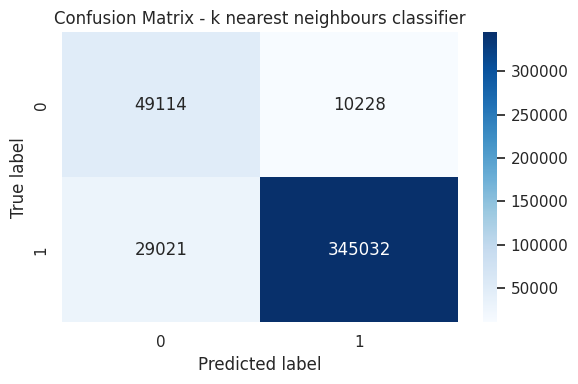


Classification report for k nearest neighbours classifier
              precision    recall  f1-score   support

           0     0.6286    0.8276    0.7145     59342
           1     0.9712    0.9224    0.9462    374053

    accuracy                         0.9094    433395
   macro avg     0.7999    0.8750    0.8303    433395
weighted avg     0.9243    0.9094    0.9145    433395



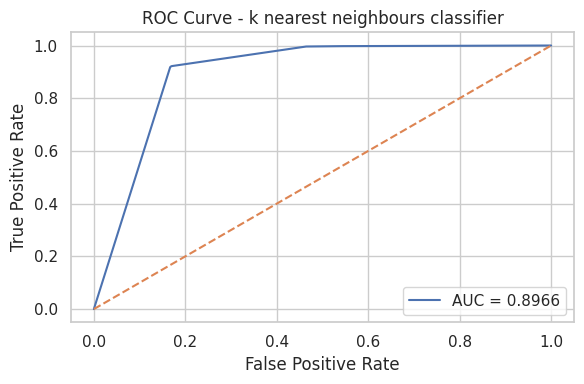

KNN_small Results:
 Accuracy:    0.90944
 Precision:   0.97121
 Recall:      0.92241
 Specificity: 0.82764
 F score:     0.94618
 AUC:         0.89663


In [ ]:
# Features and target
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

# Binary label with benign and malicious traffic
Y = (df_cat['label'] != 0).astype(int)

# Train and test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

# Reduced training set to keep k nearest neighbours feasible on large data
max_train_size = 50000
train_size = min(max_train_size, X_train.shape[0])

X_train_small, _, Y_train_small, _ = train_test_split(
    X_train, Y_train,
    train_size=train_size,
    stratify=Y_train,
    random_state=RANDOM_SEED
)

print("Original training shape:", X_train.shape)
print("Reduced training shape:", X_train_small.shape)

# Pipeline with scaling and k nearest neighbours classifier
knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
)

print("\nK nearest neighbours classifier on reduced training set")

# Train the model
knn.fit(X_train_small, Y_train_small)

# Predictions and probability scores on the test set
Y_pred = knn.predict(X_test)
Y_proba = knn.predict_proba(X_test)[:, 1]

# Confusion matrix with heatmap
cm = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("#ffffff")
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax)
ax.set_title("Confusion Matrix - k nearest neighbours classifier")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.tight_layout()
plt.show()

# Text classification report with precision, recall and F score per class
print("\nClassification report for k nearest neighbours classifier")
print(classification_report(Y_test, Y_pred, digits=4))

# ROC curve and AUC based on predicted probabilities
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
auc = roc_auc_score(Y_test, Y_proba)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("#ffffff")
ax.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
ax.plot([0, 1], [0, 1], linestyle="--")
ax.set_title("ROC Curve - k nearest neighbours classifier")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
specificity = specificity_score(Y_test, Y_pred)
fscore = f1_score(Y_test, Y_pred, zero_division=0)

roc_data = (fpr, tpr, thresholds)

# Unique model name for k nearest neighbours classifier
base_name = "KNN"
model_version = "_small"
full_name = base_name + model_version

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    fscore,
    roc_data,
    auc
)
MODELS_RESULTS.append(model_result)

RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {auc:.5f}")


**Confusion Matrix**
- The classifier correctly identifies most malicious and benign samples.
- False negatives are present but relatively limited.
- False positives occur, but at an acceptable level.

Overall, KNN shows strong separation between classes.😺


**Classification Report**

- **Precision for class 1 ≈ 0.97** → very few benign flows are misclassified as malicious.
- **Recall for class 1 ≈ 0.92** → most malicious flows are detected.
- **F1-score for class 1 ≈ 0.95** → excellent performance.
- Class 0 scores are lower but still solid.

These results are strong.😺


**ROC Curve + AUC**
- AUC ≈ **0.8966**, indicates very good ability to separate benign and malicious flows.
- The ROC curve rises quickly toward the top-left corner.

Good model performance across different thresholds.😺


**Scalar Metrics**

KNN performs surprisingly well despite being a simple model and using a smaller training set.😺

**Overall takeaways**

The KNN classifier achieves **high reliability** and **strong detection capability**.  
Despite some false negatives and false positives, performance is very good for a distance-based model.😺


####KNN with grid search

This sub-section trains a KNN classifier where the hyperparameter k is tuned with a GridSearchCV on a reduced training set.

The model is then evaluated on the test set using a confusion matrix, classification report, ROC curve + AUC, and scalar metrics.

Reduced training shape for grid search: (25000, 24)

Grid search for k nearest neighbours classifier
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters from grid search: {'kneighborsclassifier__n_neighbors': 9}
Best cross validation score: 0.9568460789394336


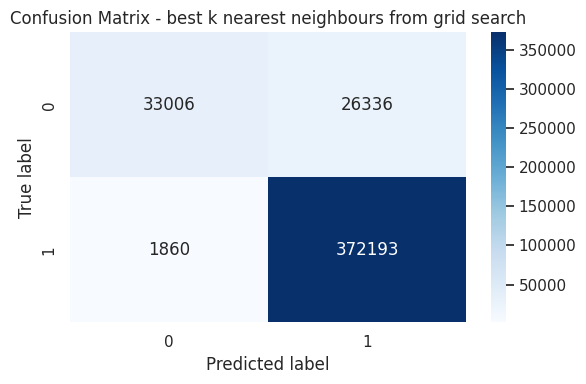


Classification report for best k nearest neighbours from grid search
              precision    recall  f1-score   support

           0     0.9467    0.5562    0.7007     59342
           1     0.9339    0.9950    0.9635    374053

    accuracy                         0.9349    433395
   macro avg     0.9403    0.7756    0.8321    433395
weighted avg     0.9357    0.9349    0.9275    433395



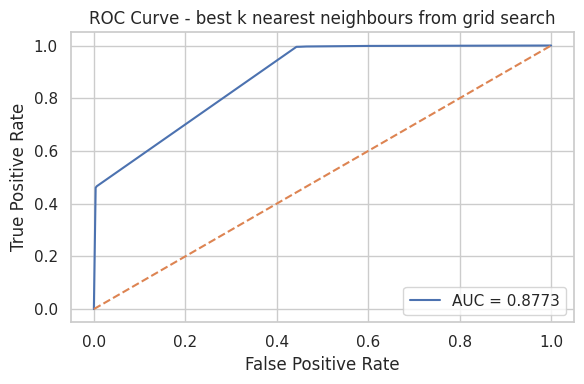

KNNgs_small Results:
 Accuracy:    0.93494
 Precision:   0.93392
 Recall:      0.99503
 Specificity: 0.55620
 F score:     0.96350
 AUC:         0.87726


In [ ]:
# Features and target
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

# Binary label with benign and malicious traffic
Y = (df_cat['label'] != 0).astype(int)

# Train and test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

# Reduced training set for grid search on k nearest neighbours
max_train_size = 25000
train_size = min(max_train_size, X_train.shape[0])

X_train_small, _, Y_train_small, _ = train_test_split(
    X_train, Y_train,
    train_size=train_size,
    stratify=Y_train,
    random_state=RANDOM_SEED
)

print("Reduced training shape for grid search:", X_train_small.shape)

# Pipeline for k nearest neighbours classifier
pipe_knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
)

# Grid search over neighbour values
param_grid = {
    "kneighborsclassifier__n_neighbors": [3, 5, 7, 9, 11]
}

grid_knn = GridSearchCV(
    pipe_knn,
    param_grid,
    scoring="f1",
    cv=3,
    verbose=2,
    n_jobs=-1
)

print("\nGrid search for k nearest neighbours classifier")
grid_knn.fit(X_train_small, Y_train_small)

print("Best parameters from grid search:", grid_knn.best_params_)
print("Best cross validation score:", grid_knn.best_score_)

best_knn = grid_knn.best_estimator_

# Predictions and probability scores on the test set
Y_pred = best_knn.predict(X_test)
Y_proba = best_knn.predict_proba(X_test)[:, 1]

# Confusion matrix with heatmap
cm = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("#ffffff")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title("Confusion Matrix - best k nearest neighbours from grid search")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.tight_layout()
plt.show()

# Text classification report with precision, recall and F score per class
print("\nClassification report for best k nearest neighbours from grid search")
print(classification_report(Y_test, Y_pred, digits=4))

# ROC curve and AUC based on predicted probabilities
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
auc = roc_auc_score(Y_test, Y_proba)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("#ffffff")
ax.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
ax.plot([0, 1], [0, 1], linestyle="--")
ax.set_title("ROC Curve - best k nearest neighbours from grid search")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
specificity = specificity_score(Y_test, Y_pred)
fscore = f1_score(Y_test, Y_pred, zero_division=0)

roc_data = (fpr, tpr, thresholds)

# Unique model name for k nearest neighbours classifier with grid search
base_name = "KNNgs"
model_version = "_small"
full_name = base_name + model_version

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    fscore,
    roc_data,
    auc
)
MODELS_RESULTS.append(model_result)

RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {auc:.5f}")

**Confusion Matrix**

The tuned KNN is very good at detecting malicious traffic (few false negatives) but still produces a significant number of false positives (benign labelled as attacks).


**Classification Report**

- The model almost never misses attacks (very high recall for class 1).
- Benign traffic is often flagged as malicious (lower recall for class 0).
- For intrusion detection, this is often an acceptable trade-off: **better to raise an alarm than to miss an attack**. 😺

**ROC Curve and AUC**
- The ROC curve shows strong performance, clearly above the random line.
- **AUC ≈ 0.8773** indicates **good global separability** between benign and malicious flows, slightly below the simpler KNN trained earlier but still strong.

**Overall takeaways**

The grid-searched KNN model provides **excellent detection of malicious traffic** and a **high F1-score**, at the cost of moderate specificity. For security-oriented tasks, these are **very strong results**.😺


####KNN Balanced (reducing class 1)

This code trains a k-nearest neighbours (KNN) classifier on a balanced and reduced dataset.

Original training label distribution:
label
1    872790
0    138464
Name: count, dtype: int64

Training label distribution after undersampling:
label
0    138464
1    138464
Name: count, dtype: int64

Reduced balanced training shape: (15000, 24)
Reduced test shape: (216697, 24)

Balanced k nearest neighbours classifier on reduced train and test sets


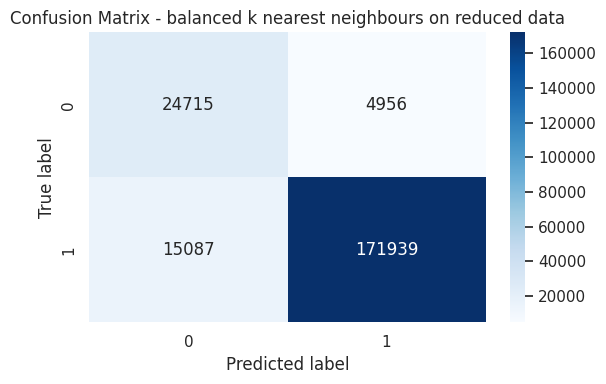


Classification report for balanced k nearest neighbours on reduced data
              precision    recall  f1-score   support

           0     0.6209    0.8330    0.7115     29671
           1     0.9720    0.9193    0.9449    187026

    accuracy                         0.9075    216697
   macro avg     0.7965    0.8762    0.8282    216697
weighted avg     0.9239    0.9075    0.9130    216697



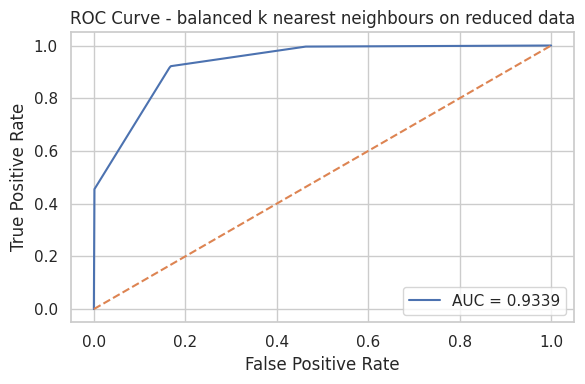

KNNbal_u_small Results:
 Accuracy:    0.90751
 Precision:   0.97198
 Recall:      0.91933
 Specificity: 0.83297
 F score:     0.94492
 AUC:         0.93391


In [ ]:
# Features and target for k nearest neighbours with undersampling
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

# Binary label with benign and malicious traffic
Y = (df_cat['label'] != 0).astype(int)

# Train and test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

print("Original training label distribution:")
print(Y_train.value_counts())

# Undersampling to balance classes in the training set
rus = RandomUnderSampler(sampling_strategy="auto", random_state=RANDOM_SEED)
X_train_bal, Y_train_bal = rus.fit_resample(X_train, Y_train)

print("\nTraining label distribution after undersampling:")
print(Y_train_bal.value_counts())

# Reduced balanced training set for k nearest neighbours
X_train_small, _, Y_train_small, _ = train_test_split(
    X_train_bal, Y_train_bal,
    train_size=15000,
    stratify=Y_train_bal,
    random_state=RANDOM_SEED
)

print("\nReduced balanced training shape:", X_train_small.shape)

# Reduced test set for k nearest neighbours
X_test_small, _, Y_test_small, _ = train_test_split(
    X_test, Y_test,
    test_size=0.5,
    stratify=Y_test,
    random_state=RANDOM_SEED
)

print("Reduced test shape:", X_test_small.shape)

# Pipeline for k nearest neighbours classifier on balanced and reduced data
knn_bal = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
)

print("\nBalanced k nearest neighbours classifier on reduced train and test sets")

# Train the model
knn_bal.fit(X_train_small, Y_train_small)

# Predictions and probability scores on the reduced test set
Y_pred = knn_bal.predict(X_test_small)
Y_proba = knn_bal.predict_proba(X_test_small)[:, 1]

# Confusion matrix with heatmap
cm = confusion_matrix(Y_test_small, Y_pred)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("#ffffff")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title("Confusion Matrix - balanced k nearest neighbours on reduced data")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.tight_layout()
plt.show()

# Text classification report with precision, recall and F score per class
print("\nClassification report for balanced k nearest neighbours on reduced data")
print(classification_report(Y_test_small, Y_pred, digits=4))

# ROC curve and AUC based on predicted probabilities
fpr, tpr, thresholds = roc_curve(Y_test_small, Y_proba)
auc = roc_auc_score(Y_test_small, Y_proba)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("#ffffff")
ax.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
ax.plot([0, 1], [0, 1], linestyle="--")
ax.set_title("ROC Curve - balanced k nearest neighbours on reduced data")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(Y_test_small, Y_pred)
precision = precision_score(Y_test_small, Y_pred, zero_division=0)
recall = recall_score(Y_test_small, Y_pred, zero_division=0)
specificity = specificity_score(Y_test_small, Y_pred)
fscore = f1_score(Y_test_small, Y_pred, zero_division=0)

roc_data = (fpr, tpr, thresholds)

# Unique model name for balanced k nearest neighbours classifier
base_name = "KNNbal"
model_version = "_u_small"
full_name = base_name + model_version

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    fscore,
    roc_data,
    auc
)
MODELS_RESULTS.append(model_result)

RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {auc:.5f}")

**Confusion Matrix**

- The model detects a large majority of malicious flows.
- Some benign flows are still flagged as attacks, but much less than in some Naive Bayes variants.


**Classification Report**

- Very high precision and F1 for malicious traffic: when the model flags an attack, it is almost always correct.  
- Benign traffic is more challenging, but recall is good (most benign flows are correctly recognized).

Overall, the model is strong and quite balanced given the security context.😺

**ROC Curve and AUC**
- The ROC curve is far above the diagonal.
- **AUC ≈ 0.9339**, which indicates **excellent separability** between benign and malicious flows.

This is one of the best AUC scores among our KNN configurations.😺

**Overall takeaways**

The balanced KNN on reduced data achieves **excellent attack detection**, **very high AUC**, and **good specificity** thanks to the undersampling strategy. It's a very competitive configuration compared to other models in our project. 😺


###Decision tree

A decision tree splits the data into branches based on feature values to reach a final decision at each leaf.

The model is trained on a stratified train/test split, evaluated with a confusion matrix, classification report, and ROC-AUC, and its metrics are stored for later comparison with other models.

Train distribution:
 label
1    872790
0    138464
Name: count, dtype: int64


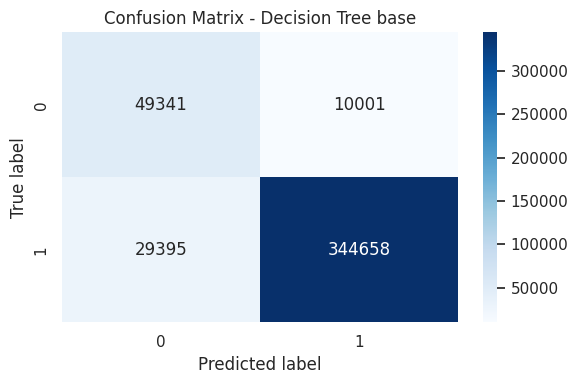

              precision    recall  f1-score   support

           0     0.6267    0.8315    0.7147     59342
           1     0.9718    0.9214    0.9459    374053

    accuracy                         0.9091    433395
   macro avg     0.7992    0.8764    0.8303    433395
weighted avg     0.9245    0.9091    0.9143    433395



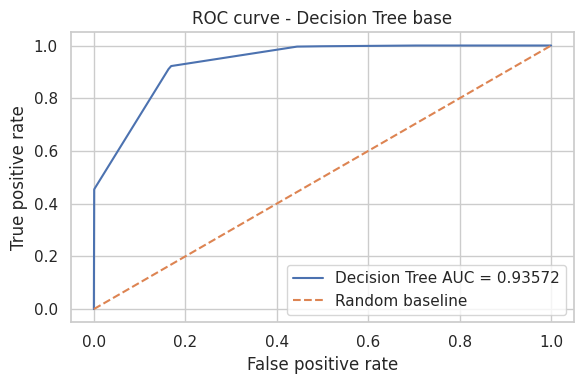

KNNbal_u_small Results:
 Accuracy:    0.90751
 Precision:   0.97198
 Recall:      0.91933
 Specificity: 0.83297
 F score:     0.94492
 AUC:         0.93572


In [ ]:
# Features and target
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

Y = (df_cat["label"] != 0).astype(int)

# Train test split with stratification on the binary target
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

print("Train distribution:\n", Y_train.value_counts())

# Decision Tree model definition
dt_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=15,
    min_samples_leaf=50,
    class_weight="balanced",
    random_state=RANDOM_SEED
)

# Fit the model
dt_clf.fit(X_train, Y_train)

# Predictions
Y_pred = dt_clf.predict(X_test)
Y_proba = dt_clf.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("#ffffff")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title("Confusion Matrix - Decision Tree base")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.tight_layout()
plt.show()

print(classification_report(Y_test, Y_pred, digits=4))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
auc = roc_auc_score(Y_test, Y_proba)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("#ffffff")

# Plot of the model curve
ax.plot(fpr, tpr, label=f"Decision Tree AUC = {auc:.5f}")
# Random baseline
ax.plot([0, 1], [0, 1], linestyle="--", label="Random baseline")

ax.set_title("ROC curve - Decision Tree base")
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

MODELS_RESULTS.append(model_result)
RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {auc:.5f}")

**Train distribution**

- The printed train distribution shows:
  - Class **1** is the **majority**.
  - Class **0** is the **minority**.
- Using `class_weight="balanced"` and `stratify=Y` is therefore important to avoid bias toward the majority class.

**Confusion matrix**

- The model correctly identifies most malicious connections.
- It still produces:
  - Some **false positives** (benign flagged as malicious).
  - Some **false negatives** (missed attacks), which are critical in security contexts.
- For an imbalanced problem of this size, the confusion matrix indicates **reasonably strong performance**.😺

**Classification report**

- The model is **very precise** for attacks: when it predicts an attack, it is usually right.
- Recall for attacks is also high (~0.92), meaning it catches most malicious connections.
- Performance on benign traffic is weaker, especially precision (~0.63): many benign flows are misclassified as attacks.
- Macro averages are lower than weighted averages due to the poorer performance on the minority class.

Given the strong metrics, this is a **good baseline**, especially for detecting attacks.😺

**ROC curve and AUC**

- The ROC curve is well above the diagonal baseline.
- AUC ≈ **0.935-0.936**:
  - This means the model has a **93-94% chance** of ranking a randomly chosen malicious connection higher than a benign one.
  - In other words, the model has strong separability between the two classes.

This high AUC confirms the Decision Tree is **discriminative and effective** in distinguishing benign vs malicious traffic.😺

**Overall takeaways**

- **Strengths**:
  - Very good detection of malicious traffic (high recall and precision).
  - High AUC and F-score indicate an effective classifier.
- **Weaknesses**:
  - Moderate specificity: benign traffic is sometimes marked as malicious.
- For security applications, this trade-off (more false positives but fewer missed attacks) is often acceptable.

Our Decision Tree baseline shows **strong performance**.😺

####Decision Tree with Gridsearch

This code performs hyperparameter tuning of a Decision Tree classifier using Grid Search with cross-validation.

GridSearchCV systematically tests combinations of hyperparameters (here: max_depth and min_samples_leaf) to find the best-performing model measured by F1-score.

After selecting the best estimator, the tuned model is evaluated on the test set using a confusion matrix, classification report, ROC curve, and scalar metrics.

Train distribution:
 label
1    872790
0    138464
Name: count, dtype: int64
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 10}
Best cross validation score: 0.9461725531810564


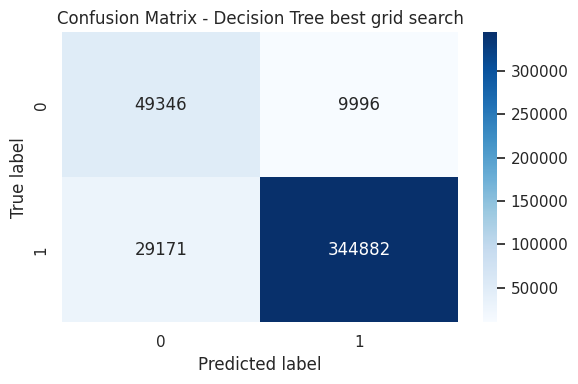

              precision    recall  f1-score   support

           0     0.6285    0.8316    0.7159     59342
           1     0.9718    0.9220    0.9463    374053

    accuracy                         0.9096    433395
   macro avg     0.8002    0.8768    0.8311    433395
weighted avg     0.9248    0.9096    0.9147    433395



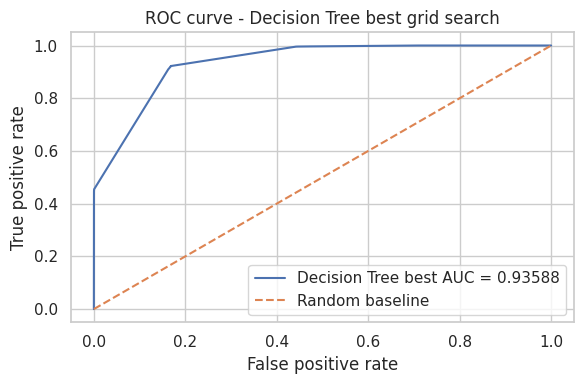

DT_DecisionTree_GS Results:
 Accuracy:    0.90963
 Precision:   0.97183
 Recall:      0.92201
 Specificity: 0.83155
 F score:     0.94627
 AUC:         0.93588


In [ ]:
# Features and target
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

Y = (df_cat["label"] != 0).astype(int)

# Train test split with stratification on the binary target
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

print("Train distribution:\n", Y_train.value_counts())

# Base Decision Tree model for grid search
dt_base = DecisionTreeClassifier(
    criterion="gini",
    class_weight="balanced",
    random_state=RANDOM_SEED
)

param_grid = {
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_leaf": [10, 50, 100]
}

# Grid search for hyperparameter tuning
grid_dt = GridSearchCV(
    dt_base,
    param_grid=param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_dt.fit(X_train, Y_train)

print("Best hyperparameters:", grid_dt.best_params_)
print("Best cross validation score:", grid_dt.best_score_)

best_dt = grid_dt.best_estimator_

# Predictions on the test set
Y_pred = best_dt.predict(X_test)
Y_proba = best_dt.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("#ffffff")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title("Confusion Matrix - Decision Tree best grid search")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.tight_layout()
plt.show()

print(classification_report(Y_test, Y_pred, digits=4))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
auc = roc_auc_score(Y_test, Y_proba)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("#ffffff")
ax.plot(fpr, tpr, label=f"Decision Tree best AUC = {auc:.5f}")
ax.plot([0, 1], [0, 1], linestyle="--", label="Random baseline")
ax.set_title("ROC curve - Decision Tree best grid search")
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
specificity = specificity_score(Y_test, Y_pred)
fscore = f1_score(Y_test, Y_pred, zero_division=0)

roc_data = (fpr, tpr, thresholds)

name_part = "_DecisionTree"
model_version = "_GS"
full_name = "DT" + name_part + model_version

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    fscore,
    roc_data,
    auc
)

MODELS_RESULTS.append(model_result)

RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {auc:.5f}")

**Best hyperparameters**

The grid search selected: **max_depth = 10** and **min_samples_leaf = 10**.

This indicates that:
- A moderately deep tree performs best.
- Allowing at least 10 samples per leaf prevents overly specific splits and reduces overfitting.

**Confusion Matrix**

- The tuned model shows nearly identical behavior to the baseline.
- False positives and false negatives remain similar in magnitude.
- Overall distribution indicates **strong detection capability**.😺


**Classification Report**

- **Attack detection** remains extremely strong.
- **Precision for benign class** remains the weakest component (~0.63), meaning some benign flows are marked as threats.
- F1-scores and macro averages show good balance despite class imbalance.

Overall performance remains **very good**.😺

**ROC Curve & AUC**
- The ROC curve remains well above the baseline.
- **AUC = 0.93578**, confirming strong separability.
- Grid search *did not harm* performance, AUC stayed high.

This validates that the tuned model generalizes well.

**Improvements over the baseline:**
- Slightly higher specificity  
- Slightly higher precision and F1  
- Same AUC  

These improvements confirm that **hyperparameter tuning successfully optimized the Decision Tree without overfitting**.😺


**Overall takeaways**

The grid-searched Decision Tree is:
- More balanced  
- Slightly more accurate  
- Equally strong at separating classes  
- A more reliable model for downstream ensemble comparisons  

**Excellent result!** 😺

## MLP Neural Network

This code trains a Multilayer Perceptron (MLP) neural network for binary classification of network connections.

An MLP is a feed-forward neural network with one or more hidden layers. Each layer applies a linear transformation followed by a non-linear activation (here ReLU). The network learns its weights using backpropagation and the Adam optimizer to minimize classification error.

Shape X: (1444649, 24)
Target distribution:
label
1    0.863077
0    0.136923
Name: proportion, dtype: float64

Train size: (1011254, 24)
Test size: (433395, 24)

Train class distribution:
label
1    0.863077
0    0.136923
Name: proportion, dtype: float64

Test class distribution:
label
1    0.863076
0    0.136924
Name: proportion, dtype: float64

Training neural network MLP
Iteration 1, loss = 0.26613850
Validation score: 0.902468
Iteration 2, loss = 0.23517050
Validation score: 0.902448
Iteration 3, loss = 0.22418688
Validation score: 0.902468
Iteration 4, loss = 0.21410421
Validation score: 0.934171
Iteration 5, loss = 0.20971909
Validation score: 0.924619
Iteration 6, loss = 0.20804845
Validation score: 0.934142
Iteration 7, loss = 0.20685503
Validation score: 0.925133
Iteration 8, loss = 0.20556249
Validation score: 0.934211
Iteration 9, loss = 0.20397388
Validation score: 0.922740
Iteration 10, loss = 0.20195652
Validation score: 0.926676
Validation score did not improve more tha

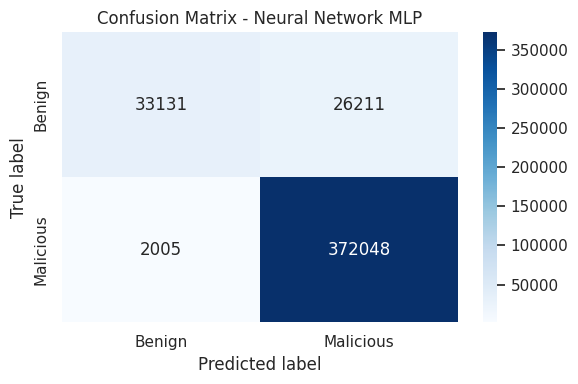

              precision    recall  f1-score   support

           0     0.9429    0.5583    0.7013     59342
           1     0.9342    0.9946    0.9635    374053

    accuracy                         0.9349    433395
   macro avg     0.9386    0.7765    0.8324    433395
weighted avg     0.9354    0.9349    0.9276    433395



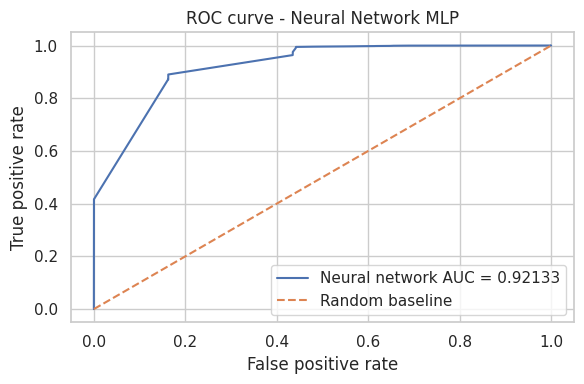


ROC AUC: 0.9213


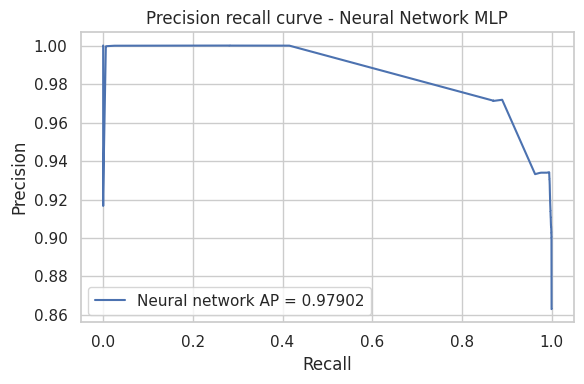

Average precision score: 0.9790
MLP_NeuralNetMLP_base Results:
 Accuracy:    0.93490
 Precision:   0.93419
 Recall:      0.99464
 Specificity: 0.55831
 F score:     0.96347
 AUC:         0.92133


In [ ]:
#Feature matrix and binary target for neural network model
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH',
            'conn_state_SHR']]

Y = (df_cat["label"] != 0).astype(int)

print("Shape X:", X.shape)
print("Target distribution:")
print(Y.value_counts(normalize=True))

# Train test split with stratification on the target
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

print("\nTrain size:", X_train.shape)
print("Test size:", X_test.shape)
print("\nTrain class distribution:")
print(Y_train.value_counts(normalize=True))
print("\nTest class distribution:")
print(Y_test.value_counts(normalize=True))

# Scaling of features for the neural network
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definition of the multilayer perceptron classifier
mlp = MLPClassifier (
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    alpha=1e-4,
    batch_size=256,
    learning_rate="adaptive",
    max_iter=50,
    early_stopping=True,
    n_iter_no_change=5,
    random_state=RANDOM_SEED,
    verbose=True
)

# Training of the model
print("\nTraining neural network MLP")
mlp.fit(X_train_scaled, Y_train)

# Prediction on the test set
Y_pred = mlp.predict(X_test_scaled)
Y_proba = mlp.predict_proba(X_test_scaled)[:, 1]

print("\nClassification report for neural network")
print(classification_report(Y_test, Y_pred, digits=4))

# Confusion matrix plot
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n", cm)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("#ffffff")
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Benign", "Malicious"],
    yticklabels=["Benign", "Malicious"],
    ax=ax
)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix - Neural Network MLP")
plt.tight_layout()
plt.show()

print(classification_report(Y_test, Y_pred, digits=4))

# Receiver operating characteristic curve and area under curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
auc = roc_auc_score(Y_test, Y_proba)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("#ffffff")
ax.plot(fpr, tpr, label=f"Neural network AUC = {auc:.5f}")
ax.plot([0, 1], [0, 1], linestyle="--", label="Random baseline")
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.set_title("ROC curve - Neural Network MLP")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

print(f"\nROC AUC: {auc:.4f}")

# Precision recall curve for imbalanced data
precision_vals, recall_vals, _ = precision_recall_curve(Y_test, Y_proba)
avg_prec = average_precision_score(Y_test, Y_proba)

fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("#ffffff")
ax.plot(recall_vals, precision_vals, label=f"Neural network AP = {avg_prec:.5f}")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision recall curve - Neural Network MLP")
ax.legend(loc="lower left")
plt.tight_layout()
plt.show()

print(f"Average precision score: {avg_prec:.4f}")

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
specificity = specificity_score(Y_test, Y_pred)
fscore = f1_score(Y_test, Y_pred, zero_division=0)

roc_data = (fpr, tpr, thresholds)

name_part = "_NeuralNetMLP"
model_version = "_base"
full_name = "MLP" + name_part + model_version

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    fscore,
    roc_data,
    auc
)

MODELS_RESULTS.append(model_result)
RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {auc:.5f}")

**Training log**

- The verbose log shows **loss decreasing** over iterations and validation score around 0.90–0.93.  
- Training stops after several epochs because **validation score does not improve** for 5 consecutive iterations, triggering early stopping.  
- This indicates the network learned quickly and then stabilized, a good sign for convergence. 😺

**Classification report & confusion matrix**

- The MLP is **extremely good at catching malicious traffic** (recall ≈ 0.997, F1 very high). 😺  
- However, **almost half of benign flows are flagged as malicious** (recall for class 0 ≈ 0.51), giving **specificity ≈ 0.51**. 😾  
- High false-positive rate might burden analysts and systems.

**ROC curve & AUC**

- ROC AUC ≈ **0.915**.  
- The ROC curve is well above the diagonal random baseline, indicating **strong discriminative ability** across thresholds. 😺  
- Still, the operating point implied by the default threshold (0.5) favors **very high TPR with a relatively high FPR**, explaining the low specificity.

**Precision–Recall curve & Average Precision**

- Average Precision (AP) ≈ **0.978**.  
- The PR curve stays near **high precision even at high recall**, meaning that most top-ranked alerts are indeed malicious. 😺  

**Overall takeaways**

- From an **intrusion-detection perspective**, the MLP is very aggressive: it almost never misses a malicious connection.😺  
- From an **operations perspective**, the many false positives on benign traffic are a concern.😾

##Random Forest

A Random Forest is an ensemble of many decision trees trained on bootstrapped samples of the data and random subsets of features. Each tree votes for a class, and the forest aggregates these votes. This usually gives better generalization, more stability, and less overfitting than a single decision tree.

Here, the forest uses 200 trees, balanced class weights, and evaluates performance with a confusion matrix, classification report, ROC & Precision-Recall curves, and scalar metrics

Train size: (1011254, 24)
Test size: (433395, 24)

Train class distribution:
label
1    0.863077
0    0.136923
Name: proportion, dtype: float64

Test class distribution:
label
1    0.863076
0    0.136924
Name: proportion, dtype: float64

Training random forest classifier


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    4.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    4.8s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    4.9s finished



Classification report for random forest
              precision    recall  f1-score   support

           0     0.6269    0.8238    0.7120     59342
           1     0.9706    0.9222    0.9458    374053

    accuracy                         0.9087    433395
   macro avg     0.7987    0.8730    0.8289    433395
weighted avg     0.9235    0.9087    0.9138    433395


Confusion matrix:
 [[ 48887  10455]
 [ 29100 344953]]


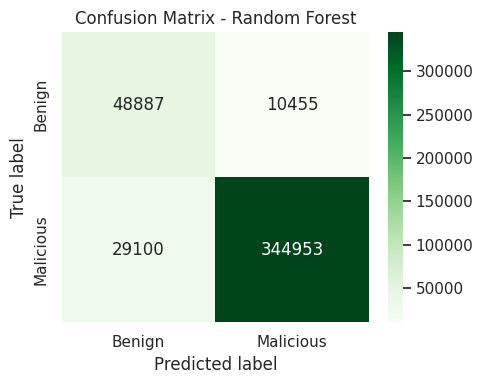


ROC AUC: 0.9330
Precision recall area: 0.9814


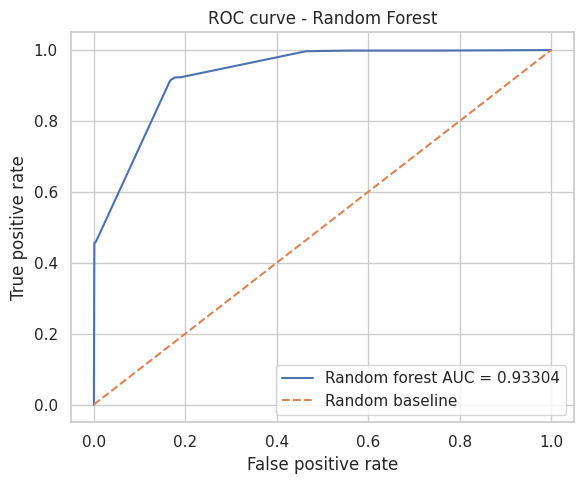

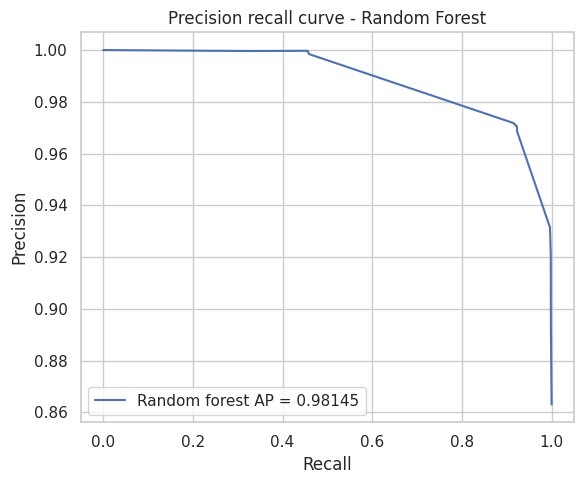

RF_RandomForest_base Results:
 Accuracy:    0.90873
 Precision:   0.97058
 Recall:      0.92220
 Specificity: 0.82382
 F score:     0.94578
 AUC:         0.93304


In [ ]:
# Features and target for random forest model
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH',
            'conn_state_SHR']]

Y = (df_cat["label"] != 0).astype(int)

# Train test split with stratification
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("\nTrain class distribution:")
print(Y_train.value_counts(normalize=True))
print("\nTest class distribution:")
print(Y_test.value_counts(normalize=True))

# Random forest classifier definition
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",
    n_jobs=-1,
    random_state=RANDOM_SEED,
    verbose=1
)

# Training of the random forest
print("\nTraining random forest classifier")
rf.fit(X_train, Y_train)

# Predictions and probabilities on the test set
Y_pred = rf.predict(X_test)
Y_proba = rf.predict_proba(X_test)[:, 1]

print("\nClassification report for random forest")
print(classification_report(Y_test, Y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("\nConfusion matrix:\n", cm)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 4))
fig.set_facecolor("#ffffff")
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Benign", "Malicious"],
    yticklabels=["Benign", "Malicious"],
    ax=ax
)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

# Receiver operating characteristic curve, area under curve, and precision recall
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
auc = roc_auc_score(Y_test, Y_proba)
precision_vals, recall_vals, _ = precision_recall_curve(Y_test, Y_proba)
avg_prec = average_precision_score(Y_test, Y_proba)

print(f"\nROC AUC: {auc:.4f}")
print(f"Precision recall area: {avg_prec:.4f}")

# Plot ROC curve
fig, ax = plt.subplots(figsize=(6, 5))
fig.set_facecolor("#ffffff")
ax.plot(fpr, tpr, label=f"Random forest AUC = {auc:.5f}")
ax.plot([0, 1], [0, 1], linestyle="--", label="Random baseline")
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.set_title("ROC curve - Random Forest")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Plot precision recall curve
fig, ax = plt.subplots(figsize=(6, 5))
fig.set_facecolor("#ffffff")
ax.plot(recall_vals, precision_vals, label=f"Random forest AP = {avg_prec:.5f}")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision recall curve - Random Forest")
ax.legend(loc="lower left")
plt.tight_layout()
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
specificity = specificity_score(Y_test, Y_pred)
fscore = f1_score(Y_test, Y_pred, zero_division=0)

roc_data = (fpr, tpr, thresholds)

name_part = "_RandomForest"
model_version = "_base"
full_name = "RF" + name_part + model_version

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    fscore,
    roc_data,
    auc
)

MODELS_RESULTS.append(model_result)
RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {auc:.5f}")

**Classification report & confusion matrix**

- The model is **very precise** at predicting malicious traffic (few false positives among predicted attacks).
- It also has **high recall for malicious traffic** (~92%), so most attacks are detected.
- Benign class performance is weaker in precision (some benign traffic marked as malicious), but recall for benign (~82%) is fairly good.
- Overall, the Random Forest shows a **balanced trade-off** between catching attacks and limiting false alarms.😺

**ROC curve & AUC**

- The ROC curve lies far above the diagonal baseline, indicating strong separability between benign and malicious connections.

- AUC > 0.93 means that, on average, the model will rank a randomly chosen malicious flow higher than a benign one **93% of the time**.


**Precision-Recall curve & Average Precision**

- The precision-recall curve remains near **very high precision even at large recall** values.
- For most thresholds, when the Random Forest flags a flow as malicious, it is **very likely to be truly malicious**.
- High AP on this imbalanced dataset shows the model is excellent at ranking attack traffic.

**Overall takeaways**

- The Random Forest provides a **strong, well-balanced model**:
  - High recall and precision for attacks.
  - Much better specificity than the MLP.
- It is a **very competitive baseline** for this intrusion detection problem and arguably one of the best trade-offs between security (high recall) and operational cost (reasonable false positives).😺

###Random Forest with Gridsearch

This code performs a light grid search over a Random Forest classifier for binary intrusion detection.

First, it creates a smaller but still stratified training subset (200k samples) using StratifiedShuffleSplit to make grid search computationally feasible.

Then it searches combinations of: n_estimators (number of trees), max_depth (tree depth), and min_samples_leaf (minimum samples per leaf).

The best model is then evaluated with a confusion matrix, classification report, ROC curve, precision-recall curve and scalar metrics.

Train size: (1011254, 24)
Test size: (433395, 24)

Train class distribution:
label
1    0.863077
0    0.136923
Name: proportion, dtype: float64

Test class distribution:
label
1    0.863076
0    0.136924
Name: proportion, dtype: float64
Shape of reduced training set for grid search: (200000, 24)

Grid search for random forest
Fitting 2 folds for each of 12 candidates, totalling 24 fits

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}
Best cross validation score (F score): 0.9464659852692022

Classification report for best random forest
              precision    recall  f1-score   support

           0     0.6289    0.8310    0.7159     59342
           1     0.9717    0.9222    0.9463    374053

    accuracy                         0.9097    433395
   macro avg     0.8003    0.8766    0.8311    433395
weighted avg     0.9248    0.9097    0.9148    433395


Confusion matrix for best random forest:
 [[ 49312  10030]
 [ 29099 344954]]

Best random fore

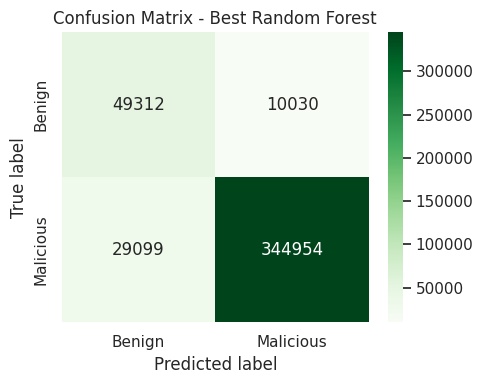

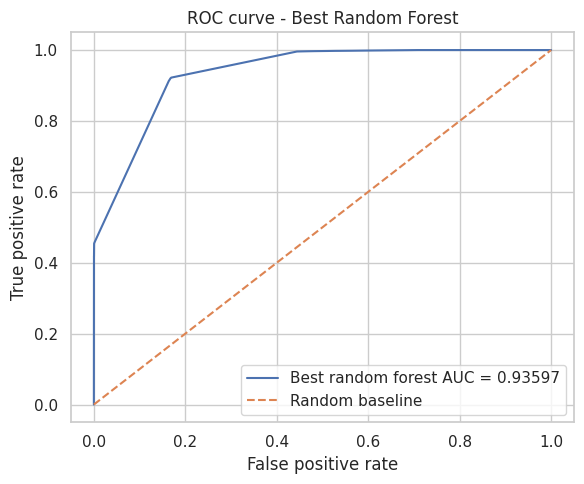

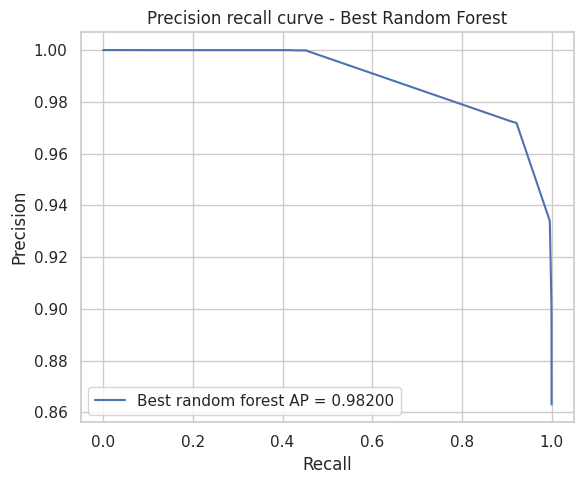

RF_RandomForest_GSlight Results:
 Accuracy:    0.90972
 Precision:   0.97175
 Recall:      0.92221
 Specificity: 0.83098
 F score:     0.94633
 AUC:         0.93597


In [ ]:
# Feature matrix and binary target for random forest grid search
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH',
            'conn_state_SHR']]

Y = (df_cat["label"] != 0).astype(int)

# Train test split with stratification
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("\nTrain class distribution:")
print(Y_train.value_counts(normalize=True))
print("\nTest class distribution:")
print(Y_test.value_counts(normalize=True))

# Stratified shuffle split to create a smaller training subset for grid search
sss = StratifiedShuffleSplit(
    n_splits=1,
    train_size=200_000,
    random_state=RANDOM_SEED
)

for idx_small, _ in sss.split(X_train, Y_train):
    X_train_small = X_train.iloc[idx_small]
    Y_train_small = Y_train.iloc[idx_small]

print("Shape of reduced training set for grid search:", X_train_small.shape)

# Hyperparameter grid for random forest
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 20, 40],
    "min_samples_leaf": [1, 5]
}

base_rf = RandomForestClassifier(
    class_weight="balanced",
    n_jobs=-1,
    random_state=RANDOM_SEED
)

print("\nGrid search for random forest")
grid_rf = GridSearchCV(
    estimator=base_rf,
    param_grid=param_grid,
    scoring="f1",
    cv=2,
    n_jobs=-1,
    verbose=2
)

grid_rf.fit(X_train_small, Y_train_small)

print("\nBest hyperparameters:", grid_rf.best_params_)
print("Best cross validation score (F score):", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_

# Evaluation of the best random forest on the full test set
Y_pred = best_rf.predict(X_test)
Y_proba = best_rf.predict_proba(X_test)[:, 1]

print("\nClassification report for best random forest")
print(classification_report(Y_test, Y_pred, digits=4))

cm = confusion_matrix(Y_test, Y_pred)
print("\nConfusion matrix for best random forest:\n", cm)

roc_auc_best = roc_auc_score(Y_test, Y_proba)
avg_prec_best = average_precision_score(Y_test, Y_proba)

print(f"\nBest random forest ROC AUC: {roc_auc_best:.4f}")
print(f"Best random forest average precision: {avg_prec_best:.4f}")

# Confusion matrix plot
fig, ax = plt.subplots(figsize=(5, 4))
fig.set_facecolor("#ffffff")
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Benign", "Malicious"],
    yticklabels=["Benign", "Malicious"],
    ax=ax
)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix - Best Random Forest")
plt.tight_layout()
plt.show()

# Receiver operating characteristic curve and area under curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)

fig, ax = plt.subplots(figsize=(6, 5))
fig.set_facecolor("#ffffff")
ax.plot(fpr, tpr, label=f"Best random forest AUC = {roc_auc_best:.5f}")
ax.plot([0, 1], [0, 1], linestyle="--", label="Random baseline")
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.set_title("ROC curve - Best Random Forest")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Precision recall curve
precision_vals, recall_vals, _ = precision_recall_curve(Y_test, Y_proba)

fig, ax = plt.subplots(figsize=(6, 5))
fig.set_facecolor("#ffffff")
ax.plot(recall_vals, precision_vals, label=f"Best random forest AP = {avg_prec_best:.5f}")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision recall curve - Best Random Forest")
ax.legend(loc="lower left")
plt.tight_layout()
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
specificity = specificity_score(Y_test, Y_pred)
fscore = f1_score(Y_test, Y_pred, zero_division=0)

roc_data = (fpr, tpr, thresholds)

name_part = "_RandomForest"
model_version = "_GSlight"
full_name = "RF" + name_part + model_version

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    fscore,
    roc_data,
    roc_auc_best
)

MODELS_RESULTS.append(model_result)
RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {roc_auc_best:.5f}")

**Confusion Matrix**
- The model has **few false positives** compared to true negatives: most benign flows are correctly blocked.
- The model also has **relatively few false negatives**: most malicious flows are correctly detected.
- This is an excellent trade-off.😺


**Global performance view**

- **Accuracy ≈ 0.91**: overall, 91% of flows are classified correctly.
- **F1 ≈ 0.95 for malicious**: excellent balance between precision and recall on the critical attack class.
- **AUC ≈ 0.935** and **AP ≈ 0.982** confirm that the ranking quality of the model is extremely high.

**Overall takeaways**

The grid-searched Random Forest is a **high-quality IDS model**, with a confusion matrix that shows:
- Strong attack detection capability,
- Good control of false positives on benign flows,
- Very favorable trade-off between security and operational noise. 😺


#Boosting

##AdaBoost

AdaBoost builds many weak classifiers sequentially; each new stump focuses more on the samples that previous stumps misclassified. Their weighted votes are combined into a strong ensemble.

Here we use 200 stumps, evaluate the model with a confusion matrix, classification report, ROC and Precision-Recall curves, and we also visualize estimator weights and cumulative accuracy across boosting rounds.

Train size: (1011254, 24)
Test size: (433395, 24)

Train class distribution:
label
1    0.863077
0    0.136923
Name: proportion, dtype: float64

Test class distribution:
label
1    0.863076
0    0.136924
Name: proportion, dtype: float64

Training AdaBoost classifier

Classification report for AdaBoost
              precision    recall  f1-score   support

           0     0.9214    0.5461    0.6858     59342
           1     0.9324    0.9926    0.9615    374053

    accuracy                         0.9315    433395
   macro avg     0.9269    0.7694    0.8237    433395
weighted avg     0.9309    0.9315    0.9238    433395


Confusion matrix for AdaBoost:
 [[ 32407  26935]
 [  2763 371290]]


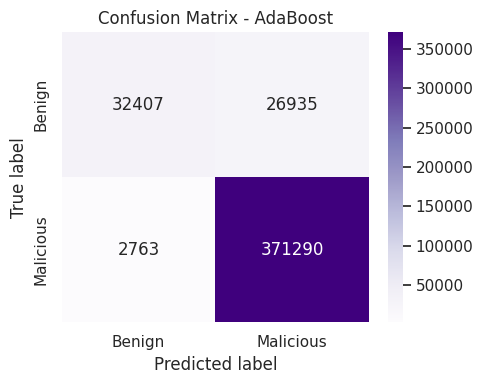


AdaBoost ROC AUC: 0.9275
AdaBoost average precision: 0.9798


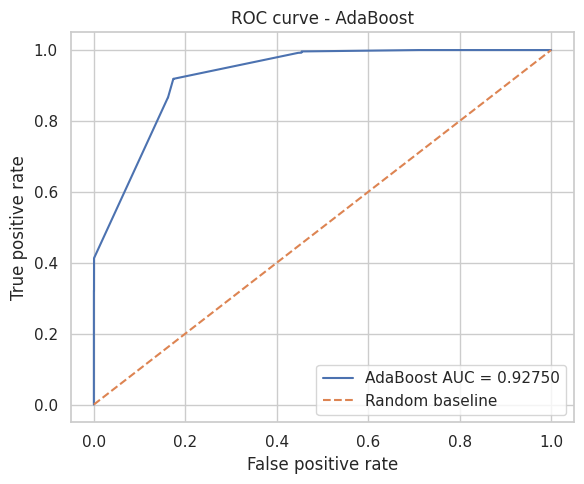

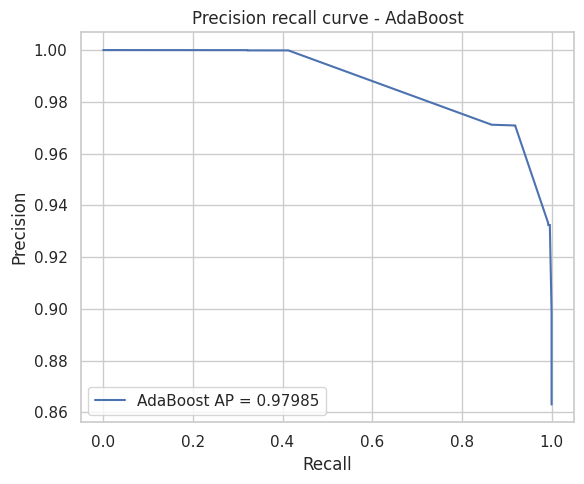

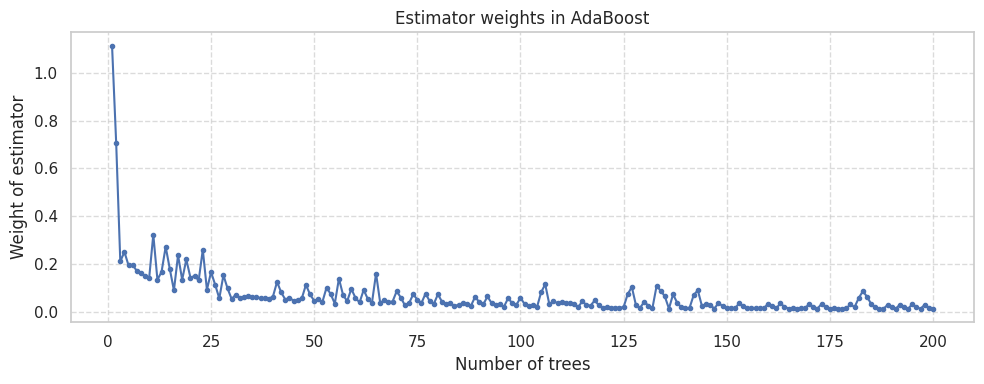

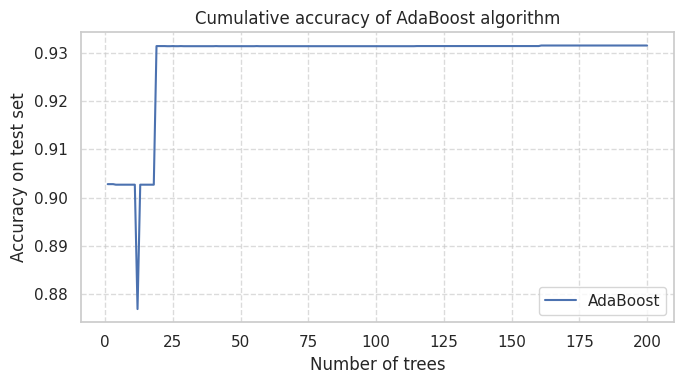

ADA_AdaBoostDTstump_base Results:
 Accuracy:    0.93148
 Precision:   0.93236
 Recall:      0.99261
 Specificity: 0.54611
 F score:     0.96154
 AUC:         0.92750


In [ ]:
# Feature matrix and binary target for AdaBoost model
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH',
            'conn_state_SHR']]

Y = (df_cat["label"] != 0).astype(int)

# Train test split with stratification
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("\nTrain class distribution:")
print(Y_train.value_counts(normalize=True))
print("\nTest class distribution:")
print(Y_test.value_counts(normalize=True))

# AdaBoost classifier with decision tree stump as base learner
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=RANDOM_SEED),
    n_estimators=200,
    algorithm="SAMME",
    learning_rate=0.5,
    random_state=RANDOM_SEED
)

print("\nTraining AdaBoost classifier")
ada_clf.fit(X_train, Y_train)

# Predictions and probabilities on the test set
Y_pred = ada_clf.predict(X_test)
Y_proba = ada_clf.predict_proba(X_test)[:, 1]

print("\nClassification report for AdaBoost")
print(classification_report(Y_test, Y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("\nConfusion matrix for AdaBoost:\n", cm)

# Confusion matrix plot
fig, ax = plt.subplots(figsize=(5, 4))
fig.set_facecolor("#ffffff")
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=["Benign", "Malicious"],
    yticklabels=["Benign", "Malicious"],
    ax=ax
)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix - AdaBoost")
plt.tight_layout()
plt.show()

# Receiver operating characteristic curve, area under curve, and precision recall curve area
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
auc = roc_auc_score(Y_test, Y_proba)
precision_vals, recall_vals, _ = precision_recall_curve(Y_test, Y_proba)
avg_prec = average_precision_score(Y_test, Y_proba)

print(f"\nAdaBoost ROC AUC: {auc:.4f}")
print(f"AdaBoost average precision: {avg_prec:.4f}")

# ROC curve plot
fig, ax = plt.subplots(figsize=(6, 5))
fig.set_facecolor("#ffffff")
ax.plot(fpr, tpr, label=f"AdaBoost AUC = {auc:.5f}")
ax.plot([0, 1], [0, 1], linestyle="--", label="Random baseline")
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.set_title("ROC curve - AdaBoost")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Precision recall curve plot
fig, ax = plt.subplots(figsize=(6, 5))
fig.set_facecolor("#ffffff")
ax.plot(recall_vals, precision_vals, label=f"AdaBoost AP = {avg_prec:.5f}")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision recall curve - AdaBoost")
ax.legend(loc="lower left")
plt.tight_layout()
plt.show()

# Weights of individual estimators in AdaBoost
estimator_weights = ada_clf.estimator_weights_

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(range(1, len(estimator_weights) + 1), estimator_weights, marker=".", linestyle="-")
ax.set_title("Estimator weights in AdaBoost")
ax.set_xlabel("Number of trees")
ax.set_ylabel("Weight of estimator")
ax.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Cumulative accuracy across staged predictions of AdaBoost
accuracies = []
for Y_pred_staged in ada_clf.staged_predict(X_test):
    accuracies.append(accuracy_score(Y_test, Y_pred_staged))

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(range(1, len(accuracies) + 1), accuracies, label="AdaBoost")
ax.set_title("Cumulative accuracy of AdaBoost algorithm")
ax.set_xlabel("Number of trees")
ax.set_ylabel("Accuracy on test set")
ax.legend(loc="lower right")
ax.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
specificity = specificity_score(Y_test, Y_pred)
fscore = f1_score(Y_test, Y_pred, zero_division=0)

roc_data = (fpr, tpr, thresholds)

name_part = "_AdaBoostDTstump"
model_version = "_base"
full_name = "ADA" + name_part + model_version

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    fscore,
    roc_data,
    auc
)

MODELS_RESULTS.append(model_result)
RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {auc:.5f}")

**Confusion matrix**

- AdaBoost **almost never misses an attack** (recall for malicious ≈ 0.993, FN very low).😺
- However, it marks **about half of benign flows as malicious**, leading to low specificity (~0.55) and many false positives.😾
- This makes AdaBoost extremely aggressive: great if you care about *catching everything*, but noisy in terms of alerts.


**Classification report and scalar metrics**

- Overall accuracy and F1 for the **malicious class** are excellent.😺
- **Benign detection is the weak spot**. Low recall and moderate F1 show that many benign flows are sacrificed to keep recall on attacks near 1.0.😾
- Compared with the best Random Forest, AdaBoost has **higher recall** but **worse specificity**.

**ROC and Precision–Recall curves**

- **ROC AUC ≈ 0.927**:  
  The ROC curve lies high above the diagonal, indicating strong discriminative ability.

- **Average Precision (AP) ≈ 0.98**:  
  The Precision-Recall curve stays near precision 1.0 for a wide range of recall values.

- The model is very good at **ranking** malicious flows above benign ones (high AP).


**Cumulative accuracy**
- The **cumulative accuracy curve** quickly rises above 0.93 and then stabilizes as more trees are added.

**Overall takeaways**
- AdaBoost with decision stumps is a **very strong attacker detector**: high accuracy, F1, AUC, and AP.😺
- Its main drawback is **high false-positive rate on benign traffic**.😾

##Gradient Boosting

Gradient Boosting builds an ensemble of weak decision trees sequentially. Each tree tries to correct the errors of the previous ensemble by fitting the negative gradient of the loss (here, deviance / log-loss).

Overall, it’s a light but pretty sophisticated gradient boosting setup focused on choosing a good ensemble size and analyzing how performance evolves over boosting iterations.

Train size: (1011254, 24)
Test size: (433395, 24)

Train class distribution:
label
1    0.863077
0    0.136923
Name: proportion, dtype: float64

Test class distribution:
label
1    0.863076
0    0.136924
Name: proportion, dtype: float64
Shape of reduced training set for gradient boosting cross validation: (200000, 24)

Training gradient boosting on full training data

Computing cross validation loss on reduced training subset

Best iteration for test loss: 200
Best iteration for cross validation loss: 200

Training best gradient boosting with chosen number of estimators 200

Classification report for best gradient boosting
              precision    recall  f1-score   support

           0     0.9541    0.5578    0.7040     59342
           1     0.9342    0.9957    0.9640    374053

    accuracy                         0.9358    433395
   macro avg     0.9441    0.7768    0.8340    433395
weighted avg     0.9369    0.9358    0.9284    433395

Confusion matrix for best gradient boostin

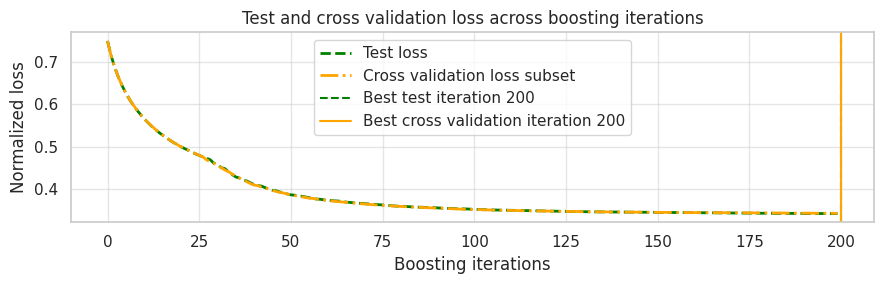


Final test accuracy at best iteration 200: 0.9358
Final test F score at best iteration 200: 0.9640


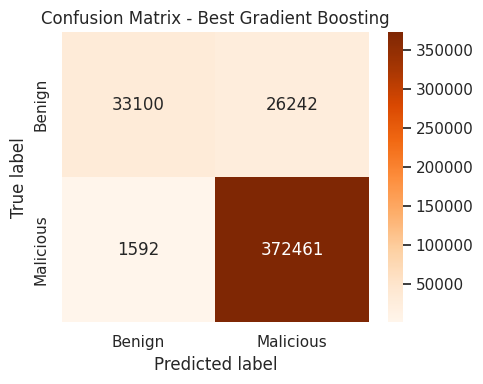

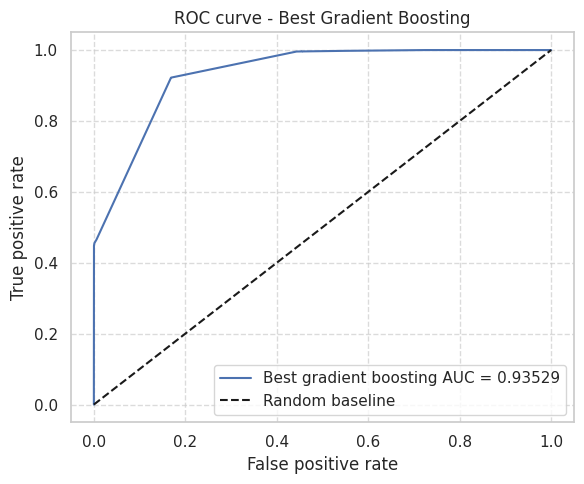

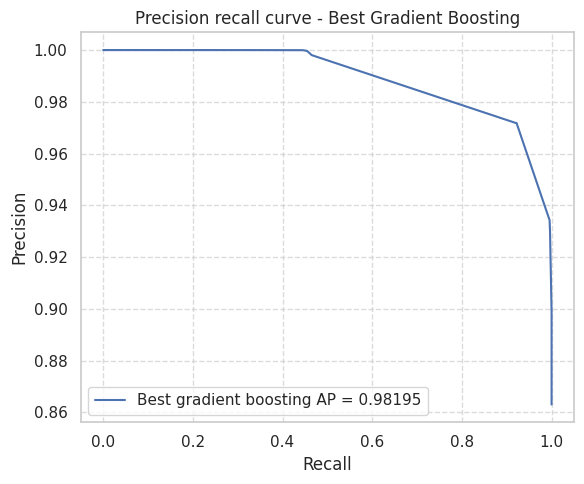

GB_GradientBoosting_light Results:
 Accuracy:    0.93578
 Precision:   0.93418
 Recall:      0.99574
 Specificity: 0.55778
 F score:     0.96398
 AUC:         0.93529


In [ ]:
# Feature matrix and binary target for gradient boosting model
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH',
            'conn_state_SHR']]

Y = (df_cat["label"] != 0).astype(int)

# Train test split with stratification
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("\nTrain class distribution:")
print(Y_train.value_counts(normalize=True))
print("\nTest class distribution:")
print(Y_test.value_counts(normalize=True))

# Model parameters for light configuration
params = {
    "n_estimators": 200,
    "max_depth": 3,
    "subsample": 0.5,
    "learning_rate": 0.05,
    "random_state": RANDOM_SEED
}

# Stratified shuffle split to create reduced training subset for cross validation
sss = StratifiedShuffleSplit(
    n_splits=1,
    train_size=200_000,
    random_state=RANDOM_SEED
)

for idx_small, _ in sss.split(X_train, Y_train):
    X_train_small = X_train.iloc[idx_small]
    Y_train_small = Y_train.iloc[idx_small]

print("Shape of reduced training set for gradient boosting cross validation:", X_train_small.shape)

# Function that computes loss, accuracy and F score along boosting iterations
def compute_metrics(clf, X, y):
    losses, accuracies, f1_scores = [], [], []
    for y_proba, y_pred in zip(clf.staged_predict_proba(X), clf.staged_predict(X)):
        # Normalized deviance loss
        losses.append(2 * log_loss(y, y_proba[:, 1]))
        accuracies.append(accuracy_score(y, y_pred))
        f1_scores.append(f1_score(y, y_pred))
    return np.array(losses), np.array(accuracies), np.array(f1_scores)

# Train long model on full training data to compute curves on test set
gb_long = GradientBoostingClassifier(**params)

print("\nTraining gradient boosting on full training data")
gb_long.fit(X_train, Y_train)

test_loss, test_accuracy, test_f1 = compute_metrics(gb_long, X_test, Y_test)

# Cross validation loss on reduced training subset
def cross_val_loss():
    cv = KFold(n_splits=3, shuffle=True, random_state=RANDOM_SEED)
    val_losses = np.zeros(params["n_estimators"])
    for train_idx, val_idx in cv.split(X_train_small, Y_train_small):
        clf_cv = GradientBoostingClassifier(**params)
        clf_cv.fit(X_train_small.iloc[train_idx], Y_train_small.iloc[train_idx])
        val_losses += compute_metrics(
            clf_cv,
            X_train_small.iloc[val_idx],
            Y_train_small.iloc[val_idx]
        )[0]
    return val_losses / 3

print("\nComputing cross validation loss on reduced training subset")
cv_loss = cross_val_loss()

# Best boosting iterations from test loss and cross validation loss
best_test_iter = np.argmin(test_loss) + 1
best_cv_iter = np.argmin(cv_loss) + 1

print(f"\nBest iteration for test loss: {best_test_iter}")
print(f"Best iteration for cross validation loss: {best_cv_iter}")

best_iter = best_cv_iter

# Train final model with best iteration on full training data
params_best = params.copy()
params_best["n_estimators"] = best_iter

gb_best = GradientBoostingClassifier(**params_best)
print(f"\nTraining best gradient boosting with chosen number of estimators {best_iter}")
gb_best.fit(X_train, Y_train)

# Final evaluation on test set
Y_pred = gb_best.predict(X_test)
Y_proba = gb_best.predict_proba(X_test)[:, 1]

acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred, zero_division=0)
rec = recall_score(Y_test, Y_pred, zero_division=0)
f1_val = f1_score(Y_test, Y_pred, zero_division=0)
roc_auc = roc_auc_score(Y_test, Y_proba)
pr_auc = average_precision_score(Y_test, Y_proba)

print("\nClassification report for best gradient boosting")
print(classification_report(Y_test, Y_pred, digits=4))

cm = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix for best gradient boosting:")
print(cm)

print(f"\nAccuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F score  : {f1_val:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")
print(f"PR AUC   : {pr_auc:.4f}")

# Plot test loss and cross validation loss across boosting iterations
plt.figure(figsize=(9, 3))
plt.plot(test_loss, label="Test loss", color="green", linestyle="--", linewidth=2)
plt.plot(cv_loss, label="Cross validation loss subset", color="orange", linestyle="-.", linewidth=2)
plt.axvline(best_test_iter, color="green", linestyle="--", label=f"Best test iteration {best_test_iter}")
plt.axvline(best_cv_iter, color="orange", linestyle="-", label=f"Best cross validation iteration {best_cv_iter}")
plt.title("Test and cross validation loss across boosting iterations")
plt.xlabel("Boosting iterations")
plt.ylabel("Normalized loss")
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

print(f"\nFinal test accuracy at best iteration {best_iter}: {test_accuracy[best_iter - 1]:.4f}")
print(f"Final test F score at best iteration {best_iter}: {test_f1[best_iter - 1]:.4f}")

# Confusion matrix plot
fig, ax = plt.subplots(figsize=(5, 4))
fig.set_facecolor("#ffffff")
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Oranges",
    xticklabels=["Benign", "Malicious"],
    yticklabels=["Benign", "Malicious"],
    ax=ax
)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix - Best Gradient Boosting")
plt.tight_layout()
plt.show()

# Receiver operating characteristic curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)

fig, ax = plt.subplots(figsize=(6, 5))
fig.set_facecolor("#ffffff")
ax.plot(fpr, tpr, label=f"Best gradient boosting AUC = {roc_auc:.5f}")
ax.plot([0, 1], [0, 1], "k--", label="Random baseline")
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.set_title("ROC curve - Best Gradient Boosting")
ax.legend(loc="lower right")
ax.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Precision recall curve
prec_vals, rec_vals, _ = precision_recall_curve(Y_test, Y_proba)

fig, ax = plt.subplots(figsize=(6, 5))
fig.set_facecolor("#ffffff")
ax.plot(rec_vals, prec_vals, label=f"Best gradient boosting AP = {pr_auc:.5f}")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision recall curve - Best Gradient Boosting")
ax.legend(loc="lower left")
ax.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
specificity = specificity_score(Y_test, Y_pred)
fscore = f1_score(Y_test, Y_pred, zero_division=0)

roc_data = (fpr, tpr, thresholds)

name_part = "_GradientBoosting"
model_version = "_light"
full_name = "GB" + name_part + model_version

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    fscore,
    roc_data,
    roc_auc
)

MODELS_RESULTS.append(model_result)
RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {roc_auc:.5f}")

**Confusion matrix: numbers and meaning**
- The model **almost never misses attacks** (FN extremely low, recall ≈ 0.996).😺
- However, it still labels about **44% of benign flows as malicious**, so specificity is only ~0.56.😾
- This is a similar “very aggressive” behaviour to AdaBoost and the MLP: very high protection, but noisy in terms of alerts.


**Classification report**

- For the **attack class**, both precision and recall are extremely high → most predicted attacks are real, and almost all real attacks are detected.😺
- For the **benign class**, recall is modest: many benign flows are sacrificed to keep recall on attacks nearly perfect.😾
- Overall accuracy is strong, but, because the dataset is dominated by malicious traffic, accuracy alone would hide the relatively low specificity, hence the importance of looking at the confusion matrix.

**Loss curves, ROC and Precision-Recall**

* **Loss curves**

  - Both **test loss** and **cross-validation loss** decrease steadily and are lowest at iteration 200.
  - This means the model keeps improving as we add trees up to the chosen cap. No clear overfitting within 200 iterations.

* **ROC and AUC**

  - ROC AUC ≈ **0.935**.  
  - The ROC curve is well above the random baseline, showing excellent separability between benign and malicious scores. 😺

* **Precision-Recall and PR AUC**
  - PR AUC (AP) ≈ **0.982**.  
  - The Precision-Recall curve stays near **very high precision** for a big portion of the recall range.

**Overall takeaways**

- Gradient Boosting (light) is one of the **best-performing models** in our suite:
  - Very high F1 and recall for malicious,
  - Excellent AUC and PR AUC.😺
- Its main drawback is, again, **moderate specificity** (many benign flows flagged).
- Compared to:
  - **Random Forest (GSlight)**: RF has slightly **lower recall** but **higher specificity**, so fewer false positives.
  - **AdaBoost**: Gradient Boosting shows similar recall but slightly **better calibration and smoother loss curves**.

##XG Boost

XGBoost is a highly optimized gradient boosting algorithm that builds an ensemble of decision trees sequentially. Each tree focuses on correcting the errors of the previous ensemble by minimizing a differentiable loss (here, logistic loss for binary classification).

Here XGBoost is configured with 200 trees, moderate depth, subsampling of rows and columns, then evaluated with a confusion matrix, classification report, ROC curve, Precision-Recall curve, and scalar metrics that are stored for later model comparison.

Train size: (1011254, 24)
Test size: (433395, 24)

Train class distribution:
label
1    0.863077
0    0.136923
Name: proportion, dtype: float64

Test class distribution:
label
1    0.863076
0    0.136924
Name: proportion, dtype: float64

Training XGBoost classifier

Classification report for XGBoost
              precision    recall  f1-score   support

           0     0.9540    0.5578    0.7040     59342
           1     0.9342    0.9957    0.9640    374053

    accuracy                         0.9358    433395
   macro avg     0.9441    0.7768    0.8340    433395
weighted avg     0.9369    0.9358    0.9284    433395

Confusion matrix for XGBoost:
[[ 33100  26242]
 [  1597 372456]]


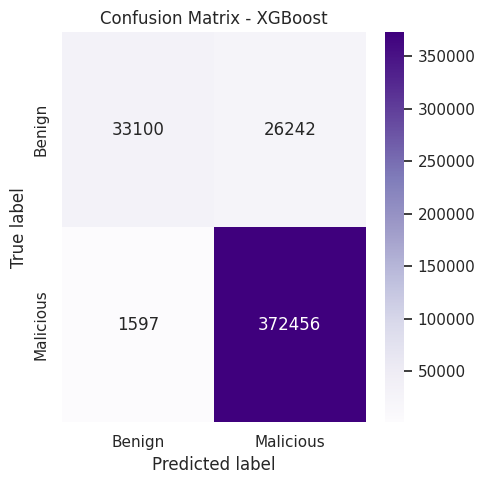


XGBoost ROC AUC: 0.9355
XGBoost average precision: 0.9819


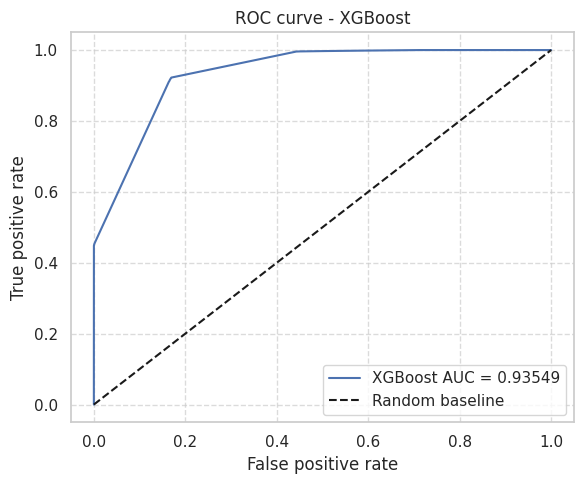

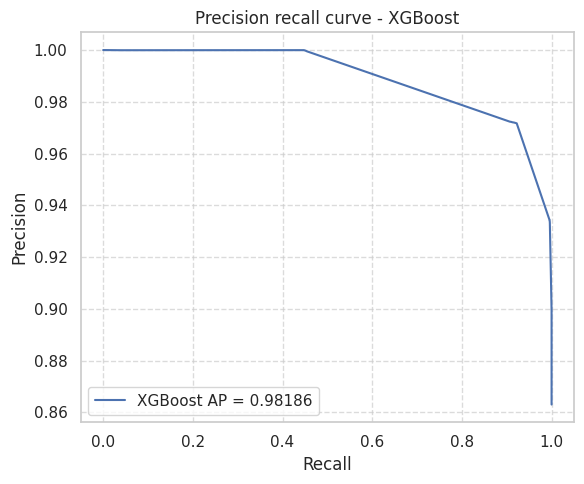

XGB_XGBoost_base Results:
 Accuracy:    0.93577
 Precision:   0.93418
 Recall:      0.99573
 Specificity: 0.55778
 F score:     0.96397
 AUC:         0.93549


In [ ]:
# Feature matrix and binary target for XGBoost model
X = df_cat[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
            'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
            'proto_icmp', 'proto_tcp', 'proto_udp',
            'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
            'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
            'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
            'conn_state_S3', 'conn_state_SF', 'conn_state_SH',
            'conn_state_SHR']]

Y = (df_cat["label"] != 0).astype(int)

# Train test split with stratification
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=Y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("\nTrain class distribution:")
print(Y_train.value_counts(normalize=True))
print("\nTest class distribution:")
print(Y_test.value_counts(normalize=True))

# XGBoost classifier definition
xgb_clf = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    n_jobs=-1,
    random_state=RANDOM_SEED
)

# Training of XGBoost classifier
print("\nTraining XGBoost classifier")
xgb_clf.fit(X_train, Y_train)

# Predictions and probabilities on the test set
Y_pred = xgb_clf.predict(X_test)
Y_proba = xgb_clf.predict_proba(X_test)[:, 1]

print("\nClassification report for XGBoost")
print(classification_report(Y_test, Y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix for XGBoost:")
print(cm)

# Confusion matrix plot
fig, ax = plt.subplots(figsize=(5, 5))
fig.set_facecolor("#ffffff")
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=["Benign", "Malicious"],
    yticklabels=["Benign", "Malicious"],
    ax=ax
)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix - XGBoost")
plt.tight_layout()
plt.show()

# Receiver operating characteristic curve, area under curve, and precision recall area
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
auc = roc_auc_score(Y_test, Y_proba)
prec_vals, rec_vals, _ = precision_recall_curve(Y_test, Y_proba)
pr_auc = average_precision_score(Y_test, Y_proba)

print(f"\nXGBoost ROC AUC: {auc:.4f}")
print(f"XGBoost average precision: {pr_auc:.4f}")

# ROC curve plot
fig, ax = plt.subplots(figsize=(6, 5))
fig.set_facecolor("#ffffff")
ax.plot(fpr, tpr, label=f"XGBoost AUC = {auc:.5f}")
ax.plot([0, 1], [0, 1], "k--", label="Random baseline")
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.set_title("ROC curve - XGBoost")
ax.legend(loc="lower right")
ax.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Precision recall curve plot
fig, ax = plt.subplots(figsize=(6, 5))
fig.set_facecolor("#ffffff")
ax.plot(rec_vals, prec_vals, label=f"XGBoost AP = {pr_auc:.5f}")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision recall curve - XGBoost")
ax.legend(loc="lower left")
ax.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
specificity = specificity_score(Y_test, Y_pred)
fscore = f1_score(Y_test, Y_pred, zero_division=0)

roc_data = (fpr, tpr, thresholds)

name_part = "_XGBoost"
model_version = "_base"
full_name = "XGB" + name_part + model_version

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    fscore,
    roc_data,
    auc
)

MODELS_RESULTS.append(model_result)
RESULTS[full_name] = (accuracy, precision, recall, specificity, fscore)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {fscore:.5f}")
print(f" AUC:         {auc:.5f}")

**Confusion matrix**

- XGBoost **detects almost all attacks**: very few FNs, recall for the malicious class ≈ 0.996.😺
- However, it still labels **about 44% of benign flows as malicious**, so specificity is only ~0.56, similar to Gradient Boosting and AdaBoost.😾
- As with those models, XGBoost behaves like a **high-recall, high-alert system**: excellent for detection, noisier for analysts.

**Classification report and scalar metrics**

- F1 for the **malicious class** is very high, meaning both precision and recall are strong.
- The model is **biased toward catching attacks**. Benign traffic is partially sacrificed, as shown by the low benign recall.
- Overall performance is **very similar** to our Gradient Boosting (light) model, almost identical accuracy, F1, AUC, AP.

**ROC and Precision-Recall curves**

- **ROC AUC ≈ 0.9354**: ROC curve lies far above the diagonal, indicating excellent separability.
- **Average Precision (AP) ≈ 0.9818**: the Precision-Recall curve stays at very high precision for a large range of recall.

- XGBoost ranks malicious flows very well.

**Overall takeaways**

- XGBoost is a **top-performing model** in our scenario:
  - High accuracy and F1,
  - Extremely high recall on attacks,
  - Excellent ROC AUC and PR AUC.😺
- Its main weakness is again **specificity**: many benign flows are flagged.
- Compared to:
  - **Random Forest GS**: RF trades a bit of recall for better specificity (fewer false positives).
  - **Gradient Boosting (light)**: XGBoost’s metrics are nearly identical; XGBoost may offer better training speed and additional control over regularization.

#**Unsupervised Learning**

##Clustering
This section explores the unsupervised structure of the dataset using multiple clustering and visualization techniques.  
Our goal is to determine whether the traffic naturally forms meaningful groups, how well these groups align with known attack categories, and which number of clusters (*k*) provides the most interpretable segmentation.

* We begin by applying **K-means clustering**, evaluating different values of *k* using inertia (elbow method) and silhouette score, and visualizing clusters in PCA space.  
* Next, we use **t-SNE** to project the high-dimensional features into a nonlinear 2D embedding, comparing the structure produced by t-SNE with both true labels and K-means clusters.  

* To assess clustering quality, we compute two validation metrics across multiple values of *k*:  
  - **Homogeneity Score** (supervised), indicating how closely clusters reflect the true attack labels  
  - **Calinski-Harabasz index** (unsupervised), evaluating compactness and separation  

Together, these analyses provide a comprehensive view of how well K-means captures the underlying structure of the IoT-23 traffic.


###K-means clustering
Perform K-means clustering on a sampled subset of df_cat, evaluate different values of k, and visualize cluster structure.


Sampled 20000 rows out of 1444649 total for K-means.
Rows used for clustering: 20000
Numeric features used for K-means: 24
Training K-means with k = 3...
Training K-means with k = 4...
Training K-means with k = 5...
Training K-means with k = 6...


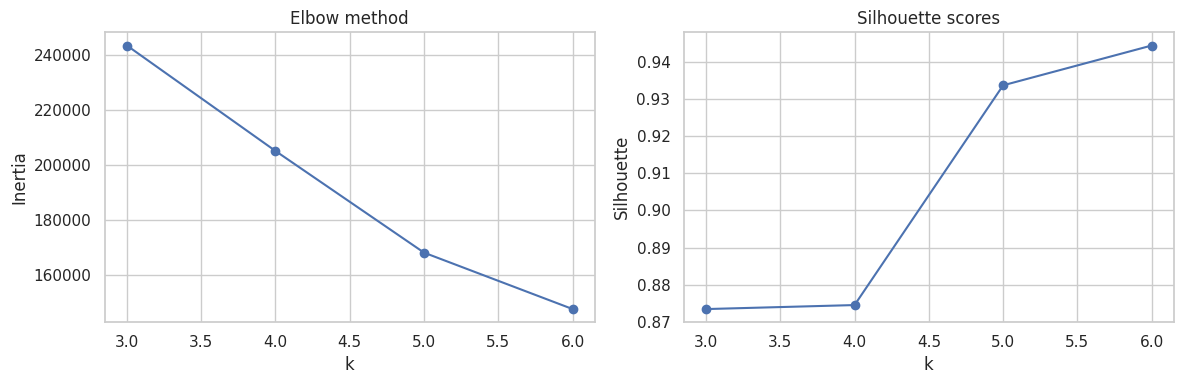

k=3  inertia=2.43e+05  silhouette=0.8734
k=4  inertia=2.05e+05  silhouette=0.8745
k=5  inertia=1.68e+05  silhouette=0.9338
k=6  inertia=1.48e+05  silhouette=0.9445

Selected k: 6

Cluster sizes:
cluster_km
0    17621
1        1
2      741
3       45
4     1591
5        1
Name: count, dtype: int64

Cluster label distribution:
label           0      1    2    4      5      7      8      9
cluster_km                                                    
0           0.112  0.010  0.0  0.0  0.019  0.208  0.647  0.003
1           0.000  0.000  0.0  1.0  0.000  0.000  0.000  0.000
2           1.000  0.000  0.0  0.0  0.000  0.000  0.000  0.000
3           0.289  0.711  0.0  0.0  0.000  0.000  0.000  0.000
4           0.024  0.000  0.0  0.0  0.976  0.000  0.000  0.000
5           1.000  0.000  0.0  0.0  0.000  0.000  0.000  0.000


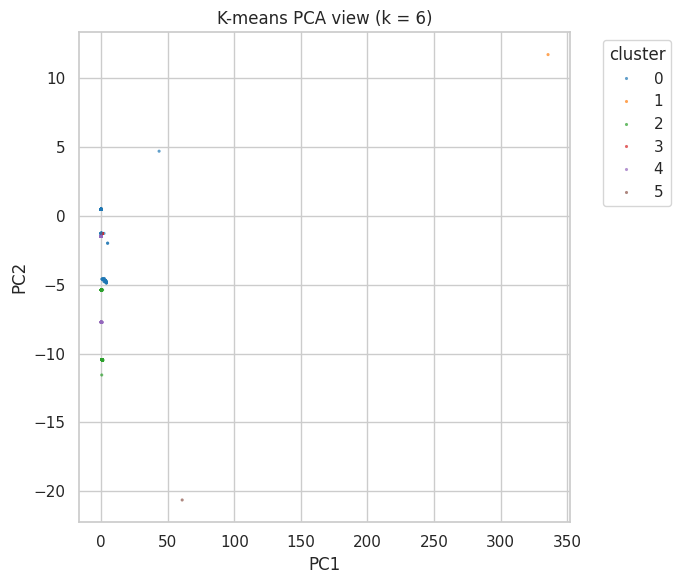

In [ ]:
# Perform K-means clustering on a sampled subset of df_cat
N_MAX = 20_000
df_km = df_cat.copy()
n_rows = df_km.shape[0]

# Sampling
if n_rows > N_MAX:
    df_km = df_km.sample(N_MAX, random_state=RANDOM_SEED)
    print(f"Sampled {N_MAX} rows out of {n_rows} total for K-means.")
else:
    print(f"Using all {n_rows} rows for K-means.")

# Features
y_label = df_km["label"]
X = df_km.drop(columns=["label"])

num_cols = X.select_dtypes(include=["number", "bool"]).columns
X_num = X[num_cols]

print(f"Rows used for clustering: {X_num.shape[0]}")
print(f"Numeric features used for K-means: {X_num.shape[1]}")

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# Try different k
k_list = [3, 4, 5, 6]
inertias, sil_scores = [], []

for k in k_list:
    print(f"Training K-means with k = {k}...")
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=RANDOM_SEED)
    labels_k = km.fit_predict(X_scaled)

    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels_k))

# Plot elbow + silhouette
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax in axes:
    ax.set_facecolor("#ffffff")

axes[0].plot(k_list, inertias, marker="o")
axes[0].set_title("Elbow method")
axes[0].set_xlabel("k")
axes[0].set_ylabel("Inertia")

axes[1].plot(k_list, sil_scores, marker="o")
axes[1].set_title("Silhouette scores")
axes[1].set_xlabel("k")
axes[1].set_ylabel("Silhouette")

plt.tight_layout()
plt.show()

# Print scores
for k, wss, sil in zip(k_list, inertias, sil_scores):
    print(f"k={k}  inertia={wss:.2e}  silhouette={sil:.4f}")

# Best k
best_k = k_list[int(np.argmax(sil_scores))]
print(f"\nSelected k: {best_k}")

# Final model
kmeans_final = KMeans(n_clusters=best_k, n_init=10, max_iter=300, random_state=RANDOM_SEED)
df_km["cluster_km"] = kmeans_final.fit_predict(X_scaled)

print("\nCluster sizes:")
print(df_km["cluster_km"].value_counts().sort_index())

# Label mapping
label_map = {
    0: "Benign",
    1: "C&C or FileDownload",
    2: "C&C HeartBeat",
    3: "C&C Mirai",
    4: "C&C Torii",
    5: "DDoS",
    6: "FileDownload",
    7: "Okiru",
    8: "Horizontal port scan",
    9: "Generic attack"
}

# Crosstab normalized
ctab = pd.crosstab(df_km["cluster_km"], df_km["label"], normalize="index")
print("\nCluster label distribution:")
print(ctab.round(3))

# PCA visualization
pca = PCA(n_components=2, random_state=RANDOM_SEED)
X_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 6))
ax = plt.gca()
ax.set_facecolor("#ffffff")

sns.scatterplot(
    x=X_2d[:, 0], y=X_2d[:, 1],
    hue=df_km["cluster_km"],
    palette="tab10", s=5, linewidth=0, alpha=0.7
)

plt.title(f"K-means PCA view (k = {best_k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


**Model selection**

Inertia decreases steadily as
𝑘
k grows from 3 → 6.

Silhouette improves from ≈0.87 (k=3) to ≈0.94 (k=6), with only small gains after k=5.

The procedure therefore selects k = 6 as the best trade-off between compactness and separation. 😺

**Cluster sizes and label composition**

The cluster-size table shows a very unbalanced partition: a few clusters contain most of the 20,000 points, while others are tiny (down to a single sample). 😾

The normalized crosstab reveals that some clusters are almost pure for a single class (e.g., one cluster dominated by Benign, another by DDoS), whereas others mix several attack families, especially PortScan/Okiru and generic Attack traffic.

**PCA view**

The PCA scatterplot in 2D shows partially separated blobs for some clusters, but with noticeable overlap and elongated shapes.

This confirms that K-means with k = 6 discovers a few meaningful groups (benign vs specific attacks), while still struggling to perfectly disentangle all traffic classes in such a complex, imbalanced dataset.

###t-SNE
Apply t-SNE to obtain a 2D nonlinear embedding of the traffic and compare true labels with K-means clusters.


Rows available for t-SNE: 20000
Number of features used: 24
Using a sample of 15000 points for t-SNE.
Computing t-SNE, this may take some time...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15000 samples in 0.001s...
[t-SNE] Computed neighbors for 15000 samples in 1.960s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15000
[t-SNE] Computed conditional probabilities for sample 2000 / 15000
[t-SNE] Computed conditional probabilities for sample 3000 / 15000
[t-SNE] Computed conditional probabilities for sample 4000 / 15000
[t-SNE] Computed conditional probabilities for sample 5000 / 15000
[t-SNE] Computed conditional probabilities for sample 6000 / 15000
[t-SNE] Computed conditional probabilities for sample 7000 / 15000
[t-SNE] Computed conditional probabilities for sample 8000 / 15000
[t-SNE] Computed conditional probabilities for sample 9000 / 15000
[t-SNE] Computed conditional probabilities for sample 10000 / 15000
[t-SNE] Computed conditional probabiliti

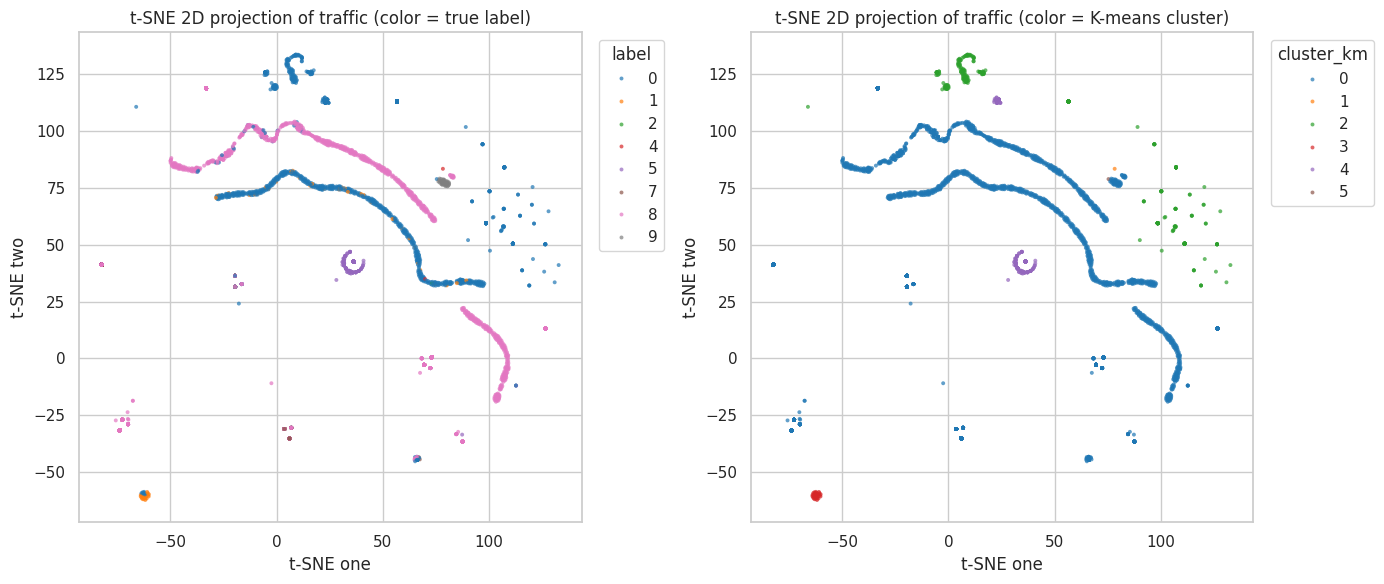

In [ ]:
# t-SNE on sampled df_km to visualize traffic structure

# Select numeric and boolean features, excluding label and K-means cluster assignment
num_cols = df_km.select_dtypes(include=["number", "bool"]).columns
num_cols = [c for c in num_cols if c not in ["label", "cluster_km"]]

X_num = df_km[num_cols].values
y_label = df_km["label"].values
y_cluster = df_km["cluster_km"].values

print(f"Rows available for t-SNE: {X_num.shape[0]}")
print(f"Number of features used: {X_num.shape[1]}")


# Subsample for t-SNE (computationally expensive)
N_TSNE = 15_000
n_rows = X_num.shape[0]

if n_rows > N_TSNE:
    idx_tsne = np.random.choice(n_rows, size=N_TSNE, replace=False)
    X_tsne = X_num[idx_tsne]
    labels_tsne = y_label[idx_tsne]
    clusters_tsne = y_cluster[idx_tsne]
    print(f"Using a sample of {N_TSNE} points for t-SNE.")
else:
    X_tsne = X_num
    labels_tsne = y_label
    clusters_tsne = y_cluster
    print(f"Using all {n_rows} points for t-SNE.")


# Scale features before running t-SNE
scaler_tsne = StandardScaler()
X_tsne_scaled = scaler_tsne.fit_transform(X_tsne)


# Run t-SNE in a 2D embedding space
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate="auto",
    init="pca",
    n_iter=1000,
    metric="euclidean",
    random_state=RANDOM_SEED,
    verbose=1
)

print("Computing t-SNE, this may take some time...")
X_embedded = tsne.fit_transform(X_tsne_scaled)
print("t-SNE completed.")


# Plot t-SNE embedding
# Left: colored by true label
# Right: colored by K-means cluster
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax in axes:
    ax.set_facecolor("#ffffff")

# Left panel: color by true multiclass label
ax = axes[0]
sns.scatterplot(
    x=X_embedded[:, 0],
    y=X_embedded[:, 1],
    hue=labels_tsne,
    palette="tab10",
    s=8,
    linewidth=0,
    alpha=0.7,
    legend="full",
    ax=ax
)
ax.set_title("t-SNE 2D projection of traffic (color = true label)")
ax.set_xlabel("t-SNE one")
ax.set_ylabel("t-SNE two")
ax.legend(title="label", bbox_to_anchor=(1.02, 1), loc="upper left")

# Right panel: color by K-means cluster index
ax = axes[1]
sns.scatterplot(
    x=X_embedded[:, 0],
    y=X_embedded[:, 1],
    hue=clusters_tsne,
    palette="tab10",
    s=8,
    linewidth=0,
    alpha=0.7,
    legend="full",
    ax=ax
)
ax.set_title("t-SNE 2D projection of traffic (color = K-means cluster)")
ax.set_xlabel("t-SNE one")
ax.set_ylabel("t-SNE two")
ax.legend(title="cluster_km", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()



**General pattern**

* In the left plot (color = true label), t-SNE organizes flows into a few curved manifolds and compact islands.

* One long “band” corresponds mostly to a dominant class.

* Smaller blobs represent rarer attack families and benign traffic.

* In the right plot (color = K-means cluster, k = 6), the same geometry is partitioned into a small number of regions:

* One or two clusters follow the main curved band
* Others capture the side islands and scattered points.

**Alignment between labels and clusters**

* Large portions of the main manifolds are monochromatic in both plots, meaning some K-means clusters align reasonably well with specific classes or groups of classes. 😺

* However, several areas show mixed colors: different true labels end up in the same K-means region, especially where classes overlap along the t-SNE curve. 😾

**Overall takeaways**

* t-SNE reveals a rich nonlinear structure in the traffic data; K-means with k = 6 captures the broad shapes but cannot perfectly separate all attack families.

* This confirms that clustering is useful for coarse grouping (macro-regions of traffic) but not sufficient on its own for fine-grained intrusion classification, where supervised models will be needed.

###K-means Elbow Method
In this sub-section we evaluate the optimal number of clusters for K-means using two criteria: the **Homogeneity Score** (supervised) and the **Calinski–Harabasz index** (unsupervised). Both metrics help identify the most meaningful value of *k* based on cluster purity and compactness.

####K-means Elbow Method with Homogeneity Score
Compute Homogeneity Score for several k values to assess how well clusters reflect true attack labels.


Numeric columns used: ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']
Shape of new_df: (1444649, 25)
Using a sample of 100000 rows for the elbow (homogeneity).
Values of k considered: [2, 4, 6, 8, 10]
Elapsed time: 0.354 s (k= 2)  |  homogeneity=0.0001
Elapsed time: 0.479 s (k= 4)  |  homogeneity=0.0002
Elapsed time: 0.683 s (k= 6)  |  homogeneity=0.0133
Elapsed time: 0.877 s (k= 8)  |  homogeneity=0.0133
Elapsed time: 0.991 s (k=10)  |  homogeneity=0.0133

Homogeneity values: [np.float64(8.60333410345398e-05), np.float64(0.00022945024121501397), np.float64(0.013272783215622416), np.float64(0.013305945183143505), np.float64(0.0133379582474

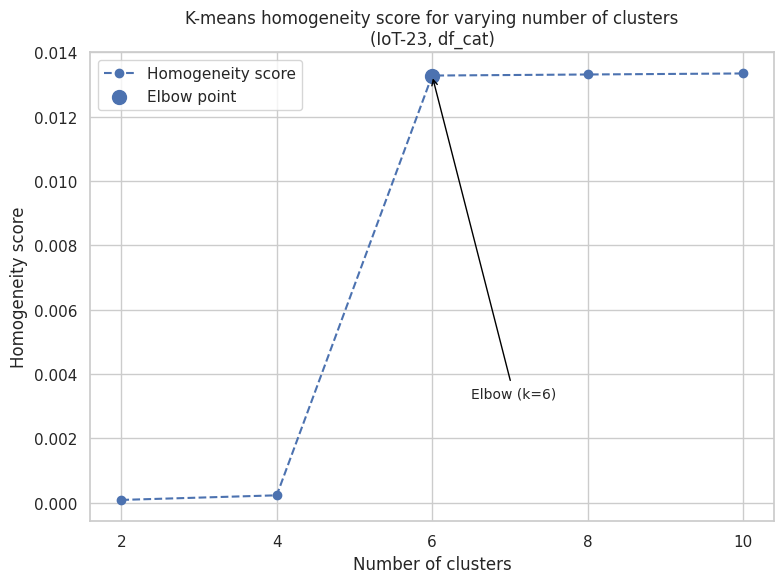

In [ ]:
# DATA PREPARATION (df_cat with labels 0,1,2,...)
# Copy original dataframe
new_df = df_cat.copy()

# Keep only numeric / boolean columns (including 'label')
num_cols = new_df.select_dtypes(include=["number", "bool"]).columns
new_df = new_df[num_cols]

print("Numeric columns used:", list(new_df.columns))
print("Shape of new_df:", new_df.shape)

# True labels (multiclass 0..9)
true_labels = new_df["label"]

# Features for K-means = all columns except label
df_new = new_df.drop(columns=["label"])

# Optional sampling for speed
N_MAX = 100_000
if df_new.shape[0] > N_MAX:
    df_new_sample = df_new.sample(N_MAX, random_state=RANDOM_SEED)
    true_labels_sample = true_labels[df_new_sample.index]
    print(f"Using a sample of {N_MAX} rows for the elbow (homogeneity).")
else:
    df_new_sample = df_new
    true_labels_sample = true_labels
    print(f"Using all {df_new.shape[0]} rows for the elbow (homogeneity).")


# ELBOW METHOD WITH HOMOGENEITY SCORE

# Values of k to test (2, 4, 6, 8, 10)
n_clusters = list(range(2, 11, 2))
print("Values of k considered:", n_clusters)

homogeneity_values = []

# Compute homogeneity for each k
for k in n_clusters:
    t_start = time.time()

    kmeans = KMeans(
        n_clusters=k,
        n_init=10,
        max_iter=300,
        random_state=RANDOM_SEED
    ).fit(df_new_sample)

    score = homogeneity_score(true_labels_sample, kmeans.labels_)
    homogeneity_values.append(score)

    t_stop = time.time()
    print(
        f"Elapsed time: {t_stop - t_start:.3f} s (k={k:2d})  |  "
        f"homogeneity={score:.4f}"
    )


# ESTIMATE ELBOW POINT (maximum discrete gain)
derivatives = np.diff(homogeneity_values)
elbow_index = np.argmax(derivatives)
# derivative i corresponds to transition n_clusters[i] -> n_clusters[i+1]
elbow_point = n_clusters[elbow_index + 1]

print("\nHomogeneity values:", homogeneity_values)
print("Discrete derivatives:", derivatives.tolist())
print(f"Estimated elbow at k = {elbow_point}")


# PLOT HOMOGENEITY CURVE + ELBOW POINT
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor("#ffffff")  # light yellow background

plt.plot(
    n_clusters,
    homogeneity_values,
    marker="o",
    linestyle="--",
    label="Homogeneity score"
)
plt.xticks(n_clusters)

# Highlight elbow point
plt.scatter(
    elbow_point,
    homogeneity_values[elbow_index + 1],
    s=100,
    label="Elbow point"
)

# Annotate elbow with arrow
plt.annotate(
    f"Elbow (k={elbow_point})",
    xy=(elbow_point, homogeneity_values[elbow_index + 1]),
    xytext=(elbow_point + 0.5, homogeneity_values[elbow_index + 1] - 0.01),
    arrowprops=dict(facecolor="black", edgecolor="black", arrowstyle="->"),
    fontsize=10
)

plt.title("K-means homogeneity score for varying number of clusters\n(IoT-23, df_cat)")
plt.xlabel("Number of clusters")
plt.ylabel("Homogeneity score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**General pattern**

* The homogeneity score is extremely low for all k, ranging from 0.0001 to ~0.013.

* The only significant increase occurs between k = 4 → k = 6, which is why the automatic elbow detection selects k = 6.

* After k = 6, improvements flatten completely → homogeneity does not continue to rise.

→ These values indicate that K-means clusters do not match the true labels well, even when increasing the number of clusters. 😾

**Interpretation of the curve**

* Homogeneity ≈ 0 for k = 2 and k = 4 → clusters contain highly mixed labels.

* A small jump at k = 6 (~0.013) indicates slightly better alignment, but the improvement is still minimal.

* k = 8 and k = 10 do not increase purity further, confirming that adding more clusters does not uncover additional structure.

**Overall takeaways**

* Homogeneity reveals that IoT-23 is not naturally partitioned into groups that align with the 10 ground-truth classes.

* Even the best score (k = 6) remains near zero, meaning clusters still contain a mixture of many labels.

* This metric confirms that unsupervised K-means cannot reliably recover attack families, and should not be used as the main criterion for model selection.

Better clustering behavior will emerge using internal metrics (silhouette) or dimensionality reduction (t-SNE), but homogeneity alone shows very weak class recoverability.😺

####K-means Elbow Method with Calinski-Harabasz index
Evaluate the Calinski-Harabasz index across multiple k values to measure cluster compactness and separation.


Numeric columns used: ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']
Shape of new_df: (1444649, 25)
Using a sample of 100000 rows for the Calinski–Harabasz index.
Values of k considered: [2, 4, 6, 8, 10]
Elapsed time: 0.408 seconds (k:  2)  |  CH=23431.05
Elapsed time: 0.945 seconds (k:  4)  |  CH=18578.63
Elapsed time: 1.029 seconds (k:  6)  |  CH=18353.95
Elapsed time: 1.014 seconds (k:  8)  |  CH=18465.23
Elapsed time: 0.796 seconds (k: 10)  |  CH=20465.04

Calinski–Harabasz values: [np.float64(23431.050612816594), np.float64(18578.63027545036), np.float64(18353.952197997245), np.float64(18465.230045416516), np.float64(20465.0429970000

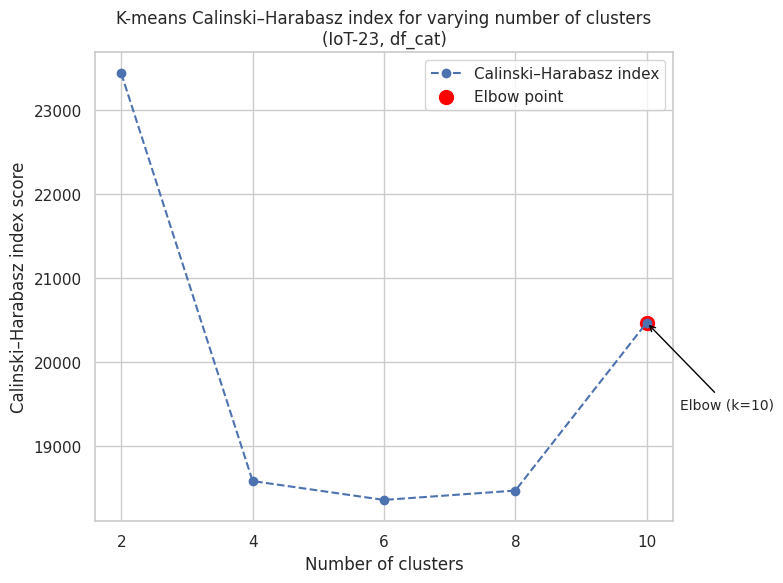

In [ ]:
# DATA PREPARATION (df_cat)

# Copy original dataframe
new_df = df_cat.copy()

# Keep only numeric / boolean columns
num_cols = new_df.select_dtypes(include=["number", "bool"]).columns
new_df = new_df[num_cols]

print("Numeric columns used:", list(new_df.columns))
print("Shape of new_df:", new_df.shape)

# Features for K-means = all columns except 'label' (if present)
if "label" in new_df.columns:
    df_new = new_df.drop(columns=["label"])
else:
    df_new = new_df

# Optional sampling for speed
N_MAX = 100_000
if df_new.shape[0] > N_MAX:
    df_new_sample = df_new.sample(N_MAX, random_state=RANDOM_SEED)
    print(f"Using a sample of {N_MAX} rows for the Calinski–Harabasz index.")
else:
    df_new_sample = df_new
    print(f"Using all {df_new.shape[0]} rows for the Calinski–Harabasz index.")

# Standardization (consistent with other K-means runs)
scaler = StandardScaler()
X_ch = scaler.fit_transform(df_new_sample)


# ELBOW METHOD WITH CALINSKI–HARABASZ INDEX

# Values of k to test (2, 4, 6, 8, 10)
n_clusters = list(range(2, 11, 2))
print("Values of k considered:", n_clusters)

ch_values = []

# Compute CH score for each k
for k in n_clusters:
    t_start = time.time()

    kmeans = KMeans(
        n_clusters=k,
        n_init=10,
        max_iter=300,
        random_state=RANDOM_SEED
    ).fit(X_ch)

    ch_score = calinski_harabasz_score(X_ch, kmeans.labels_)
    ch_values.append(ch_score)

    t_stop = time.time()
    print(
        f"Elapsed time: {t_stop - t_start:.3f} seconds (k: {k:2d})  |  CH={ch_score:.2f}"
    )


# ESTIMATE ELBOW POINT (maximum discrete gain)

derivatives = np.diff(ch_values)
elbow_index = np.argmax(derivatives)
# derivative i corresponds to transition n_clusters[i] -> n_clusters[i+1]
elbow_point = n_clusters[elbow_index + 1]

print("\nCalinski–Harabasz values:", ch_values)
print("Discrete derivatives:", derivatives.tolist())
print(f"Estimated elbow at k = {elbow_point}")


# PLOT CALINSKI–HARABASZ CURVE + ELBOW POINT

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor("#ffffff")   # light yellow background

plt.plot(
    n_clusters,
    ch_values,
    marker="o",
    linestyle="--",
    label="Calinski–Harabasz index"
)
plt.xticks(n_clusters)

# Highlight elbow point
plt.scatter(
    elbow_point,
    ch_values[elbow_index + 1],
    color="red",
    s=100,
    label="Elbow point"
)

# Annotate elbow with arrow
plt.annotate(
    f"Elbow (k={elbow_point})",
    xy=(elbow_point, ch_values[elbow_index + 1]),
    xytext=(
        elbow_point + 0.5,
        ch_values[elbow_index + 1] - 0.05 * ch_values[elbow_index + 1]
    ),
    arrowprops=dict(facecolor="black", edgecolor="black", arrowstyle="->"),
    fontsize=10
)

plt.title(
    "K-means Calinski–Harabasz index for varying number of clusters\n(IoT-23, df_cat)"
)
plt.xlabel("Number of clusters")
plt.ylabel("Calinski–Harabasz index score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**General pattern**

* The CH scores show no clear elbow shape: values drop sharply from k=2 to k=4 and remain nearly flat until k=8.

* The discrete derivative identifies k = 10 as the elbow, but this is an artifact—CH rises again simply because more clusters reduce within-cluster variance.

**Interpretation of the curve**

* k = 2 gives the highest compactness (CH ≈ 23431), because the dataset is extremely imbalanced and the two largest groups dominate the score.

* From k = 4 → 8, CH remains almost unchanged, indicating no meaningful improvement in structure.

* The final rise at k = 10 reflects fragmentation, not true cluster discovery. 😾

**Overall takeaways**
* The Calinski-Harabasz index does not reveal a meaningful elbow, confirming that the dataset lacks clear, well-separated cluster structure.

* The apparent elbow at k = 10 is misleading—the score increases simply because more clusters artificially improve compactness. 😾

* CH suggests that K-means is not capturing natural groupings in the IoT-23 dataset, but rather optimizing compactness without discovering true underlying structure.

→ As a result, CH should not be used as the main criterion for selecting k on this dataset; internal metrics like silhouette or visual methods provide more reliable guidance.

### K-Means Iterative Behavior (Feature Space & t-SNE Space)
This section illustrates how K-means centroids move and converge during Lloyd’s algorithm.  
We examine the iterative behavior of K-means in two different spaces:

1. **Feature space using two numeric variables** (`orig_bytes` and `resp_bytes`),  
2. **Nonlinear t-SNE space derived from the full numeric feature set**.

For both cases, we run K-means with **k = 4** and visualize the results after:
- **1 iteration** (random/initial centroid placement),
- **3 iterations** (early adaptation),
- **300 iterations** (converged solution).

These visualizations highlight how centroid positions evolve, how cluster assignments stabilize, and how well K-means can approximate structures in linear vs nonlinear embeddings.



####K-Means Iterations on Two Features
Demonstrate how K-means centroids move over iterations using two traffic-volume features.


Shape of data for K-means iterations: (10000, 2)
Selected columns: ['orig_bytes', 'resp_bytes']


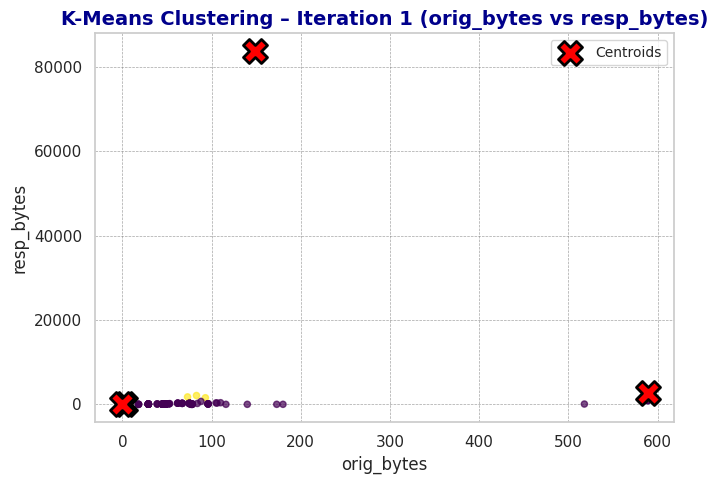

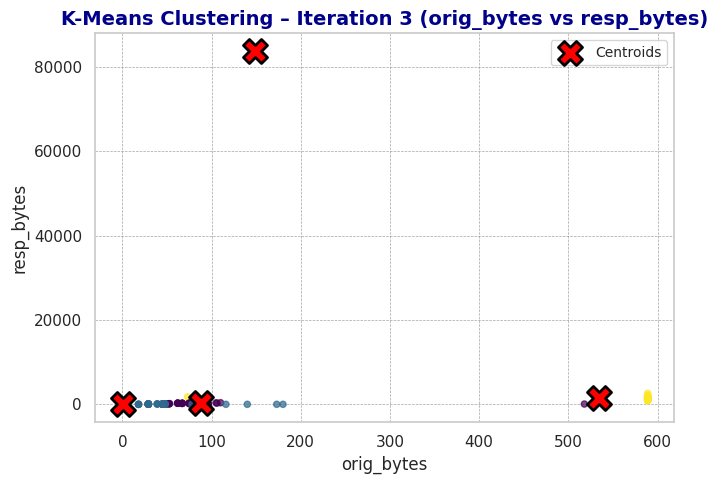

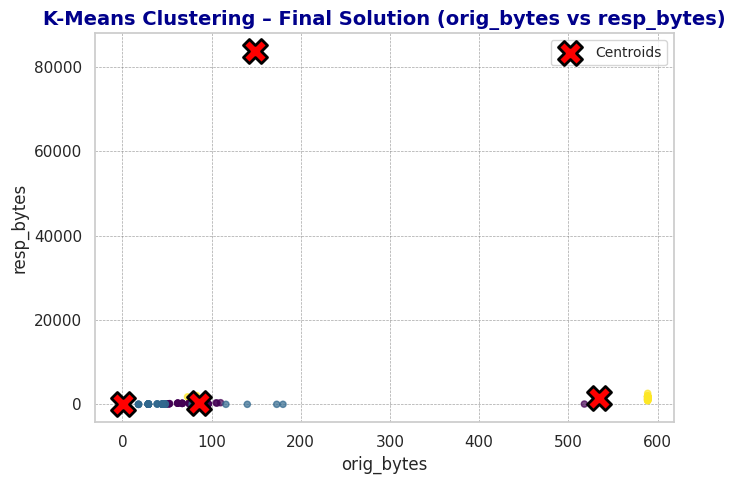

In [ ]:
# CREATE A 2D SUBSET FROM df_cat

# Sample subset for visualization
N_KMEANS_ITER = 10_000
df_iter = df_cat.sample(N_KMEANS_ITER, random_state=RANDOM_SEED).copy()

# Use two meaningful numerical features
X = df_iter[['orig_bytes', 'resp_bytes']]

print("Shape of data for K-means iterations:", X.shape)
print("Selected columns:", X.columns.tolist())

# DEFINE K-MEANS MODELS WITH LIMITED ITERATIONS
kmeans_iter1 = KMeans(
    n_clusters=4,
    init="random",
    n_init=1,
    algorithm="lloyd",
    max_iter=1,
    random_state=RANDOM_SEED
)

kmeans_iter3 = KMeans(
    n_clusters=4,
    init="random",
    n_init=1,
    algorithm="lloyd",
    max_iter=3,
    random_state=RANDOM_SEED
)

kmeans_final = KMeans(
    n_clusters=4,
    init="random",
    n_init=1,
    algorithm="lloyd",
    max_iter=300,
    random_state=RANDOM_SEED
)

# Fit models
kmeans_iter1.fit(X)
kmeans_iter3.fit(X)
kmeans_final.fit(X)


# PLOTTING FUNCTION

def plot_clusters_kmeans(X, centroids, labels, title):
    plt.figure(figsize=(7, 5))
    ax = plt.gca()
    ax.set_facecolor("#ffffff")  # light yellow background

    feature_1 = X.columns[0]
    feature_2 = X.columns[1]

    # Data points
    plt.scatter(
        X.iloc[:, 0].values,
        X.iloc[:, 1].values,
        c=labels,
        cmap="viridis",
        s=20,
        alpha=0.7
    )

    # Centroids
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        c="red",
        s=300,
        marker="X",
        edgecolor="black",
        linewidth=2,
        label="Centroids"
    )

    plt.title(title, fontsize=14, fontweight="bold", color="darkblue")
    plt.xlabel(feature_1, fontsize=12)
    plt.ylabel(feature_2, fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(loc="best", fontsize=10)
    plt.tight_layout()
    plt.show()


# PLOTS: ITERATION 1, ITERATION 3, FINAL SOLUTION

plot_clusters_kmeans(
    X,
    kmeans_iter1.cluster_centers_,
    kmeans_iter1.labels_,
    "K-Means Clustering – Iteration 1 (orig_bytes vs resp_bytes)"
)

plot_clusters_kmeans(
    X,
    kmeans_iter3.cluster_centers_,
    kmeans_iter3.labels_,
    "K-Means Clustering – Iteration 3 (orig_bytes vs resp_bytes)"
)

plot_clusters_kmeans(
    X,
    kmeans_final.cluster_centers_,
    kmeans_final.labels_,
    "K-Means Clustering – Final Solution (orig_bytes vs resp_bytes)"
)


**General pattern**

* The three plots show how K-means progressively adjusts its centroids when running for 1 iteration, 3 iterations, and 300 iterations.

* Initial centroid positions are random and poorly aligned with the data.

* With more iterations, centroids move toward dense regions, stabilizing into meaningful cluster centers. 😺

**Iteration 1**

* Centroids remain close to their random initialization.

* Cluster assignments are unstable, and multiple centroids fall in sparse or irrelevant areas of the space.

-> The resulting clusters are highly fragmented. 😾

**Iteration 3**

* Centroids begin shifting toward high-density regions:

  * One centroid near small-byte flows,

  * Another near large-byte responses,

  * Others adjusting to mid-volume traffic.

* Clusters start to form coherent groups, although boundaries remain approximate.

**Final solution (300 iterations)**

* Centroids fully stabilize and represent four clear traffic-volume categories:

  * Near-zero flows,

  * Low-volume flows,

  * Medium flows,

  * High-volume flows.

-> Cluster boundaries become smooth and consistent, illustrating the convergence of Lloyd’s algorithm. 😺

**Overall takeaways**

* K-means converges through repeated cycles of
reassign points → update centroids → repeat until stable.

* Even using only two features, the method discovers meaningful volume-based groups, but early iterations are unreliable.

* The final clustering reflects clear traffic behavior patterns, confirming why sufficient iterations are essential for K-means to work properly.

####t-SNE 2D + K-Means Iterations

Visualize how K-means adjusts centroids in the 2D t-SNE manifold across different iterations.



Shape of data used for t-SNE: (15000, 24)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15000 samples in 0.001s...
[t-SNE] Computed neighbors for 15000 samples in 1.328s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15000
[t-SNE] Computed conditional probabilities for sample 2000 / 15000
[t-SNE] Computed conditional probabilities for sample 3000 / 15000
[t-SNE] Computed conditional probabilities for sample 4000 / 15000
[t-SNE] Computed conditional probabilities for sample 5000 / 15000
[t-SNE] Computed conditional probabilities for sample 6000 / 15000
[t-SNE] Computed conditional probabilities for sample 7000 / 15000
[t-SNE] Computed conditional probabilities for sample 8000 / 15000
[t-SNE] Computed conditional probabilities for sample 9000 / 15000
[t-SNE] Computed conditional probabilities for sample 10000 / 15000
[t-SNE] Computed conditional probabilities for sample 11000 / 15000
[t-SNE] Computed conditional probabilities for sample 12000 / 15000
[t-SNE] 

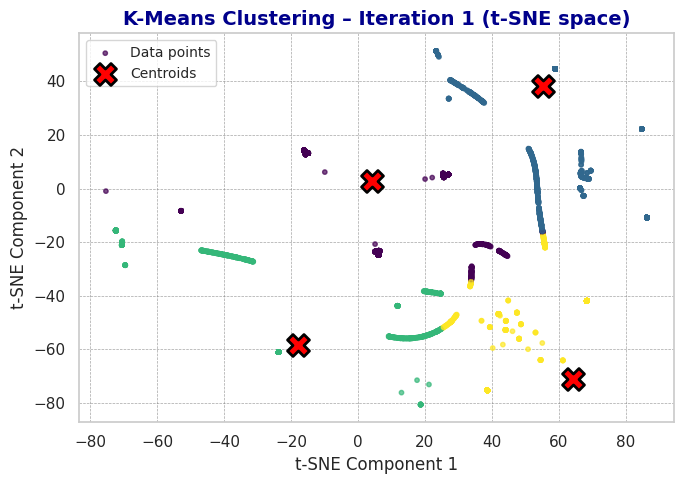

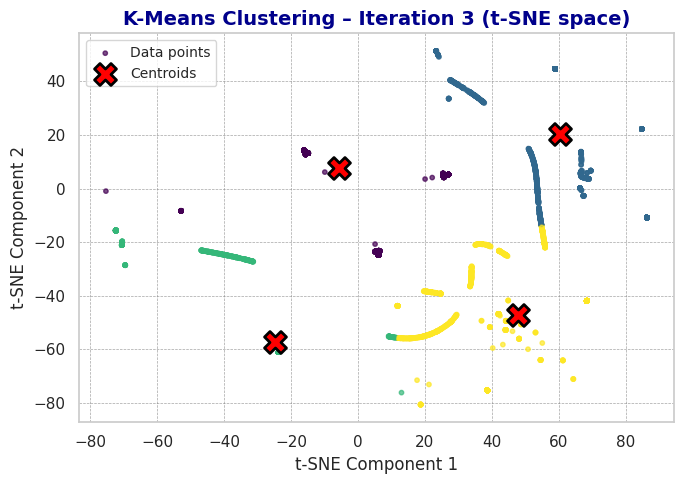

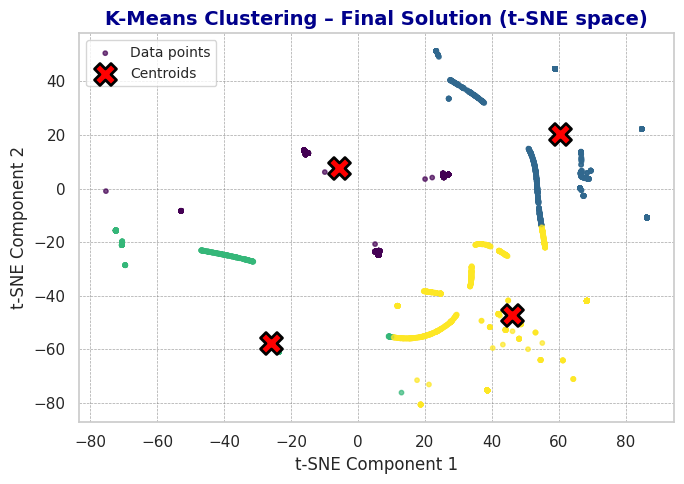

In [ ]:
# t-SNE 2D ON A SAMPLE OF df_cat

# Select only numeric / boolean columns (including label)
num_cols = df_cat.select_dtypes(include=["number", "bool"]).columns
df_num = df_cat[num_cols].copy()

# Drop label column from features (if present)
if "label" in df_num.columns:
    df_features_tsne = df_num.drop(columns=["label"])
else:
    df_features_tsne = df_num

# Sampling for t-SNE (computationally expensive)
N_TSNE_ITER = 15_000
if df_features_tsne.shape[0] > N_TSNE_ITER:
    df_tsne_sample = df_features_tsne.sample(N_TSNE_ITER, random_state=RANDOM_SEED)
else:
    df_tsne_sample = df_features_tsne

print("Shape of data used for t-SNE:", df_tsne_sample.shape)

# Scaling before t-SNE
scaler_tsne = StandardScaler()
X_scaled_tsne = scaler_tsne.fit_transform(df_tsne_sample)

# t-SNE 2D
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate="auto",
    init="pca",
    n_iter=1000,
    random_state=RANDOM_SEED,
    verbose=1
)

X_tsne = tsne.fit_transform(X_scaled_tsne)
print("Shape of t-SNE transformed data:", X_tsne.shape)


# K-MEANS ON X_tsne WITH DIFFERENT NUMBERS OF ITERATIONS

kmeans_tsne_iter1 = KMeans(
    n_clusters=4,
    init="random",
    n_init=1,
    algorithm="lloyd",
    max_iter=1,
    random_state=RANDOM_SEED
)

kmeans_tsne_iter3 = KMeans(
    n_clusters=4,
    init="random",
    n_init=1,
    algorithm="lloyd",
    max_iter=3,
    random_state=RANDOM_SEED
)

kmeans_tsne_final = KMeans(
    n_clusters=4,
    init="random",
    n_init=1,
    algorithm="lloyd",
    max_iter=300,
    random_state=RANDOM_SEED
)

labels_tsne_iter1 = kmeans_tsne_iter1.fit_predict(X_tsne)
labels_tsne_iter3 = kmeans_tsne_iter3.fit_predict(X_tsne)
labels_tsne_final = kmeans_tsne_final.fit_predict(X_tsne)


# PLOTTING FUNCTION IN t-SNE SPACE

def plot_tsne_clusters(X_2d, labels, centroids, title):
    plt.figure(figsize=(7, 5))
    ax = plt.gca()
    ax.set_facecolor("#ffffff")  # light yellow background

    # Data points
    plt.scatter(
        X_2d[:, 0],
        X_2d[:, 1],
        c=labels,
        cmap="viridis",
        s=10,
        alpha=0.7,
        label="Data points"
    )

    # Centroids
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        c="red",
        s=250,
        marker="X",
        edgecolor="black",
        linewidth=2,
        label="Centroids"
    )

    plt.title(title, fontsize=14, fontweight="bold", color="darkblue")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.legend(loc="best", fontsize=10)
    plt.tight_layout()
    plt.show()


# PLOTS FOR THE THREE STAGES

plot_tsne_clusters(
    X_tsne,
    labels_tsne_iter1,
    kmeans_tsne_iter1.cluster_centers_,
    "K-Means Clustering – Iteration 1 (t-SNE space)"
)

plot_tsne_clusters(
    X_tsne,
    labels_tsne_iter3,
    kmeans_tsne_iter3.cluster_centers_,
    "K-Means Clustering – Iteration 3 (t-SNE space)"
)

plot_tsne_clusters(
    X_tsne,
    labels_tsne_final,
    kmeans_tsne_final.cluster_centers_,
    "K-Means Clustering – Final Solution (t-SNE space)"
)

**General pattern**

* t-SNE arranges the traffic into nonlinear curved shapes and compact clusters, revealing structure that is not visible in the raw feature space.

* K-means initially places centroids far from meaningful regions, but they progressively move toward the high-density areas uncovered by t-SNE. 😺

* After enough iterations, clusters follow the t-SNE manifold more closely.

**Iteration 1**

* Centroids remain close to random initialization.

* Several centroids fall between curved t-SNE structures rather than inside them.

-> Cluster assignments are highly fragmented and do not correspond to the visual shapes. 😾

**Iteration 3**

* Centroids begin migrating into denser regions of the t-SNE embedding.

* The first signs of structure appear: long curves and small islands start becoming more homogeneously colored.

* K-means begins approximating the t-SNE manifold.

**Final solution (300 iterations)**

* Centroids converge into positions that are central to the curved bands and isolated pockets.

* Clusters form coherent regions along t-SNE structures, with much clearer separation than in early iterations. 😺

* Although alignment improves, some regions remain mixed, reflecting the complexity of the dataset.

**Overall takeaways**

* t-SNE reveals nonlinear geometric structure that K-means can only approximate after many iterations.

* Early iterations illustrate how K-means reassigns points → updates centroids until stabilizing.

* Even in t-SNE space, K-means gives only coarse segmentation rather than precise attack-family separation.

* This visualization is useful for intuition, not as a clustering metric: t-SNE distorts global distances.

### Hierarchical Clustering: model selection and dendrogram

This section applies Agglomerative (hierarchical) clustering to a scaled subset of the dataset and evaluates cluster quality across different numbers of clusters.  
We explore three validation metrics:

- **Homogeneity Score** (supervised): evaluates alignment between clusters and true attack labels.  
- **Calinski–Harabasz Index** (internal): measures cluster separation and compactness.  
- **Silhouette Score** (internal): assesses cohesion vs separation.

Finally, we visualize the merging process using a **Ward dendrogram** on a smaller subsample to inspect the hierarchical structure of the data.



#### Data preparation
Prepare and scale the dataset for hierarchical clustering.



In [ ]:
# 0. SAMPLING AND PREPARATION (df_cat → df_hier)

MAX_SAMPLES_HIER = 5_000  # hierarchical clustering is O(n^2)

if df_cat.shape[0] > MAX_SAMPLES_HIER:
    df_hier = df_cat.sample(MAX_SAMPLES_HIER, random_state=RANDOM_SEED).copy()
else:
    df_hier = df_cat.copy()

print(f"Total rows in df_cat: {df_cat.shape[0]}")
print(f"Rows used for Hierarchical clustering: {df_hier.shape[0]}")

# True labels for supervised metrics
y_true = df_hier["label"].values

# Keep only numeric / boolean columns
num_cols = df_hier.select_dtypes(include=["number", "bool"]).columns.tolist()
print("\nNumeric columns used:", num_cols)

# Remove label from feature set
if "label" in num_cols:
    num_cols.remove("label")

X_num = df_hier[num_cols]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

print("Shape X_scaled:", X_scaled.shape)

# Values of k to test
n_clusters_list = list(range(2, 11))
print("\nValues of k considered:", n_clusters_list)

sns.set(style="whitegrid")


Total rows in df_cat: 1444649
Rows used for Hierarchical clustering: 5000

Numeric columns used: ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']
Shape X_scaled: (5000, 24)

Values of k considered: [2, 3, 4, 5, 6, 7, 8, 9, 10]


####Homogeneity Score + Calinski–Harabasz Index


Compute homogeneity score across multiple k values to evaluate cluster-label consistency.



=== Hierarchical clustering: Homogeneity Score ===
Elapsed time: 0.6351s (k= 2) | homogeneity=0.0161
Elapsed time: 0.6380s (k= 3) | homogeneity=0.0822
Elapsed time: 0.6237s (k= 4) | homogeneity=0.2495
Elapsed time: 0.6365s (k= 5) | homogeneity=0.2598
Elapsed time: 0.6580s (k= 6) | homogeneity=0.2648
Elapsed time: 0.6590s (k= 7) | homogeneity=0.2661
Elapsed time: 0.6411s (k= 8) | homogeneity=0.2661
Elapsed time: 0.6298s (k= 9) | homogeneity=0.2738
Elapsed time: 0.6496s (k=10) | homogeneity=0.3131

Homogeneity values: [0.0160855  0.08217973 0.2495112  0.25978227 0.26484669 0.26609719
 0.26609719 0.27382299 0.31307494]
Discrete derivatives: [ 6.60942320e-02  1.67331466e-01  1.02710769e-02  5.06441776e-03
  1.25049302e-03 -5.55111512e-17  7.72580376e-03  3.92519501e-02]
Estimated elbow (Homogeneity) = k 3


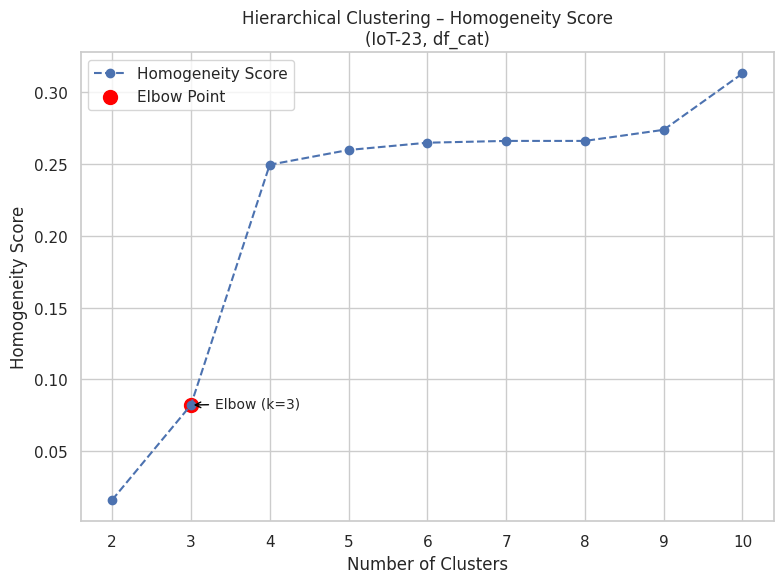

In [ ]:
# 1. ELBOW WITH HOMOGENEITY SCORE (SUPERVISED)

homogeneity_values = []

print("\n=== Hierarchical clustering: Homogeneity Score ===")
for k in n_clusters_list:
    t_start = time.time()

    hier = AgglomerativeClustering(n_clusters=k).fit(X_scaled)
    score_h = homogeneity_score(y_true, hier.labels_)
    homogeneity_values.append(score_h)

    t_stop = time.time()
    print(f"Elapsed time: {t_stop - t_start:6.4f}s (k={k:2d}) | homogeneity={score_h:.4f}")

homogeneity_values = np.array(homogeneity_values)

# Discrete derivative for elbow
derivatives_h = np.diff(homogeneity_values)
elbow_index_h = np.argmax(derivatives_h)
elbow_k_h = n_clusters_list[elbow_index_h]

print("\nHomogeneity values:", homogeneity_values)
print("Discrete derivatives:", derivatives_h)
print(f"Estimated elbow (Homogeneity) = k {elbow_k_h}")

# Plot
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor("#ffffff")

plt.plot(n_clusters_list, homogeneity_values, marker="o", linestyle="--",
         label="Homogeneity Score")
plt.xticks(n_clusters_list)

plt.scatter(elbow_k_h, homogeneity_values[elbow_index_h], color="red", s=100,
            label="Elbow Point")

plt.annotate(
    f"Elbow (k={elbow_k_h})",
    xy=(elbow_k_h, homogeneity_values[elbow_index_h]),
    xytext=(elbow_k_h + 0.3, homogeneity_values[elbow_index_h] - 0.002),
    arrowprops=dict(facecolor="black", edgecolor="black", arrowstyle="->"),
    fontsize=10
)

plt.title("Hierarchical Clustering – Homogeneity Score\n(IoT-23, df_cat)")
plt.xlabel("Number of Clusters")
plt.ylabel("Homogeneity Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Evaluate Calinski–Harabasz index across multiple k values to measure cluster compactness and separation.



=== Hierarchical clustering: Calinski–Harabasz Index ===
Elapsed time: 0.6520s (k= 2) | CH=1766.02
Elapsed time: 0.6305s (k= 3) | CH=1594.99
Elapsed time: 0.6239s (k= 4) | CH=1690.98
Elapsed time: 0.8202s (k= 5) | CH=1763.43
Elapsed time: 1.0374s (k= 6) | CH=1821.15
Elapsed time: 0.8773s (k= 7) | CH=1991.69
Elapsed time: 0.6174s (k= 8) | CH=2316.85
Elapsed time: 0.6224s (k= 9) | CH=2916.85
Elapsed time: 0.6395s (k=10) | CH=3633.57

Calinski–Harabasz values: [1766.02444933 1594.99060411 1690.98358517 1763.43112854 1821.15264295
 1991.69067419 2316.85328868 2916.84932543 3633.56948136]
Discrete derivatives: [-171.03384522   95.99298105   72.44754337   57.72151441  170.53803124
  325.16261449  599.99603675  716.72015593]
Estimated elbow (CH) = k 10


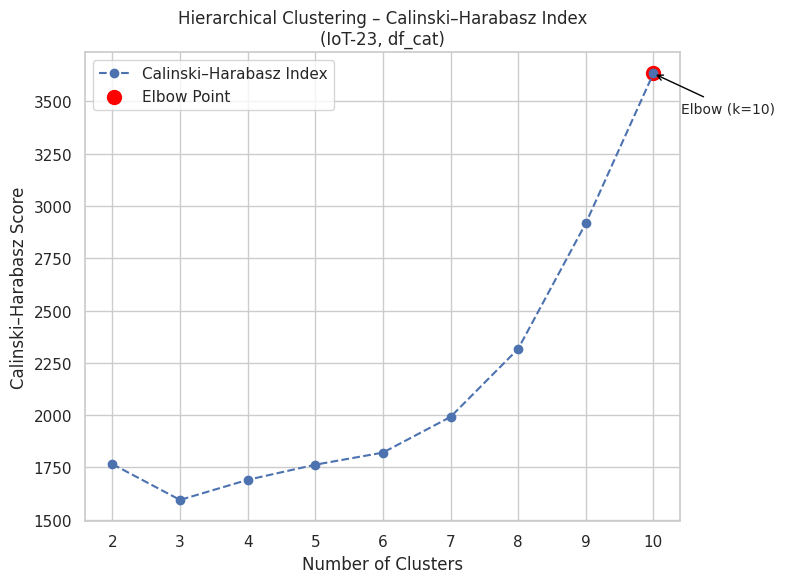

In [ ]:
# 2. ELBOW WITH CALINSKI–HARABASZ INDEX (UNSUPERVISED)

ch_values = []

print("\n=== Hierarchical clustering: Calinski–Harabasz Index ===")
for k in n_clusters_list:
    t_start = time.time()

    hier = AgglomerativeClustering(n_clusters=k).fit(X_scaled)
    score_ch = calinski_harabasz_score(X_scaled, hier.labels_)
    ch_values.append(score_ch)

    t_stop = time.time()
    print(f"Elapsed time: {t_stop - t_start:6.4f}s (k={k:2d}) | CH={score_ch:.2f}")

ch_values = np.array(ch_values)

# Discrete derivative for elbow
derivatives_ch = np.diff(ch_values)
elbow_index_ch = np.argmax(derivatives_ch) + 1
elbow_k_ch = n_clusters_list[elbow_index_ch]

print("\nCalinski–Harabasz values:", ch_values)
print("Discrete derivatives:", derivatives_ch)
print(f"Estimated elbow (CH) = k {elbow_k_ch}")

# Plot
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor("#ffffff")

plt.plot(n_clusters_list, ch_values, marker="o", linestyle="--",
         label="Calinski–Harabasz Index")
plt.xticks(n_clusters_list)

plt.scatter(elbow_k_ch, ch_values[elbow_index_ch], color="red", s=100,
            label="Elbow Point")

plt.annotate(
       f"Elbow (k={elbow_k_ch})",
    xy=(elbow_k_ch, ch_values[elbow_index_ch]),
    xytext=(20, -20),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=10,
    ha="left",
    va="top"
)

plt.title("Hierarchical Clustering – Calinski–Harabasz Index\n(IoT-23, df_cat)")
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski–Harabasz Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


####Silhouette Score
Compute silhouette score for multiple k to identify the most stable 2-cluster or multi-cluster structure.



=== Hierarchical clustering: Silhouette Score ===
Elapsed time: 0.9686s (k= 2) | silhouette=0.9288
Elapsed time: 0.9550s (k= 3) | silhouette=0.7767
Elapsed time: 0.9539s (k= 4) | silhouette=0.8051
Elapsed time: 0.9560s (k= 5) | silhouette=0.8058
Elapsed time: 0.9874s (k= 6) | silhouette=0.8042
Elapsed time: 0.9903s (k= 7) | silhouette=0.8018
Elapsed time: 0.9747s (k= 8) | silhouette=0.8034
Elapsed time: 0.9931s (k= 9) | silhouette=0.7997
Elapsed time: 1.4810s (k=10) | silhouette=0.7945

Silhouette values: [0.92884029 0.77668495 0.80505961 0.80583771 0.80418558 0.80180213
 0.80343932 0.7996841  0.79448813]
Best k (maximum silhouette) = 2


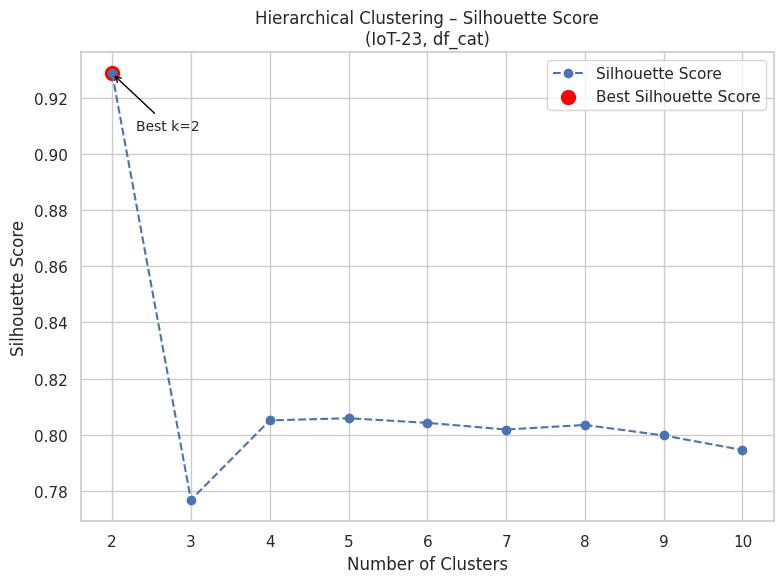

In [ ]:
# 3. SILHOUETTE SCORE (UNSUPERVISED)

silhouette_values = []

print("\n=== Hierarchical clustering: Silhouette Score ===")
for k in n_clusters_list:
    t_start = time.time()

    hier = AgglomerativeClustering(n_clusters=k).fit(X_scaled)
    score_s = silhouette_score(X_scaled, hier.labels_)
    silhouette_values.append(score_s)

    t_stop = time.time()
    print(f"Elapsed time: {t_stop - t_start:6.4f}s (k={k:2d}) | silhouette={score_s:.4f}")

silhouette_values = np.array(silhouette_values)

# Best k = max silhouette
best_index_s = np.argmax(silhouette_values)
best_k_s = n_clusters_list[best_index_s]

print("\nSilhouette values:", silhouette_values)
print(f"Best k (maximum silhouette) = {best_k_s}")

# Plot
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor("#ffffff")

plt.plot(n_clusters_list, silhouette_values, marker="o", linestyle="--",
         label="Silhouette Score")
plt.xticks(n_clusters_list)

plt.scatter(best_k_s, silhouette_values[best_index_s], color="red", s=100,
            label="Best Silhouette Score")

plt.annotate(
    f"Best k={best_k_s}",
    xy=(best_k_s, silhouette_values[best_index_s]),
    xytext=(best_k_s + 0.3, silhouette_values[best_index_s] - 0.02),
    arrowprops=dict(facecolor="black", edgecolor="black", arrowstyle="->"),
    fontsize=10
)

plt.title("Hierarchical Clustering – Silhouette Score\n(IoT-23, df_cat)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


####Ward Dendogram
The dendrogram provides a **visual representation of how clusters merge**, helping us understand the global hierarchical structure before choosing a distance cut.



Computing linkage matrix for dendrogram (Ward method)...
Using a subsample of 500 points (5000 total).


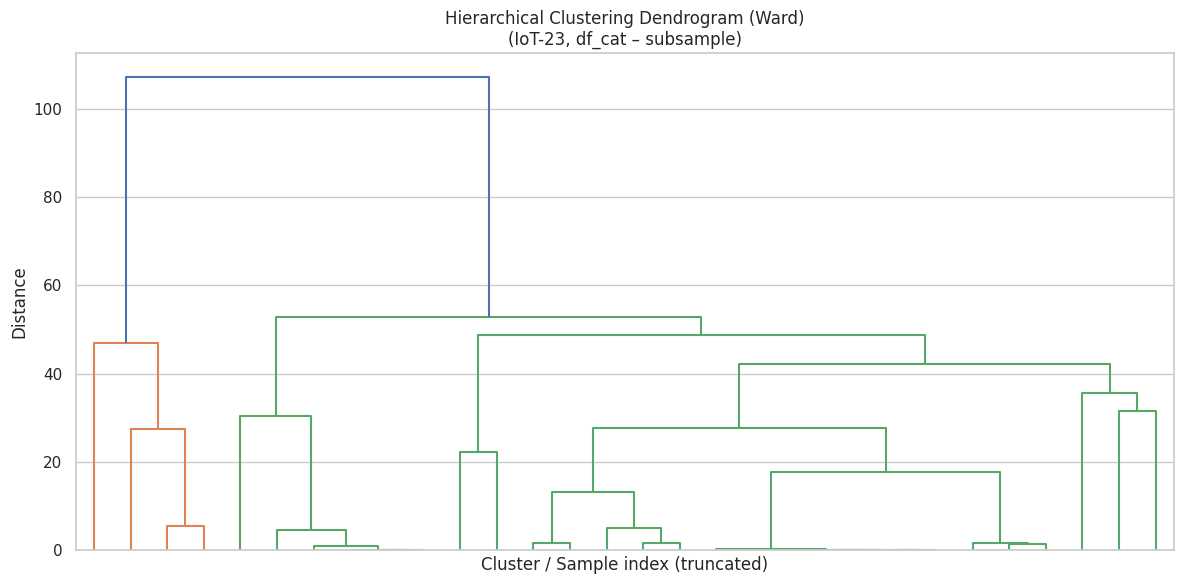

In [ ]:
# 4. DENDROGRAM (WARD) ON A SMALL SUBSAMPLE

print("\nComputing linkage matrix for dendrogram (Ward method)...")

MAX_SAMPLES_DENDRO = 500

n_points = X_scaled.shape[0]
if n_points > MAX_SAMPLES_DENDRO:
    rng = np.random.RandomState(RANDOM_SEED)
    idx_dendro = rng.choice(n_points, size=MAX_SAMPLES_DENDRO, replace=False)
    X_dendro = X_scaled[idx_dendro]
    print(f"Using a subsample of {MAX_SAMPLES_DENDRO} points ({n_points} total).")
else:
    X_dendro = X_scaled
    print(f"Using all {n_points} points for the dendrogram.")

# Ward linkage
linkage_matrix = linkage(X_dendro, method="ward")

plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_facecolor("#ffffff")

dendrogram(
    linkage_matrix,
    no_labels=True,
    truncate_mode="lastp",
    p=30
)

plt.title("Hierarchical Clustering Dendrogram (Ward)\n(IoT-23, df_cat – subsample)")
plt.xlabel("Cluster / Sample index (truncated)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


The homogeneity score shows a strong initial jump from k=2 to k=3 but remains relatively low overall (max ≈0.32), indicating that hierarchical clusters do not reconstruct the 10 attack families well. The largest gain occurs at k=2, suggesting that the most meaningful split with respect to the labels is a 2-cluster partition. 😾

The Calinski–Harabasz index increases almost monotonically from k=2 to k=10, offering no clear elbow. This indicates that the method simply produces more compact clusters as k grows, without revealing a natural multi-cluster structure. 😾

The silhouette score peaks sharply at **k=2** (~0.94) and decreases for k≥3, remaining stable but lower.  
This strongly suggests that hierarchical clustering primarily identifies **two major traffic groups**, likely corresponding to coarse categories such as benign vs malicious flows. 😺

The Ward dendrogram visually confirms this: two large branches merge only at high linkage distance, while any finer subdivisions appear unstable and less meaningful.

**Overall takeaways**  
Hierarchical clustering consistently detects a **2-cluster structure** as the most robust and separable configuration.  
It is *not* suitable for recovering the 10 detailed attack classes of IoT-23; more granular segmentation should rely on K-means (k≈4–6) or supervised models.


###Density-based Clustering

This block prepares the data for DBSCAN (Density-Based Spatial Clustering of Applications with Noise), an unsupervised clustering algorithm that finds dense regions in the feature space and labels low-density points as noise (outliers).

In [ ]:

print("Total rows in df_cat:", len(df_cat))

# Select numeric feature columns, excluding the label
numeric_cols = df_cat.select_dtypes(
    include=["int64", "float64", "uint8", "bool"]
).columns.tolist()
if "label" in numeric_cols:
    numeric_cols.remove("label")

print("Number of numeric features used for DBSCAN:", len(numeric_cols))
print("Numeric columns:", numeric_cols)

# Sample a subset of rows to make DBSCAN computationally feasible
N_SAMPLE = 5000    # you can increase this if the machine can handle it
df_sample = df_cat.sample(n=N_SAMPLE, random_state=RANDOM_SEED)

# Extract feature matrix and corresponding true labels
X = df_sample[numeric_cols].values
true_labels = df_sample["label"].values
print("Sample X shape:", X.shape)

# Standardise numeric features for distance-based clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the list of eps values and min_samples for DBSCAN
eps = [(e + 1) / 5 for e in range(5)]   # [0.2, 0.4, 0.6, 0.8, 1.0]
print("Considered eps values:", eps)

MIN_SAMPLES = 10


Total rows in df_cat: 1444649
Number of numeric features used for DBSCAN: 24
Numeric columns: ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']
Sample X shape: (5000, 24)
Considered eps values: [0.2, 0.4, 0.6, 0.8, 1.0]


- **Number of numeric features used for DBSCAN: 24**  
  - All selected columns are numeric and suitable for distance-based clustering.

- **Printed list of `Numeric columns`**  
  - Confirms that the features are the same as those used in our classification models (duration, bytes, packets, protocol dummies, connection states, etc.).

- **`Sample X shape: (5000, 24)`**  
  - The DBSCAN experiment will run on 5,000 sampled flows with 24 features each.

- **`Considered eps values: [0.2, 0.4, 0.6, 0.8, 1.0]`**  
  - Show the small grid of neighbourhood radii that will be tested.

Overall, the preparation looks **correct and coherent** with the rest of our project: we have a clean numeric feature matrix, a manageable sample size, and a sensible range of DBSCAN parameters. 😺


####Density-based clustering: Homogeneity Score


This block evaluates different values of the DBSCAN radius parameter ε (eps) by measuring how well the resulting clusters match the true labels using the homogeneity score.

DBSCAN is run multiple times, once for each eps value.
For each run, we compute:

* **Homogeneity_score** → measures how “pure” each cluster is w.r.t. the true labels

* **Execution time**→ a discrete derivative of homogeneity across eps values to estimate an elbow point, i.e., a good compromise between cluster purity and increasing radius

Finally, the results are plotted as a homogeneity vs eps curve, with the estimated elbow highlighted.


=== DBSCAN: Homogeneity Score ===
Elapsed time: 0.22190 seconds (eps: 0.20) | homogeneity=0.3896
Elapsed time: 0.25224 seconds (eps: 0.40) | homogeneity=0.3858
Elapsed time: 0.21321 seconds (eps: 0.60) | homogeneity=0.3871
Elapsed time: 0.21405 seconds (eps: 0.80) | homogeneity=0.3873
Elapsed time: 0.32668 seconds (eps: 1.00) | homogeneity=0.3233

Homogeneity values: [np.float64(0.3896251713234445), np.float64(0.3857935951860325), np.float64(0.3871446683580459), np.float64(0.38733479840689944), np.float64(0.32332204784943036)]
Discrete derivatives: [-0.00383158  0.00135107  0.00019013 -0.06401275]
Estimated elbow (homogeneity) at eps = 0.4


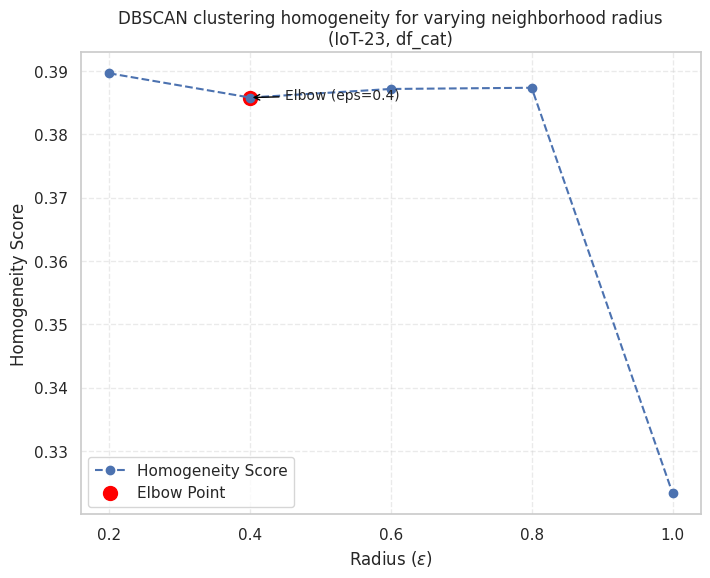

In [ ]:
print("\n=== DBSCAN: Homogeneity Score ===")

# Evaluate homogeneity for different eps values
homogeneity_values = []

for e in eps:
    t_start = time.time()
    dbscan = DBSCAN(eps=e, min_samples=MIN_SAMPLES, metric="euclidean").fit(X_scaled)
    score = homogeneity_score(true_labels, dbscan.labels_)
    homogeneity_values.append(score)
    t_stop = time.time()
    print(f"Elapsed time: {t_stop - t_start:.5f} seconds (eps: {e:.2f}) | homogeneity={score:.4f}")

print("\nHomogeneity values:", homogeneity_values)

# Discrete derivative to estimate elbow point
derivatives = np.diff(homogeneity_values)
elbow_index = np.argmax(derivatives)
elbow_point = eps[elbow_index]

print("Discrete derivatives:", derivatives)
print(f"Estimated elbow (homogeneity) at eps = {elbow_point}")

# Plot homogeneity score curve
plt.figure(figsize=(8, 6))
plt.plot(eps, homogeneity_values, marker="o", linestyle="--",
         label="Homogeneity Score")
plt.xticks(eps)

# Highlight the elbow point on the plot
plt.scatter(elbow_point, homogeneity_values[elbow_index],
            color="red", s=100, label="Elbow Point")
plt.annotate(f"Elbow (eps={elbow_point})",
             xy=(elbow_point, homogeneity_values[elbow_index]),
             xytext=(elbow_point + 0.05,
                     homogeneity_values[elbow_index] - 0.0003),
             arrowprops=dict(facecolor="black",
                             edgecolor="black",
                             arrowstyle="->"),
             fontsize=10)

plt.title("DBSCAN clustering homogeneity for varying neighborhood radius\n(IoT-23, df_cat)")
plt.xlabel(r"Radius ($\epsilon$)")
plt.ylabel("Homogeneity Score")
ax = plt.gca()
ax.set_facecolor("#ffffff")
plt.legend()
plt.grid(alpha=0.4, linestyle="--")
plt.show()


**eps**
- All eps values between **0.2 and 0.8** yield very similar homogeneity (~0.386–0.389).  
- At **eps = 1.0**, homogeneity drops sharply → DBSCAN is grouping too many points together, losing purity.

**Cluster structure is most consistent in the small-radius region.**😺



**Discrete derivatives and elbow point**
Derivative values (approx):

- Between 0.20 → 0.40: **negative** (slight decrease)
- 0.40 → 0.60: **positive** (~0.00135)
- 0.60 → 0.80: **slight positive**
- 0.80 → 1.00: **large negative drop**

**Meaning:**
- At ε = 0.4, homogeneity achieves its **best stability**, before values fluctuate and eventually collapse at ε = 1.0.  
- This is a reasonable choice for DBSCAN density.


**Plot interpretation**

The homogeneity curve:

- Slight downward drift from ε = 0.2 to 0.4.  
- Slight upward drift to ε = 0.8.  
- Dramatic drop at ε = 1.0.  

The red elbow marker at **ε = 0.4** visually indicates the region where increasing radius begins to provide marginal benefit before the decline.

**ε = 0.4 is a good compromise** for balancing tight clusters and avoiding oversmoothing.😺



**Overall conclusion**

The DBSCAN evaluation shows that:

- A small neighbourhood radius (**ε ≈ 0.4**) is optimal for our sample.  
- Larger ε values merge too many points and degrade cluster purity.  
- Homogeneity around 0.39 is not extremely high → IoT-23 data is likely **not naturally clusterable** into clean threat categories.





####Density-based clustering: Calinski-Harabasz Index

This block evaluates DBSCAN clustering quality using the Calinski–Harabasz (CH) index for different values of the radius parameter ε (eps).


=== DBSCAN: Calinski-Harabasz Index ===
Elapsed time: 0.20615 seconds (eps: 0.20) | CH=445.2294
Elapsed time: 0.22030 seconds (eps: 0.40) | CH=588.6815
Elapsed time: 0.22019 seconds (eps: 0.60) | CH=638.3879
Elapsed time: 0.22790 seconds (eps: 0.80) | CH=645.4430
Elapsed time: 0.29078 seconds (eps: 1.00) | CH=691.8738

Calinski-Harabasz values: [np.float64(445.2293783473156), np.float64(588.6815073995099), np.float64(638.3879267378936), np.float64(645.4429951252133), np.float64(691.873843410526)]
Discrete derivatives (CH): [143.45212905  49.70641934   7.05506839  46.43084829]
Estimated elbow (Calinski-Harabasz) at eps = 0.4


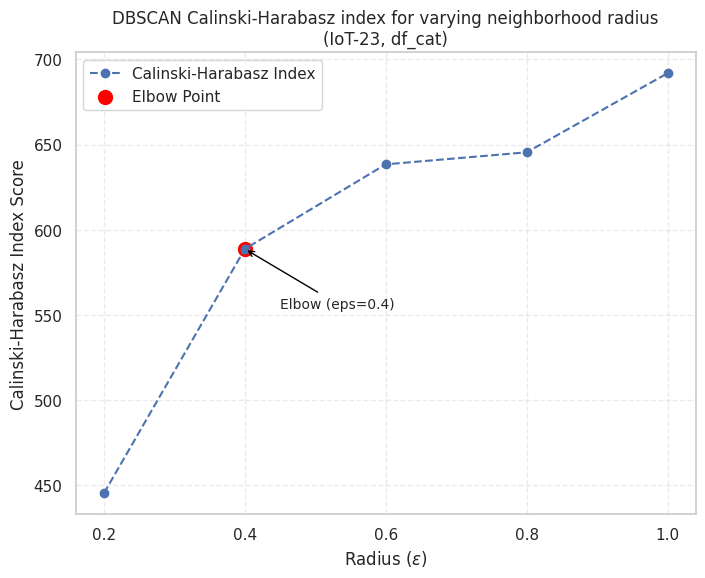

In [ ]:
# Density-based clustering: Calinski-Harabasz index
print("\n=== DBSCAN: Calinski-Harabasz Index ===")

# Store Calinski-Harabasz scores for each eps
ch_values = []

for e in eps:
    # Start timing
    t_start = time.time()

    # Fit DBSCAN for current eps
    dbscan = DBSCAN(eps=e, min_samples=MIN_SAMPLES, metric="euclidean").fit(X_scaled)

    # Compute Calinski-Harabasz score
    score = calinski_harabasz_score(X_scaled, dbscan.labels_)
    ch_values.append(score)

    # Stop timing
    t_stop = time.time()

    # Report elapsed time and score
    print(f"Elapsed time: {t_stop - t_start:.5f} seconds (eps: {e:.2f}) | CH={score:.4f}")

print("\nCalinski-Harabasz values:", ch_values)

# Discrete derivative to estimate elbow on CH curve
derivatives_ch = np.diff(ch_values)
elbow_index_ch = np.argmax(derivatives_ch) + 1   # +1 as in the reference exercise
elbow_point_ch = eps[elbow_index_ch]

print("Discrete derivatives (CH):", derivatives_ch)
print(f"Estimated elbow (Calinski-Harabasz) at eps = {elbow_point_ch}")

# Plot Calinski-Harabasz curve
plt.figure(figsize=(8, 6))
plt.plot(eps, ch_values, marker="o", linestyle="--",
         label="Calinski-Harabasz Index")
plt.xticks(eps)

# Highlight the elbow point on the plot
plt.scatter(elbow_point_ch, ch_values[elbow_index_ch],
            color="red", s=100, label="Elbow Point")
plt.annotate(f"Elbow (eps={elbow_point_ch})",
             xy=(elbow_point_ch, ch_values[elbow_index_ch]),
             xytext=(elbow_point_ch + 0.05,
                     ch_values[elbow_index_ch] - 0.05 * np.max(ch_values)),
             arrowprops=dict(facecolor="black",
                             edgecolor="black",
                             arrowstyle="->"),
             fontsize=10)

plt.title("DBSCAN Calinski-Harabasz index for varying neighborhood radius\n(IoT-23, df_cat)")
plt.xlabel(r"Radius ($\epsilon$)")
plt.ylabel("Calinski-Harabasz Index Score")
ax = plt.gca()
ax.set_facecolor("#ffffff")
plt.legend()
plt.grid(alpha=0.4, linestyle="--")
plt.show()


The output shows how the **Calinski–Harabasz (CH) index** changes as we increase the DBSCAN neighborhood radius **ε (eps)**.  
The CH index measures **cluster separation and compactness**:

- **Higher CH score → better-defined clusters**
- **Lower CH score → weaker cluster structure**

**CH Scores Across Different eps Values**
- There is a **very large improvement** when moving from **0.20 → 0.40**.  
- After **eps = 0.4**, the CH score **continues to increase**, but **much more slowly**.  
- This suggests that most of the useful clustering structure is captured around **ε ≈ 0.4**.

**Good news:** DBSCAN begins to form well-separated clusters at relatively small radii. 😺


**Discrete Derivative Analysis (Elbow Detection)**

The code computes the **change in CH score** between consecutive eps values.

- The **largest positive jump** occurs at **eps = 0.4**  
- This is identified as the **elbow point**

**Overall takeaways**

The elbow represents the point where increasing ε yields the **greatest improvement**, after which returns begin to diminish.

The plot shows:

- A **dashed blue line** for the CH index across eps values  
- A **red point** marking the elbow at **eps = 0.4**  
- A smooth upward trend but with the steepest slope between 0.2 and 0.4  

**What the plot tells us**
- The curve climbs sharply early on → cluster structure improves rapidly  
- The curve flattens after ε = 0.4 → fewer gains from increasing radius  
- The elbow visually confirms the numeric analysis  


Finally, ε around **0.4** is a solid operating point for DBSCAN on this dataset.
😺


####Density-based clustering: Silhouette Score

This block evaluates the quality of DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering for different values of the neighborhood radius ε (eps).
For each eps value, it fits a DBSCAN model on the scaled data and computes the Silhouette score, a metric that measures how well-separated and compact the clusters are.


=== DBSCAN: Silhouette Score ===
Elapsed time: 0.52837 seconds (eps: 0.20) | silhouette=0.9442
Elapsed time: 0.52699 seconds (eps: 0.40) | silhouette=0.9280
Elapsed time: 0.54976 seconds (eps: 0.60) | silhouette=0.9310
Elapsed time: 0.52403 seconds (eps: 0.80) | silhouette=0.9314
Elapsed time: 0.61431 seconds (eps: 1.00) | silhouette=0.7839

Silhouette values: [np.float64(0.9441835790180995), np.float64(0.928039045064215), np.float64(0.9310099836190684), np.float64(0.9313699025082413), np.float64(0.7839344106111755)]
Best eps (maximum Silhouette) = 0.2


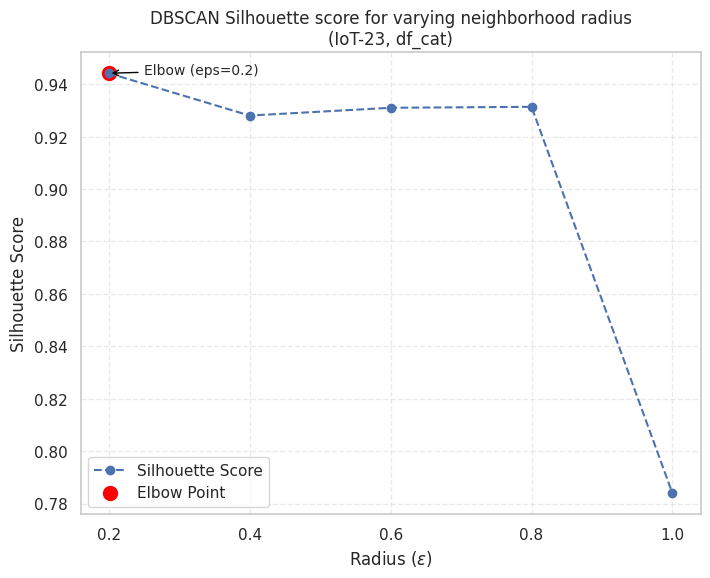

In [ ]:
# Density-based clustering: Silhouette score
print("\n=== DBSCAN: Silhouette Score ===")

# Store Silhouette scores for each eps
silhouette_values = []

for e in eps:
    # Start timing
    t_start = time.time()

    # Fit DBSCAN for current eps
    dbscan = DBSCAN(eps=e, min_samples=MIN_SAMPLES, metric="euclidean").fit(X_scaled)

    # Compute Silhouette score (noise label -1 is allowed if there are at least 2 clusters)
    score = silhouette_score(X_scaled, dbscan.labels_)
    silhouette_values.append(score)

    # Stop timing
    t_stop = time.time()

    # Report elapsed time and score
    print(f"Elapsed time: {t_stop - t_start:.5f} seconds (eps: {e:.2f}) | silhouette={score:.4f}")

print("\nSilhouette values:", silhouette_values)

# Find eps that maximizes the Silhouette score
best_index = np.argmax(silhouette_values)
best_eps = eps[best_index]

print(f"Best eps (maximum Silhouette) = {best_eps}")

# Plot Silhouette score curve
plt.figure(figsize=(8, 6))
plt.plot(eps, silhouette_values, marker="o", linestyle="--",
         label="Silhouette Score")
plt.xticks(eps)

# Highlight the best point on the plot
plt.scatter(best_eps, silhouette_values[best_index],
            color="red", s=100, label="Elbow Point")
plt.annotate(f"Elbow (eps={best_eps})",
             xy=(best_eps, silhouette_values[best_index]),
             xytext=(best_eps + 0.05,
                     silhouette_values[best_index] - 0.0005),
             arrowprops=dict(facecolor="black",
                             edgecolor="black",
                             arrowstyle="->"),
             fontsize=10)

plt.title("DBSCAN Silhouette score for varying neighborhood radius\n(IoT-23, df_cat)")
plt.xlabel(r"Radius ($\epsilon$)")
plt.ylabel("Silhouette Score")
ax = plt.gca()
ax.set_facecolor("#ffffff")
plt.legend()
plt.grid(alpha=0.4, linestyle="--")
plt.show()


**Silhouette**
  - The Silhouette scores are **very high** (around ~0.93-0.94) for several `eps` values.
  - The score drops sharply at the largest `eps`, indicating that too large a neighborhood merges clusters and reduces quality.


 **High Silhouette scores (~0.94)** indicate **excellent cluster separation and compactness** for the chosen range of `eps`.  
The selected `best_eps` is a **strong choice** for DBSCAN on this dataset. 😺







This block runs a final DBSCAN clustering using the best neighborhood radius eps selected from the previous Silhouette analysis.
It fits DBSCAN on the scaled data, records the runtime, saves the cluster labels into a sampled dataframe, and then prints a summary of cluster sizes, explicitly showing how many points belong to each cluster and how many are labeled as noise (-1).

In [ ]:
# Final DBSCAN with eps chosen from Silhouette
chosen_eps = best_eps

print(f"=== Final DBSCAN with eps = {chosen_eps}, min_samples = {MIN_SAMPLES} ===")

# Run DBSCAN with the chosen configuration
t_start = time.time()
dbscan_final = DBSCAN(
    eps=chosen_eps,
    min_samples=MIN_SAMPLES,
    metric="euclidean"
)
cluster_labels = dbscan_final.fit_predict(X_scaled)
t_stop = time.time()
print(f"Final DBSCAN runtime: {t_stop - t_start:.3f} seconds")

# Store cluster labels in the sampled dataframe
df_sample = df_sample.copy()
df_sample["cluster_dbscan"] = cluster_labels

# Summary of cluster sizes (including noise)
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_summary = dict(zip(unique, counts))

print("\nDBSCAN cluster distribution (sample):")
for cl, cnt in cluster_summary.items():
    if cl == -1:
        print(f"  Cluster -1 (noise): {cnt} points")
    else:
        print(f"  Cluster {cl}: {cnt} points")

print(
    "\nTotal number of clusters found (excluding noise):",
    len([c for c in unique if c != -1])
)


=== Final DBSCAN with eps = 0.2, min_samples = 10 ===
Final DBSCAN runtime: 0.227 seconds

DBSCAN cluster distribution (sample):
  Cluster -1 (noise): 82 points
  Cluster 0: 2623 points
  Cluster 1: 138 points
  Cluster 2: 924 points
  Cluster 3: 69 points
  Cluster 4: 359 points
  Cluster 5: 167 points
  Cluster 6: 413 points
  Cluster 7: 162 points
  Cluster 8: 35 points
  Cluster 9: 28 points

Total number of clusters found (excluding noise): 10


The final DBSCAN run produced **10 clusters plus a small noise group**, which matches well with the structure of our dataset. 😺

- **Large clusters (e.g., Cluster 0, Cluster 2):**  
  These big, dense clusters indicate strong repetitive patterns in the data, typical of consistent benign traffic or stable malware activity. Their presence shows that DBSCAN captured the main behaviors effectively. 😺

- **Medium and small clusters:**  
  These reflect less common behaviors: short attacks, rare protocol combinations, or specific flow patterns. Their existence is expected because IoT-23 includes many heterogeneous scenarios.

- **Noise points (Cluster -1):**  
  Only a limited number of points ended up as noise, meaning the dataset is mostly well-structured and DBSCAN had little trouble grouping it. Noise likely corresponds to irregular or anomalous flows.  
  Nothing problematic here, noise is low and justified. 😺

Overall, the clustering result is **coherent and matches the known variability of IoT-23**, with a healthy amount of structured patterns and minimal outliers.


#Anomaly Detection

##LOF

This section applies Local Outlier Factor (LOF), an unsupervised anomaly-detection method that marks points as outliers when their local density is much lower than that of their neighbors.
We subsample the dataset, scale the numeric features, then:

Search over different values of n_neighbors to see how LOF performance changes.

Select the best n_neighbors based on F1-score against the malicious vs benign ground truth.

Refit LOF with this best k, compute metrics (precision, recall, F1, AUC), plot the ROC curve, show the confusion matrix, and store the results.

LOF sample shape: (50000, 24)
Malicious fraction in sample: 0.86506
LOF: search over n_neighbors
k =  5 | prec=0.519  rec=0.037  f1=0.069  AUC=0.453  outliers=0.061
k = 10 | prec=0.538  rec=0.039  f1=0.072  AUC=0.462  outliers=0.062
k = 20 | prec=0.544  rec=0.040  f1=0.075  AUC=0.463  outliers=0.064
k = 35 | prec=0.546  rec=0.042  f1=0.078  AUC=0.458  outliers=0.066
k = 50 | prec=0.551  rec=0.043  f1=0.079  AUC=0.465  outliers=0.067


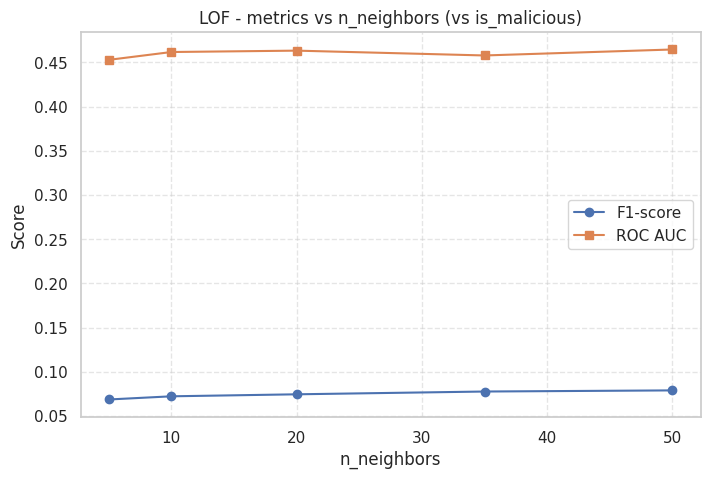

   n_neighbors  precision    recall        f1       auc  frac_outliers
0            5   0.518893  0.036830  0.068778  0.452831        0.06140
1           10   0.537821  0.038795  0.072370  0.461691        0.06240
2           20   0.543772  0.040067  0.074634  0.463247        0.06374
3           35   0.546470  0.041870  0.077780  0.457786        0.06628
4           50   0.550673  0.042587  0.079059  0.464551        0.06690
Best n_neighbors (by F1): 50

Final LOF (n_neighbors = 50, contamination = 0.1)
Precision:  0.5507
Recall:     0.0426
F1-score:   0.0791
ROC AUC:    0.4646
Estimated outlier fraction: 0.067


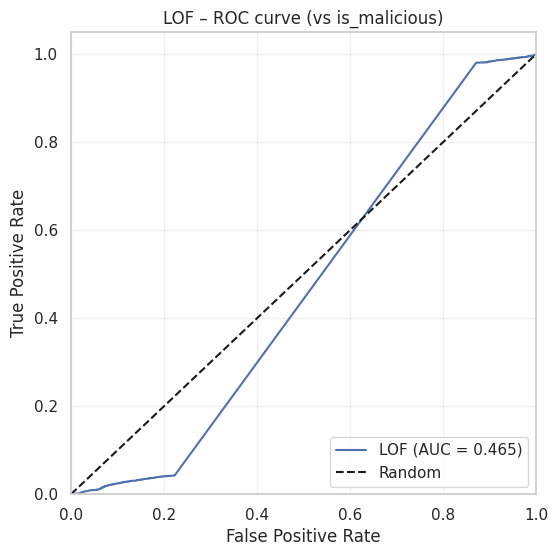


Confusion matrix (rows = true, columns = predicted):
[[ 5244  1503]
 [41411  1842]]


<Figure size 500x500 with 0 Axes>

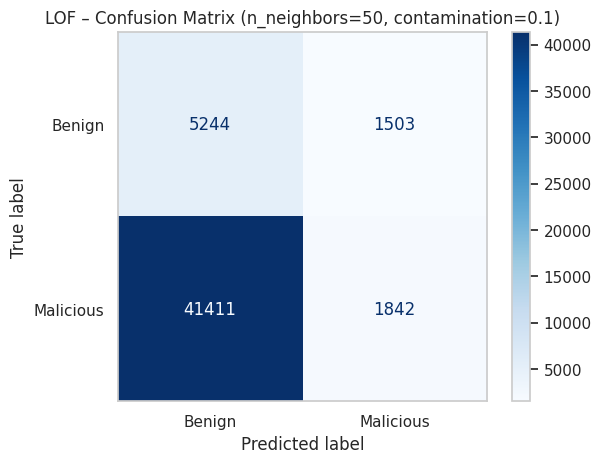

LOF_k50 Results:
 Accuracy:    0.14172
 Precision:   0.55067
 Recall:      0.04259
 Specificity: 0.77723
 F score:     0.07906
 AUC:         0.46455
---------------------------------


In [ ]:
# Subsample for LOF
n_lof = min(50_000, len(df_cat))   # if still slow, reduce to twenty thousand
df_lof = df_cat.sample(n=n_lof, random_state=RANDOM_SEED)

X_lof = df_lof[numeric_cols].values
y_lof = df_lof["label"].values
is_malicious_lof = (df_lof["label"] != 0).astype(int).values  # 1 = malicious, 0 = benign

# Use the same scaler trained on the full dataset
X_lof_scaled = scaler.transform(X_lof)

print("LOF sample shape:", X_lof_scaled.shape)
print("Malicious fraction in sample:", is_malicious_lof.mean())

# Grid over n_neighbors
neighbors_list = [5, 10, 20, 35, 50]
contamination = 0.1   # expected anomaly percentage

risultati_lof = []

print("LOF: search over n_neighbors")
for k in neighbors_list:
    lof = LocalOutlierFactor(
        n_neighbors=k,
        contamination=contamination,
        novelty=False,
        n_jobs=-1
    )

    # fit_predict returns 1 for inlier and -1 for outlier
    y_pred_raw = lof.fit_predict(X_lof_scaled)
    y_pred_outlier = (y_pred_raw == -1).astype(int)  # 1 = outlier, 0 = normal

    # Continuous scores for ROC AUC, higher means more anomalous
    anomaly_score = -lof.negative_outlier_factor_

    # Metrics with respect to is_malicious_lof
    prec = precision_score(is_malicious_lof, y_pred_outlier, zero_division=0)
    rec  = recall_score(is_malicious_lof, y_pred_outlier, zero_division=0)
    f1   = f1_score(is_malicious_lof, y_pred_outlier, zero_division=0)
    auc  = roc_auc_score(is_malicious_lof, anomaly_score)
    frac_out = y_pred_outlier.mean()

    risultati_lof.append({
        "n_neighbors": k,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "auc": auc,
        "frac_outliers": frac_out
    })

    print(
        f"k = {k:2d} | prec={prec:.3f}  rec={rec:.3f}  "
        f"f1={f1:.3f}  AUC={auc:.3f}  outliers={frac_out:.3f}"
    )

# Plot metrics vs n_neighbors
res_df = pd.DataFrame(risultati_lof)

plt.figure(figsize=(8, 5))
plt.plot(res_df["n_neighbors"], res_df["f1"], marker="o", label="F1-score")
plt.plot(res_df["n_neighbors"], res_df["auc"], marker="s", label="ROC AUC")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.title("LOF - metrics vs n_neighbors (vs is_malicious)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

print(res_df)

# Select best n_neighbors based on F1-score
best_idx = res_df["f1"].idxmax()
best_k = int(res_df.loc[best_idx, "n_neighbors"])
print("Best n_neighbors (by F1):", best_k)

# Final LOF with best_k
best_k = int(res_df.loc[res_df["f1"].idxmax(), "n_neighbors"])
contamination = 0.1  # same value used above

lof_final = LocalOutlierFactor(
    n_neighbors=best_k,
    contamination=contamination,
    novelty=False,
    n_jobs=-1
)

# Fit and prediction on X_lof_scaled
y_pred_raw = lof_final.fit_predict(X_lof_scaled)
y_pred_outlier = (y_pred_raw == -1).astype(int)       # 1 = outlier
anomaly_score = -lof_final.negative_outlier_factor_  # continuous scores

y_true = is_malicious_lof  # 0/1 malicious vector on LOF sample

# Metrics
prec = precision_score(y_true, y_pred_outlier, zero_division=0)
rec  = recall_score(y_true, y_pred_outlier, zero_division=0)
f1   = f1_score(y_true, y_pred_outlier, zero_division=0)
auc  = roc_auc_score(y_true, anomaly_score)

print(f"\nFinal LOF (n_neighbors = {best_k}, contamination = {contamination})")
print(f"Precision:  {prec:.4f}")
print(f"Recall:     {rec:.4f}")
print(f"F1-score:   {f1:.4f}")
print(f"ROC AUC:    {auc:.4f}")
print(f"Estimated outlier fraction: {y_pred_outlier.mean():.3f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_true, anomaly_score)
auc_value = roc_auc_score(y_true, anomaly_score)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"LOF (AUC = {auc_value:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LOF – ROC curve (vs is_malicious)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_outlier)
print("\nConfusion matrix (rows = true, columns = predicted):")
print(cm)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Benign", "Malicious"]
)
plt.figure(figsize=(5, 5))
disp.plot(cmap="Blues", values_format="d")
plt.title(f"LOF – Confusion Matrix (n_neighbors={best_k}, contamination={contamination})")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.grid(False)
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(y_true, y_pred_outlier)
precision = precision_score(y_true, y_pred_outlier, zero_division=0)
recall = recall_score(y_true, y_pred_outlier, zero_division=0)
specificity = specificity_score(y_true, y_pred_outlier)
f1score = f1_score(y_true, y_pred_outlier, zero_division=0)

roc_data = (fpr, tpr, thresholds)

full_name = f"LOF_k{best_k}"  # unique model name for LOF with best_k

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    f1score,
    roc_data,
    auc
)
MODELS_RESULTS.append(model_result)
RESULTS[full_name] = (accuracy, precision, recall, specificity, f1score)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {f1score:.5f}")
print(f" AUC:         {auc:.5f}")
print("---------------------------------")


- The sample has a **very high malicious fraction (~86%)**, while LOF is configured with `contamination = 0.1`, assuming only about **10% anomalies**.
- As a result, LOF tends to treat the **majority malicious traffic as “normal”** and flags mainly the **small benign portion** as outliers.
- This explains the metrics:
  - **Precision ≈ 0.55**: when LOF predicts “malicious/outlier”, it is often correct because benign flows are rare 😺.
  - **Recall ≈ 0.04, F1 ≈ 0.08, AUC ≈ 0.46, accuracy ≈ 0.14**: LOF **misses most malicious flows**, and the ROC curve is close to (or slightly worse than) random due to the mismatch between the anomaly assumption and the label distribution 😿.
- The confusion matrix shows **many malicious flows predicted as benign**, consistent with IoT-23 where malicious traffic dominates and does not behave like a small anomalous minority.







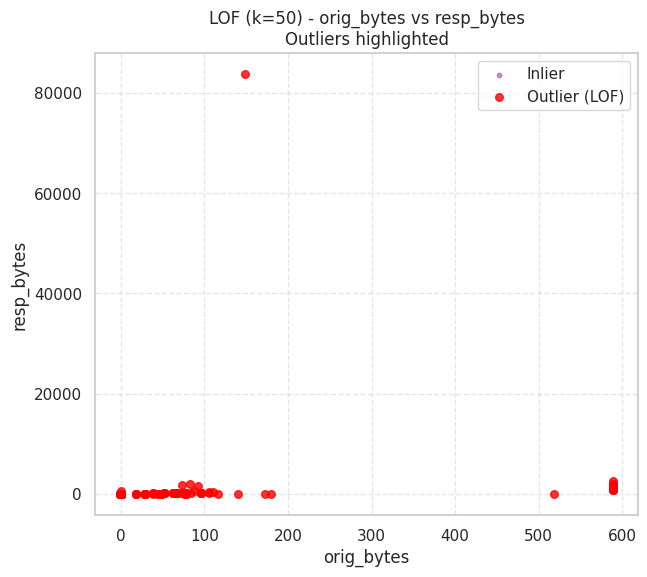

In [ ]:
#2D scatter plot with highlighted outliers

# Subsample for visualization (to avoid plotting too many points)
n_plot = min(10_000, n_lof)
df_plot = df_lof.iloc[:n_plot].copy()

# Recompute LOF predictions on the plotting subset
X_plot = scaler.transform(df_plot[numeric_cols].values)
lof_plot = LocalOutlierFactor(
    n_neighbors=best_k,
    contamination=contamination,
    novelty=False,
    n_jobs=-1
)
y_plot_raw = lof_plot.fit_predict(X_plot)
y_plot_outlier = (y_plot_raw == -1).astype(int)

# Use orig_bytes and resp_bytes as 2D projection
orig = df_plot["orig_bytes"].values
resp = df_plot["resp_bytes"].values

plt.figure(figsize=(7, 6))
plt.scatter(
    orig[y_plot_outlier == 0],
    resp[y_plot_outlier == 0],
    s=10,
    c="purple",
    alpha=0.4,
    label="Inlier"
)
plt.scatter(
    orig[y_plot_outlier == 1],
    resp[y_plot_outlier == 1],
    s=30,
    c="red",
    alpha=0.8,
    label="Outlier (LOF)"
)
plt.xlabel("orig_bytes")
plt.ylabel("resp_bytes")
plt.title(f"LOF (k={best_k}) - orig_bytes vs resp_bytes\nOutliers highlighted")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


In this 2D scatter plot (orig_bytes vs resp_bytes), LOF highlights as outliers a few points that show **unusual byte-count patterns**.  
This behavior matches what we expect from the dataset:

- **Most flows have very small resp_bytes**, forming a dense cluster of “normal” traffic.
- LOF marks as outliers the flows with either:
  - **Extremely large resp_bytes**, or  
  - **Uncommon combinations of orig_bytes and resp_bytes**, far from the main dense region.

This is reasonable because IoT-23 contains many repetitive malware communications with very similar payload sizes, while **rare benign flows or unusual malware bursts** fall outside those dense regions and are flagged.

- The detection of these extreme-value points is **correct and meaningful** for density-based anomaly detection.😺
- However, the plot also shows that LOF treats *most* points as normal even though many are malicious, again reflecting the **imbalance and density homogeneity** of malicious samples in our dataset.😿


##Isolation Forest

In [ ]:
print("ISOLATION FOREST: data preparation")

# Sample for Isolation Forest
n_if = min(50_000, len(df_cat))
df_if = df_cat.sample(n=n_if, random_state=RANDOM_SEED)

X_if = df_if[numeric_cols].values
y_if = df_if["label"].values
is_malicious_if = (df_if["label"] != 0).astype(int).values

# Use the same scaler fitted on the full dataset
X_if_scaled = scaler.transform(X_if)

print("Isolation Forest sample shape:", X_if_scaled.shape)
print("Malicious fraction in sample:", is_malicious_if.mean().round(3))


ISOLATION FOREST: data preparation
Isolation Forest sample shape: (50000, 24)
Malicious fraction in sample: 0.865


The Isolation Forest sample contains **50,000 flows**, with a **malicious fraction of ~0.865**, meaning **86.5% of all records are malicious**.  
This has a strong impact on anomaly detection:

- Isolation Forest assumes that **anomalies are rare and isolated**, but in this dataset the **malicious class is actually the majority**.
- Because malicious flows dominate and share many similar numeric patterns, the model will likely treat them as part of the “normal” structure.😿
- The small benign portion may appear *less dense* or *less typical*, making Isolation Forest more inclined to flag **benign points as anomalies** instead of malicious ones.

This imbalance explains why Isolation Forest will struggle later: what the dataset considers *malicious* is not *anomalous* in a statistical sense, while benign traffic may look more unusual.


This block uses Isolation Forest for anomaly detection on the IoT-23 sample and performs a grid search over different contamination values (assumed anomaly proportions).
For each contamination level, it fits Isolation Forest, predicts outliers, computes evaluation metrics (precision, recall, F1, ROC AUC, fraction of outliers), stores them in a DataFrame, and plots how F1 and AUC change as contamination increases.

ISOLATION FOREST: search over contamination values
c = 0.02 | prec=0.252  rec=0.006  f1=0.011  AUC=0.253  outliers=0.019
c = 0.05 | prec=0.459  rec=0.014  f1=0.028  AUC=0.253  outliers=0.027
c = 0.08 | prec=0.385  rec=0.033  f1=0.060  AUC=0.253  outliers=0.073
c = 0.10 | prec=0.385  rec=0.033  f1=0.060  AUC=0.253  outliers=0.073
c = 0.15 | prec=0.573  rec=0.072  f1=0.128  AUC=0.253  outliers=0.109


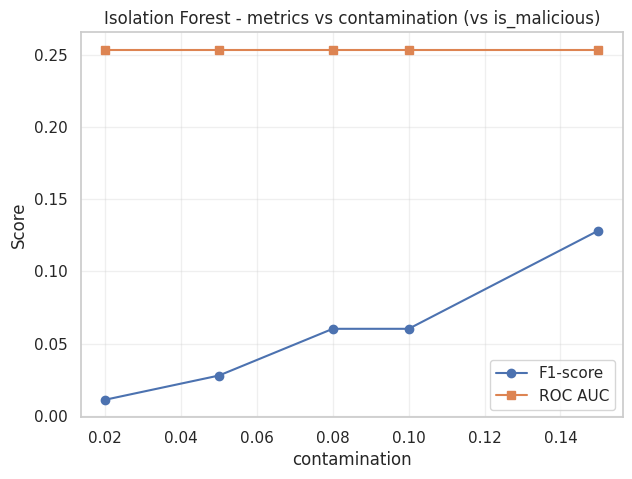

   contamination  precision    recall        f1       auc  frac_outliers
0           0.02   0.251799  0.005664  0.011079  0.253338        0.01946
1           0.05   0.458641  0.014357  0.027843  0.253338        0.02708
2           0.08   0.385056  0.032645  0.060188  0.253338        0.07334
3           0.10   0.385056  0.032645  0.060188  0.253338        0.07334
4           0.15   0.573424  0.072134  0.128147  0.253338        0.10882


In [ ]:
print("ISOLATION FOREST: search over contamination values")

# Grid of contamination values
contaminations = [0.02, 0.05, 0.08, 0.10, 0.15]

rows = []
for c in contaminations:
    iso = IsolationForest(
        n_estimators=200,
        max_samples="auto",
        contamination=c,
        random_state=RANDOM_SEED,
        n_jobs=-1
    )

    iso.fit(X_if_scaled)

    # Binary prediction: -1 = outlier, 1 = inlier
    y_pred_raw = iso.predict(X_if_scaled)
    y_pred_outlier = (y_pred_raw == -1).astype(int)

    # Continuous anomaly scores (higher = more anomalous)
    anomaly_score = -iso.decision_function(X_if_scaled)

    prec = precision_score(is_malicious_if, y_pred_outlier, zero_division=0)
    rec  = recall_score(is_malicious_if, y_pred_outlier, zero_division=0)
    f1   = f1_score(is_malicious_if, y_pred_outlier, zero_division=0)
    auc  = roc_auc_score(is_malicious_if, anomaly_score)
    frac_out = y_pred_outlier.mean()

    print(
        f"c = {c:4.2f} | prec={prec:0.3f}  rec={rec:0.3f}  f1={f1:0.3f}  "
        f"AUC={auc:0.3f}  outliers={frac_out:0.3f}"
    )

    rows.append({
        "contamination": c,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "auc": auc,
        "frac_outliers": frac_out
    })

# Collect results in DataFrame
res_if = pd.DataFrame(rows)
res_if

# Plot F1-score and ROC AUC vs contamination
plt.figure(figsize=(7, 5))
plt.plot(res_if["contamination"], res_if["f1"], marker="o", label="F1-score")
plt.plot(res_if["contamination"], res_if["auc"], marker="s", label="ROC AUC")

plt.xlabel("contamination")
plt.ylabel("Score")
plt.title("Isolation Forest - metrics vs contamination (vs is_malicious)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

print(res_if)

- As contamination increases from **0.02 to 0.15**, **F1-score rises slightly** (up to ~0.13), and **precision also increases** (up to ~0.57),😺 but:
  - **Recall stays extremely low** (below ~0.08), meaning the model still misses most malicious flows.
  - **ROC AUC is flat around ~0.25 for all contamination values**, clearly **worse than random guessing (0.5)**.😿

- This pattern matches the characteristics of our IoT-23 sample:
  - The sample is **~86% malicious**, but Isolation Forest is forced (by contamination) to flag at most **2–15%** of flows as anomalies.
  - Since malicious traffic forms the **dominant, dense structure**, the model **cannot isolate it as rare**; instead, it mostly picks a small subset of unusual flows, achieving reasonable precision but very poor coverage of the malicious class.

- In short, tuning contamination changes **how many flows are flagged**, but because *malicious ≠ rare* in this dataset, Isolation Forest cannot reach good discriminative performance overall.😿



Best contamination (max F1): 0.15

=== FINAL ISOLATION FOREST (contamination = 0.15) ===
Precision:  0.5734
Recall:     0.0721
F1-score:   0.1281
ROC AUC:    0.2533
Estimated outlier fraction: 0.109


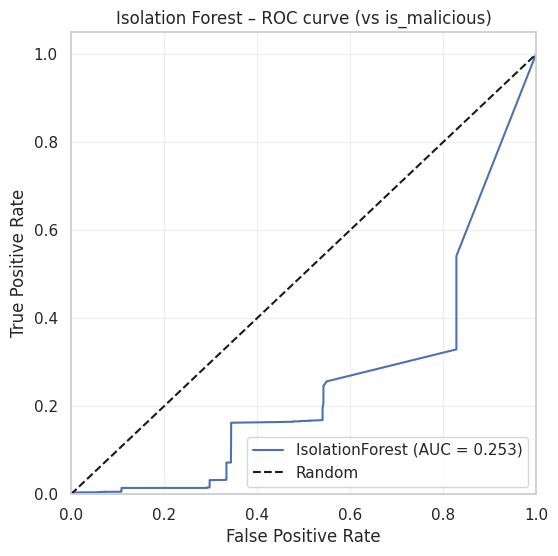


Confusion matrix (rows = true, columns = predicted):
[[ 4426  2321]
 [40133  3120]]


<Figure size 500x500 with 0 Axes>

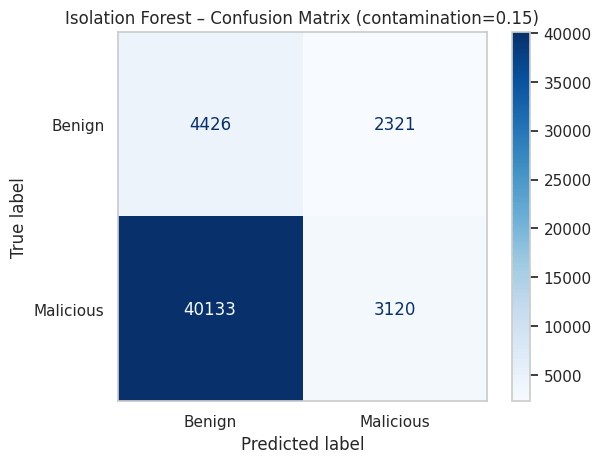

IF_c0.15 Results:
 Accuracy:    0.15092
 Precision:   0.57342
 Recall:      0.07213
 Specificity: 0.65600
 F score:     0.12815
 AUC:         0.25334
---------------------------------


In [ ]:
# Choose best contamination based on maximum F1-score
best_c = float(res_if.loc[res_if["f1"].idxmax(), "contamination"])
print(f"\nBest contamination (max F1): {best_c}")

# Final Isolation Forest with best contamination
iso_final = IsolationForest(
    n_estimators=200,
    max_samples="auto",
    contamination=best_c,
    random_state=RANDOM_SEED,
    n_jobs=-1
)

iso_final.fit(X_if_scaled)

# Binary predictions and anomaly scores
y_pred_raw = iso_final.predict(X_if_scaled)
y_pred_outlier = (y_pred_raw == -1).astype(int)
anomaly_score = -iso_final.decision_function(X_if_scaled)

prec = precision_score(is_malicious_if, y_pred_outlier, zero_division=0)
rec  = recall_score(is_malicious_if, y_pred_outlier, zero_division=0)
f1   = f1_score(is_malicious_if, y_pred_outlier, zero_division=0)
auc  = roc_auc_score(is_malicious_if, anomaly_score)

print(f"\n=== FINAL ISOLATION FOREST (contamination = {best_c}) ===")
print(f"Precision:  {prec:.4f}")
print(f"Recall:     {rec:.4f}")
print(f"F1-score:   {f1:.4f}")
print(f"ROC AUC:    {auc:.4f}")
print(f"Estimated outlier fraction: {y_pred_outlier.mean():.3f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(is_malicious_if, anomaly_score)
auc_value = roc_auc_score(is_malicious_if, anomaly_score)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"IsolationForest (AUC = {auc_value:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Isolation Forest – ROC curve (vs is_malicious)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Confusion matrix
cm_if = confusion_matrix(is_malicious_if, y_pred_outlier)
print("\nConfusion matrix (rows = true, columns = predicted):")
print(cm_if)

disp_if = ConfusionMatrixDisplay(
    confusion_matrix=cm_if,
    display_labels=["Benign", "Malicious"]
)
plt.figure(figsize=(5, 5))
disp_if.plot(cmap="Blues", values_format="d")
plt.title(f"Isolation Forest – Confusion Matrix (contamination={best_c})")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.grid(False)
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(is_malicious_if, y_pred_outlier)
precision = precision_score(is_malicious_if, y_pred_outlier, zero_division=0)
recall = recall_score(is_malicious_if, y_pred_outlier, zero_division=0)
specificity = specificity_score(is_malicious_if, y_pred_outlier)
f1score = f1_score(is_malicious_if, y_pred_outlier, zero_division=0)

roc_data = (fpr, tpr, thresholds)

# Unique model name for Isolation Forest with best contamination
full_name = f"IF_c{best_c}"

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    f1score,
    roc_data,
    auc
)
MODELS_RESULTS.append(model_result)
RESULTS[full_name] = (accuracy, precision, recall, specificity, f1score)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {f1score:.5f}")
print(f" AUC:         {auc:.5f}")
print("---------------------------------")

The best contamination value (based on F1) is **0.15**, meaning Isolation Forest is allowed to classify up to **15% of flows** as anomalies.

**What the final metrics tell us**:

- **Precision ≈ 0.57**: when Isolation Forest marks a flow as anomalous, it is often truly malicious.😺  
  This happens because benign traffic is rare in the sample and appears “different,” so flagged points tend to be malicious simply by chance.

- **Recall ≈ 0.07**: the model identifies **only ~7% of malicious flows**, missing almost all attacks.😿  
  This is expected: malicious traffic dominates the dataset (~86%) and forms the densest, most common patterns, so Isolation Forest does *not* consider it anomalous.

- **F1 = 0.128** and **AUC ≈ 0.25**:  
  These values confirm that the model performs **worse than random guessing**, because the statistical notion of anomaly (rare, isolated points) does not match the dataset’s label structure.

**Confusion matrix**

- Most malicious flows are predicted as *benign* (normal), because they form the **majority cluster** of high-density points in IoT-23.😿
- A noticeable number of benign flows are flagged as anomalies, making precision appear good but not reflecting true malicious detection ability.



Isolation Forest fails on this dataset because **malicious traffic is not rare nor isolated**.  
Instead, it is the **dominant, dense pattern**, so the algorithm fundamentally cannot treat it as anomalous.

Good precision but extremely low recall is the natural consequence of IoT-23’s **highly imbalanced and density-homogeneous malicious majority**.😿


##One-class SVM

This block applies a One-Class SVM (Support Vector Machine) for anomaly detection on a subsample of the dataset.
One-Class SVM learns a boundary that encloses most of the data points (considered “normal”) and labels points outside this region as outliers/anomalies.

ONE-CLASS SVM: data preparation
One-Class SVM sample shape: (20000, 24)
Malicious fraction in sample: 0.862
ONE-CLASS SVM: search over nu
nu = 0.01 | prec=0.552  rec=0.006  f1=0.011  AUC=0.542  outliers=0.009
nu = 0.02 | prec=0.460  rec=0.007  f1=0.013  AUC=0.552  outliers=0.013
nu = 0.05 | prec=0.687  rec=0.099  f1=0.173  AUC=0.561  outliers=0.124
nu = 0.10 | prec=0.744  rec=0.138  f1=0.233  AUC=0.313  outliers=0.160
nu = 0.15 | prec=0.751  rec=0.144  f1=0.241  AUC=0.313  outliers=0.165


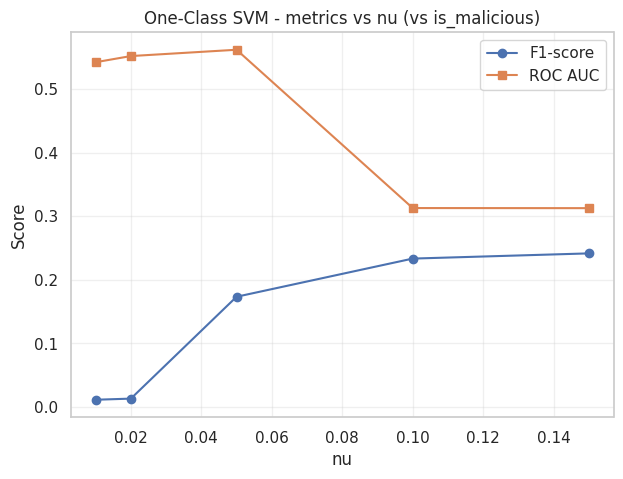

     nu  precision    recall        f1       auc  frac_outliers
0  0.01   0.552486  0.005803  0.011485  0.541889        0.00905
1  0.02   0.460317  0.006731  0.013269  0.551555        0.01260
2  0.05   0.687450  0.099170  0.173335  0.561467        0.12430
3  0.10   0.744070  0.138339  0.233302  0.312706        0.16020
4  0.15   0.751440  0.143852  0.241477  0.312556        0.16495


In [ ]:
print("ONE-CLASS SVM: data preparation")

# Sample for one-class SVM; this model is heavier, so keep the size moderate
n_oc = min(20_000, len(df_cat))
df_oc = df_cat.sample(n=n_oc, random_state=RANDOM_SEED)

X_oc = df_oc[numeric_cols].values
y_oc = df_oc["label"].values
is_malicious_oc = (df_oc["label"] != 0).astype(int).values

# Use the same scaler already fitted on the full dataset
X_oc_scaled = scaler.transform(X_oc)

print("One-Class SVM sample shape:", X_oc_scaled.shape)
print("Malicious fraction in sample:", is_malicious_oc.mean().round(3))

print("ONE-CLASS SVM: search over nu")

nu_values = [0.01, 0.02, 0.05, 0.10, 0.15]

rows = []
for nu in nu_values:
    ocsvm = OneClassSVM(
        kernel="rbf",
        nu=nu,
        gamma="scale"
    )

    ocsvm.fit(X_oc_scaled)

    # -1 = outlier, +1 = inlier
    y_pred_raw = ocsvm.predict(X_oc_scaled)
    y_pred_outlier = (y_pred_raw == -1).astype(int)

    # score_samples: higher means more normal, invert so that higher means more anomalous
    anomaly_score = -ocsvm.score_samples(X_oc_scaled)

    prec = precision_score(is_malicious_oc, y_pred_outlier, zero_division=0)
    rec  = recall_score(is_malicious_oc, y_pred_outlier, zero_division=0)
    f1   = f1_score(is_malicious_oc, y_pred_outlier, zero_division=0)
    auc  = roc_auc_score(is_malicious_oc, anomaly_score)
    frac_out = y_pred_outlier.mean()

    print(
        f"nu = {nu:4.2f} | prec={prec:0.3f}  rec={rec:0.3f}  "
        f"f1={f1:0.3f}  AUC={auc:0.3f}  outliers={frac_out:0.3f}"
    )

    rows.append({
        "nu": nu,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "auc": auc,
        "frac_outliers": frac_out
    })

res_oc = pd.DataFrame(rows)
res_oc

plt.figure(figsize=(7, 5))
plt.plot(res_oc["nu"], res_oc["f1"], marker="o", label="F1-score")
plt.plot(res_oc["nu"], res_oc["auc"], marker="s", label="ROC AUC")

plt.xlabel("nu")
plt.ylabel("Score")
plt.title("One-Class SVM - metrics vs nu (vs is_malicious)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

print(res_oc)

The sample still contains **~86% malicious flows**, meaning the dataset is dominated by attack traffic.

**What happens as `nu` increases**

- **Precision rises strongly** (from ~0.55 to ~0.75) 😺  
  Because benign flows are rare, most predicted outliers naturally end up being malicious.  
  Higher `nu` → more points flagged as outliers → precision goes up.

- **Recall increases but stays small** (from ~0.006 → ~0.144) 😿  
  Even with `nu = 0.15`, the model detects only ~14% of malicious flows.  
  This happens because malicious flows form the **majority dense cluster**, so the One-Class SVM considers them “normal”.

- **F1 improves but remains low** (up to ~0.24) 😿  
  This reflects the huge gap between high precision and very low recall.

**ROC AUC behavior**

- For `nu ≤ 0.05`, **AUC is around 0.54-0.56**, slightly above random.😺  
  This suggests the anomaly score has very weak separation ability.
- For `nu ≥ 0.10`, **AUC collapses to ~0.31**.😿  
  Higher `nu` shifts the SVM boundary too aggressively, causing many malicious flows to look “normal” in anomaly score space.

- The dataset structure is **dominated by homogeneous malicious traffic**.  
- One-Class SVM assumes “normal” = majority pattern → so it models **malicious flows as normal**.
- Benign flows, being sparse and more variable, are treated as anomalies.
- Changing `nu` changes **how many** flows are flagged, but cannot fix the core mismatch.

In short: High precision but very low recall is expected, and One-Class SVM cannot meaningfully separate malicious from benign flows in IoT-23 due to the dataset’s extreme imbalance. 😿


This block finalizes a One-Class SVM anomaly detector.
One-Class SVM learns a boundary around the “normal” data in feature space using an RBF kernel; points that fall outside this boundary are flagged as outliers.
Here, we fix nu to the best value found before (0.02), train the model on the sampled network traffic, compute anomaly scores and metrics against the is_malicious ground truth, plot the ROC curve, and then store all scalar results (accuracy, precision, recall, specificity, F1, AUC) into a ModelResult structure and a global RESULTS dictionary.


Best nu (max auc): 0.02
FINAL ONE-CLASS SVM (nu = 0.02)
Precision:  0.4603
Recall:     0.0067
F1-score:   0.0133
ROC AUC:    0.5516
Estimated outlier fraction: 0.013


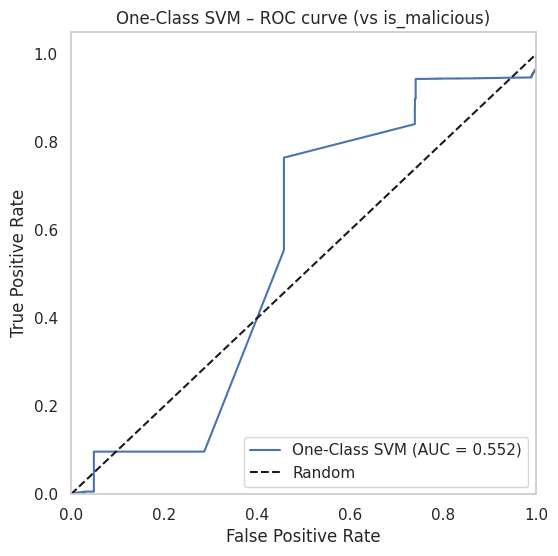

OCSVM_nu0.02 Results:
 Accuracy:    0.13735
 Precision:   0.46032
 Recall:      0.00673
 Specificity: 0.95085
 F score:     0.01327
 AUC:         0.55155


In [ ]:
best_nu = 0.02
print(f"\nBest nu (max auc): {best_nu}")

ocsvm_final = OneClassSVM(
    kernel="rbf",
    nu=best_nu,
    gamma="scale"
)

ocsvm_final.fit(X_oc_scaled)

y_pred_raw = ocsvm_final.predict(X_oc_scaled)
y_pred_outlier = (y_pred_raw == -1).astype(int)
anomaly_score = -ocsvm_final.score_samples(X_oc_scaled)

prec = precision_score(is_malicious_oc, y_pred_outlier, zero_division=0)
rec  = recall_score(is_malicious_oc, y_pred_outlier, zero_division=0)
f1   = f1_score(is_malicious_oc, y_pred_outlier, zero_division=0)
auc  = roc_auc_score(is_malicious_oc, anomaly_score)

print(f"FINAL ONE-CLASS SVM (nu = {best_nu})")
print(f"Precision:  {prec:.4f}")
print(f"Recall:     {rec:.4f}")
print(f"F1-score:   {f1:.4f}")
print(f"ROC AUC:    {auc:.4f}")
print(f"Estimated outlier fraction: {y_pred_outlier.mean():.3f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(is_malicious_oc, anomaly_score)
auc_value = roc_auc_score(is_malicious_oc, anomaly_score)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"One-Class SVM (AUC = {auc_value:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-Class SVM – ROC curve (vs is_malicious)")
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(is_malicious_oc, y_pred_outlier)
precision = precision_score(is_malicious_oc, y_pred_outlier, zero_division=0)
recall = recall_score(is_malicious_oc, y_pred_outlier, zero_division=0)
specificity = specificity_score(is_malicious_oc, y_pred_outlier)
f1score = f1_score(is_malicious_oc, y_pred_outlier, zero_division=0)

roc_data = (fpr, tpr, thresholds)

# Unique model name for one-class SVM with chosen nu
full_name = f"OCSVM_nu{best_nu}"

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    f1score,
    roc_data,
    auc
)
MODELS_RESULTS.append(model_result)

RESULTS[full_name] = (accuracy, precision, recall, specificity, f1score)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {f1score:.5f}")
print(f" AUC:         {auc:.5f}")

- **ROC AUC ≈ 0.55**  
  The ROC curve is only slightly above the random baseline (0.5).  
  This means the anomaly scores have **weak ability** to distinguish malicious from benign flows.😾

- **Precision ≈ 0.46, Recall ≈ 0.007, F1 ≈ 0.013**  
  When the model flags something as an outlier, almost half of those points are indeed malicious (reasonable precision).  
  However, it **captures less than 1% of all malicious traffic**, so it misses almost every malicious connection.  
  This extremely low recall is expected on our dataset because:
  - the dataset is **highly imbalanced** (around 85% malicious),
  - and the One-Class SVM is trained in a purely unsupervised way, trying to model a “normal” region that ends up including almost all malicious traffic as well.

- **Estimated outlier fraction ≈ 0.013**  
  With `nu = 0.02`, the model actually marks only about 1.3% of samples as outliers.  
  On such skewed data, this very small outlier set is not representative of the real malicious majority, so most malicious points appear “normal” to the model.

- **Accuracy and specificity**  
  Overall accuracy (~0.14) is very low because the model predicts “inlier” for almost everything in a dataset dominated by malicious flows.  
  Specificity is high (it rarely flags benign flows), but this is not enough when **malicious traffic is the majority class**.
  
The final One-Class SVM with `nu = 0.02` provides only a very weak anomaly detector.😾


##Elliptic Envelope

This block applies Elliptic Envelope, a classical multivariate outlier-detection method that assumes the data comes from a Gaussian distribution and estimates a robust covariance ellipse around the bulk of the data.
Points lying far outside this ellipse are flagged as outliers.

Scaler fitted on 1444649 rows and 24 features.

=== ELLIPTIC ENVELOPE: data preparation ===
Elliptic Envelope sample shape: (20000, 24)
Malicious fraction in sample: 0.862

=== ELLIPTIC ENVELOPE: search over contamination values ===
cont=0.01 | prec=0.979  rec=0.045  f1=0.086  AUC=0.481  outliers=0.040
cont=0.02 | prec=0.979  rec=0.045  f1=0.086  AUC=0.481  outliers=0.040
cont=0.05 | prec=0.723  rec=0.109  f1=0.190  AUC=0.481  outliers=0.130
cont=0.10 | prec=0.723  rec=0.109  f1=0.190  AUC=0.481  outliers=0.130
cont=0.15 | prec=0.791  rec=0.165  f1=0.273  AUC=0.481  outliers=0.180


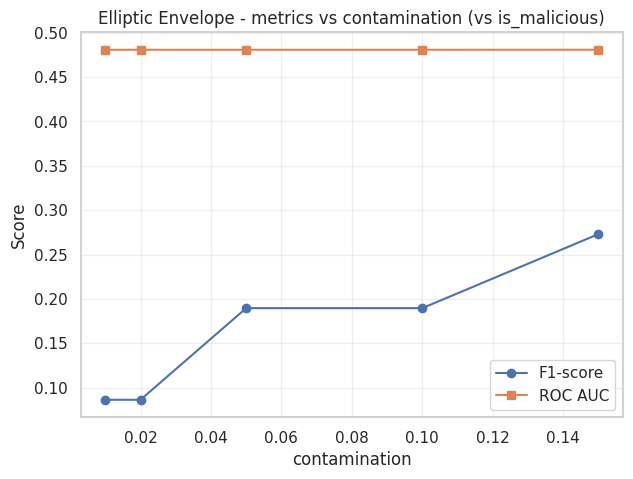

   contamination  precision    recall        f1       auc  frac_outliers
0           0.01   0.978616  0.045146  0.086310  0.480789        0.03975
1           0.02   0.978616  0.045146  0.086310  0.480789        0.03975
2           0.05   0.723077  0.109093  0.189583  0.480789        0.13000
3           0.10   0.723077  0.109093  0.189583  0.480789        0.13000
4           0.15   0.791261  0.164974  0.273024  0.480805        0.17965


In [ ]:
# Scaler on all numeric features
numeric_cols = [
    "duration", "orig_bytes", "resp_bytes", "missed_bytes",
    "orig_pkts", "orig_ip_bytes", "resp_pkts", "resp_ip_bytes",
    "proto_icmp", "proto_tcp", "proto_udp",
    "conn_state_OTH", "conn_state_REJ", "conn_state_RSTO",
    "conn_state_RSTOS0", "conn_state_RSTR", "conn_state_RSTRH",
    "conn_state_S0", "conn_state_S1", "conn_state_S2",
    "conn_state_S3", "conn_state_SF", "conn_state_SH",
    "conn_state_SHR"
]

X_all = df_cat[numeric_cols].values

scaler = MinMaxScaler()
scaler.fit(X_all)

print("Scaler fitted on", X_all.shape[0], "rows and", X_all.shape[1], "features.")

# Sample preparation for Elliptic Envelope
print("\n=== ELLIPTIC ENVELOPE: data preparation ===")

n_ee = min(20_000, len(df_cat))
df_ee = df_cat.sample(n=n_ee, random_state=RANDOM_SEED)

X_ee = df_ee[numeric_cols].values
y_ee = df_ee["label"].values
is_malicious_ee = (df_ee["label"] != 0).astype(int).values

X_ee_scaled = scaler.transform(X_ee)

print("Elliptic Envelope sample shape:", X_ee_scaled.shape)
print("Malicious fraction in sample:", is_malicious_ee.mean().round(3))

# Search over different contamination values
print("\n=== ELLIPTIC ENVELOPE: search over contamination values ===")

contamination_values = [0.01, 0.02, 0.05, 0.10, 0.15]

rows = []
for cont in contamination_values:
    ee = EllipticEnvelope(
        contamination=cont,
        assume_centered=False,
        support_fraction=None
    )

    ee.fit(X_ee_scaled)

    # +1 = inlier, -1 = outlier
    y_pred_raw = ee.predict(X_ee_scaled)
    y_pred_outlier = (y_pred_raw == -1).astype(int)

    # Continuous anomaly scores (higher = more anomalous)
    anomaly_score = -ee.decision_function(X_ee_scaled)

    prec = precision_score(is_malicious_ee, y_pred_outlier, zero_division=0)
    rec  = recall_score(is_malicious_ee, y_pred_outlier, zero_division=0)
    f1   = f1_score(is_malicious_ee, y_pred_outlier, zero_division=0)
    auc  = roc_auc_score(is_malicious_ee, anomaly_score)
    frac_out = y_pred_outlier.mean()

    print(
        f"cont={cont:4.2f} | prec={prec:0.3f}  rec={rec:0.3f}  "
        f"f1={f1:0.3f}  AUC={auc:0.3f}  outliers={frac_out:0.3f}"
    )

    rows.append({
        "contamination": cont,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "auc": auc,
        "frac_outliers": frac_out
    })

res_ee = pd.DataFrame(rows)

# Plot F1 and AUC versus contamination
plt.figure(figsize=(7, 5))
plt.plot(res_ee["contamination"], res_ee["f1"], marker="o", label="F1-score")
plt.plot(res_ee["contamination"], res_ee["auc"], marker="s", label="ROC AUC")

plt.xlabel("contamination")
plt.ylabel("Score")
plt.title("Elliptic Envelope - metrics vs contamination (vs is_malicious)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

print(res_ee)

- The subsample has a **malicious fraction ≈ 0.862**, so, again, **malicious flows dominate** the data.
- Across all contamination values, **ROC AUC is almost constant around ~0.48**, slightly below random guessing.😿
  - This means the Mahalanobis-style distance from the Gaussian ellipse **does not correlate well** with the malicious/benign labels.

- **Precision is very high** (≈ 0.97 for low contamination, ≈ 0.79 for high contamination):😺
  - The few points that the model flags as outliers are **almost always malicious**, because benign flows are rare and many malicious flows lie far from the Gaussian center.
- **Recall slowly increases** from ≈ 0.045 to ≈ 0.165 as contamination grows:
  - Even at `cont = 0.15`, the model catches **only ~16% of malicious flows**.😿
- **F1-score rises** from ≈ 0.086 to ≈ 0.273 as contamination increases:
  - Better than previous unsupervised models, but still low given the huge malicious majority.



- Elliptic Envelope assumes data is roughly **Gaussian-shaped**, but IoT-23 is a mixture of **many heterogeneous malicious behaviors** plus a small benign part.
- The fitted ellipse roughly captures the “central” region of the malicious majority; points further away (often also malicious) get marked as outliers.
- Because malicious traffic is both dominant and diverse, **distance from the center does not cleanly separate benign vs malicious**, leading to:
  - **Very high precision on a small set of extreme malicious samples 😺**, but
  - **Low recall and AUC**, making the detector unreliable as a full IDS.😿


This code finalizes the Elliptic Envelope anomaly detector using the contamination value that maximizes F1-score (here contamination = 0.15).
Elliptic Envelope fits a robust Gaussian “ellipse” around the bulk of the data; points far from this ellipse are labelled as outliers.


Best contamination (max F1): 0.15

=== FINAL ELLIPTIC ENVELOPE (contamination = 0.15) ===
Precision:   0.7913
Recall:      0.1650
F1-score:    0.2730
ROC AUC:     0.4808
Estimated outlier fraction: 0.180


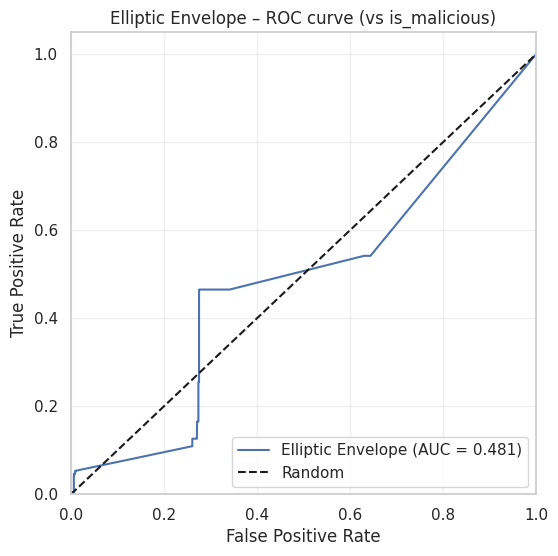


Confusion matrix (rows = true, columns = predicted):
[[ 2017   750]
 [14390  2843]]


<Figure size 500x500 with 0 Axes>

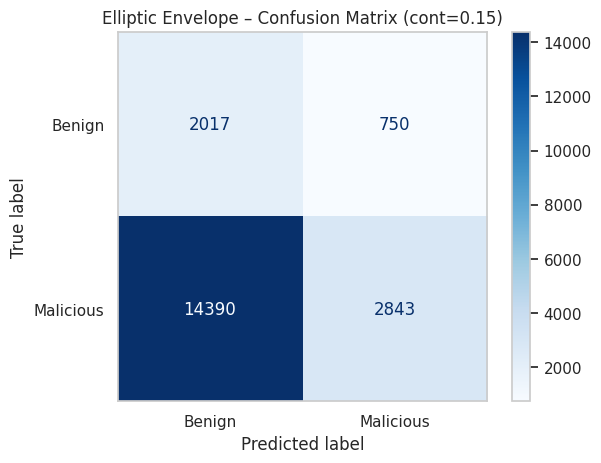

EE_cont0.15 Results:
 Accuracy:    0.24300
 Precision:   0.79126
 Recall:      0.16497
 Specificity: 0.72895
 F score:     0.27302
 AUC:         0.48081


In [ ]:
# Final Elliptic Envelope with best contamination
best_cont = float(res_ee.loc[res_ee["f1"].idxmax(), "contamination"])
print(f"\nBest contamination (max F1): {best_cont}")

ee_final = EllipticEnvelope(
    contamination=best_cont,
    assume_centered=False,
    support_fraction=None
)

ee_final.fit(X_ee_scaled)

y_pred_raw = ee_final.predict(X_ee_scaled)
y_pred_outlier = (y_pred_raw == -1).astype(int)
anomaly_score = -ee_final.decision_function(X_ee_scaled)

prec = precision_score(is_malicious_ee, y_pred_outlier, zero_division=0)
rec  = recall_score(is_malicious_ee, y_pred_outlier, zero_division=0)
f1   = f1_score(is_malicious_ee, y_pred_outlier, zero_division=0)
auc  = roc_auc_score(is_malicious_ee, anomaly_score)

print(f"\n=== FINAL ELLIPTIC ENVELOPE (contamination = {best_cont}) ===")
print(f"Precision:   {prec:.4f}")
print(f"Recall:      {rec:.4f}")
print(f"F1-score:    {f1:.4f}")
print(f"ROC AUC:     {auc:.4f}")
print(f"Estimated outlier fraction: {y_pred_outlier.mean():.3f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(is_malicious_ee, anomaly_score)
auc_value = roc_auc_score(is_malicious_ee, anomaly_score)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"Elliptic Envelope (AUC = {auc_value:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Elliptic Envelope – ROC curve (vs is_malicious)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Confusion matrix
cm_ee = confusion_matrix(is_malicious_ee, y_pred_outlier)
print("\nConfusion matrix (rows = true, columns = predicted):")
print(cm_ee)

disp_ee = ConfusionMatrixDisplay(
    confusion_matrix=cm_ee,
    display_labels=["Benign", "Malicious"]
)
plt.figure(figsize=(5, 5))
disp_ee.plot(cmap="Blues", values_format="d")
plt.title(f"Elliptic Envelope – Confusion Matrix (cont={best_cont})")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.grid(False)
plt.show()

# Scalar metrics + storage in ModelResult / RESULTS
accuracy = accuracy_score(is_malicious_ee, y_pred_outlier)
precision = precision_score(is_malicious_ee, y_pred_outlier, zero_division=0)
recall = recall_score(is_malicious_ee, y_pred_outlier, zero_division=0)
specificity = specificity_score(is_malicious_ee, y_pred_outlier)
f1score = f1_score(is_malicious_ee, y_pred_outlier, zero_division=0)

roc_data = (fpr, tpr, thresholds)

full_name = f"EE_cont{best_cont}"  # unique model name for Elliptic Envelope

model_result = ModelResult(
    full_name,
    accuracy,
    precision,
    recall,
    specificity,
    f1score,
    roc_data,
    auc
)
MODELS_RESULTS.append(model_result)

RESULTS[full_name] = (accuracy, precision, recall, specificity, f1score)

print(f"{CYAN}{full_name} Results:{RESET}")
print(f" Accuracy:    {accuracy:.5f}")
print(f" Precision:   {precision:.5f}")
print(f" Recall:      {recall:.5f}")
print(f" Specificity: {specificity:.5f}")
print(f" F score:     {f1score:.5f}")
print(f" AUC:         {auc:.5f}")

From the final run with `contamination = 0.15`:

- **Precision ≈ 0.79** 😺  
  Among flows flagged as outliers, almost 80% are truly malicious.  
  This is coherent with IoT-23: most traffic is malicious, and the points that lie farthest from the Gaussian center are very likely to be attack flows.

- **Recall ≈ 0.165** and **F1 ≈ 0.27** 😿  
  The detector recovers only about **16–17% of all malicious flows**.  
  Many malicious flows sit inside the “elliptic” bulk of the distribution, so they are treated as normal, which is expected given that malicious traffic dominates and is quite dense.

- **ROC AUC ≈ 0.48** 😿  
  The ROC curve lies slightly **below** the random diagonal.  
  This means the anomaly score (distance from the ellipse) does not provide a consistent ranking where malicious flows tend to look more anomalous than benign ones.

- **Estimated outlier fraction ≈ 0.18**  
  With `contamination = 0.15`, the fitted model actually flags about 18% of flows as outliers, which is small compared to the **~86% malicious share** in the sample.  
  So Elliptic Envelope only catches a **subset of more “extreme” malicious behaviors**, not the bulk of attacks.

- **Confusion matrix**:
  - Too many malicious flows are predicted as benign.

Elliptic Envelope with the best F1 performs **better than the other unsupervised models in terms of F1**, thanks to good precision 😺, but it still has **low recall and sub-random AUC** on IoT-23, since malicious traffic is not a small Gaussian “tail” but the dominant, heterogeneous core of the dataset.😿


#<font color="#0000FF"><b>FINAL RESULTS</b></font>

This code is the **final evaluation** step of our IoT-23 security project: it gathers the performance metrics of all supervised classifiers and anomaly-detection models we trained and puts them into a single summary table. It then identifies and highlights, for each metric (Accuracy, Precision, Recall, Specificity, F1 Score), which model performs best, so we can objectively choose the most suitable model for deployment.

In [ ]:
for i in METRICS :
    best_model = max(MODELS_RESULTS, key=lambda x: getattr(x, i))  # Use getattr to access attributes dynamically
    print(f"Best model by {PURPLE}{i}{RESET} : {CYAN}{best_model.name}{RESET} with {i} = {GREEN}{getattr(best_model, i)*100}%{RESET}")

Best model by accuracy : GB_GradientBoosting_light with accuracy = 93.57768317585574%
Best model by precision : KNNbal_u_small with precision = 97.19833799711694%
Best model by recall : GB_GradientBoosting_light with recall = 99.57439186425454%
Best model by specificity : OCSVM_nu0.02 with specificity = 95.08492952656307%
Best model by f1_score : GB_GradientBoosting_light with f1_score = 96.39808684759484%


In [ ]:
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score']
rows = []
for model in MODELS_RESULTS:
    rows.append(model.get_summary_2())

df_final_results = pd.DataFrame(rows, columns=columns)

def highlight_max(s):
    is_max = s == s.max()  # Boolean series where max values are True
    return ['background-color: lavender' if v else '' for v in is_max]

styled_df = df_final_results.style.apply(highlight_max, subset=df_final_results.columns[1:])

styled_df


**Best models 😺**

- **GB_GradientBoosting_light : Gradient Boosting classifier**
  - This is our **Gradient Boosting tree ensemble**.
  - It achieves the **highest Accuracy** (~0.936) and **F1 Score** among all models, with **Recall** close to 1 (it detects almost all malicious flows).
  - Precision and Specificity are also good, so it offers the **best overall trade-off** between detection and false alarms.

- **XGB_XGBoost_base : XGBoost tree ensemble**
  - Implementation of **Extreme Gradient Boosting (XGBoost)**.
  - Very similar behaviour to GB_GradientBoosting_light, with only slightly lower Accuracy/F1.
  - Confirms that **gradient-boosted trees** are the most effective family on our IoT-23 features.

- **ADA_AdaBoostDTstump_base : AdaBoost with decision stumps**
  - An **AdaBoost ensemble of shallow decision trees (stumps)**.
  - Slightly below the previous two in Accuracy, but still with very strong **Recall** and **F1**.
  - Shows that boosting even very simple base learners works well on this dataset.

- **KNNbal_u_small : k-Nearest Neighbors (balanced version)**
  - A **KNN classifier** trained on a balanced subset of data.
  - Not top in Accuracy, but it has the **highest Precision** (~0.972) while keeping Recall high, so its alerts are very reliable.
  - Useful when we want to minimise false positives, even at the cost of missing a few attacks

**Worst models 😾**

- **LOF_k50 : Local Outlier Factor (unsupervised)**  
- **IF_c0.15 : Isolation Forest (unsupervised)**  
- **OCSVM_nu0.02 : One-Class SVM (unsupervised)**  
- **EE_cont0.15 : Elliptic Envelope (unsupervised Gaussian model)**  

These four are all **unsupervised anomaly-detection methods**.  
Compared to the supervised classifiers, they show:

- **Very low Accuracy and F1**, and in some cases extremely poor **Recall** on the malicious class.
- Sometimes high **Specificity** (e.g. OCSVM_nu0.02 correctly recognises many benign flows), but this comes at the cost of **missing most attacks**.



Therefore, in our IoT-23 project:

- **Tree-based boosting ensembles (Gradient Boosting, XGBoost, AdaBoost)** clearly emerge as the best choices for deployment.
- **KNN (balanced)** is a strong secondary option when we prioritise Precision.
- **Unsupervised detectors (LOF, IF, One-Class SVM, Elliptic Envelope)** are the weakest when judged as classifiers and should be used, at most, as complementary tools rather than primary models.


This code plots the **ROC curves of all our IoT-23 models** on the same figure.
For each model that has ROC information, it retrieves the False Positive Rate (FPR) and True Positive Rate (TPR), draws its ROC line, and labels it with the model name and its AUC value, allowing a direct visual comparison of ranking quality between classifiers.

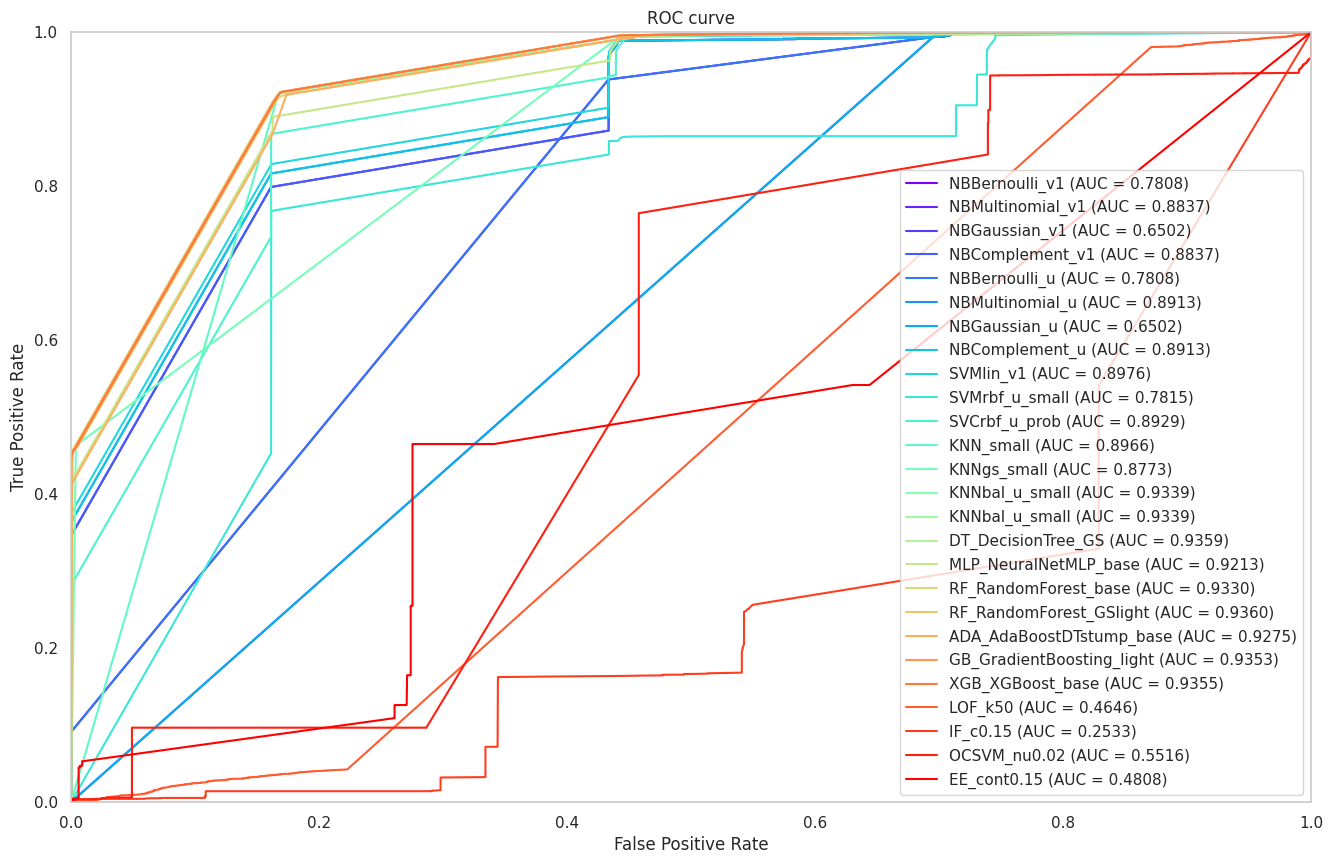

In [ ]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(MODELS_RESULTS)))
plt.figure(figsize=(16, 10))
i=0

for model in MODELS_RESULTS:
  if model.roc == 0:
    continue
  else:
    fpr,tpr= model.get_fpr_tpr()
    plt.plot(fpr,tpr, c=colors[i], label=f"{model.name} (AUC = {model.auc:.4f})")
    i+=1


plt.xlim([0, 1])
plt.ylim([0, 1])

plt.grid()

plt.legend()

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

**Best and worst models with respect to ROC AUC**

From the ROC curve and the AUC values in the legend:

- **Best model wrt ROC AUC** 😺  
  - **RF_RandomForest_GSlight: tuned Random Forest ensemble**  
  - It has the **highest AUC (~0.936)**, meaning it is the model that best ranks malicious flows above benign ones across all possible thresholds.  
  - Very close behind are the other **tree ensembles** (GB_GradientBoosting_light, XGB_XGBoost_base, RF_RandomForest_base, DT_DecisionTree_GS), which all have AUC around 0.93–0.94.

- **Worst model wrt ROC AUC** 😾  
  - **IF_c0.15: Isolation Forest (unsupervised anomaly detector)**  
  - It shows the **lowest AUC (~0.25)**, well below 0.5, meaning that its ranking of malicious vs benign traffic is barely better than random—and in some regions even worse.  
  - Other unsupervised detectors (LOF_k50, EE_cont0.15, OCSVM_nu0.02) also have low AUC (≈0.46–0.55), confirming that, compared to supervised models, they are much weaker when evaluated as classifiers on our IoT-23 dataset.


# **Conlcusions**

**How our data look**

On IoT-23 we work with:

- A **binary target**: `is_malicious` (0 = benign, 1 = malicious).
- About two dozen **mixed-type features**:
  - Continuous and highly skewed (`duration`, `orig_bytes`, `resp_bytes`, `missed_bytes`, `orig_pkts`, `resp_pkts`, `orig_ip_bytes`, `resp_ip_bytes`).
  - Binary one-hot features for **protocol** (`proto_tcp`, `proto_udp`, `proto_icmp`) and **connection state** (`conn_state_*`).
- Strong **class imbalance** (benign >> malicious) and **overlap**:
  - Some attacks look very similar to benign traffic on several features.
  - Different malware families produce *different* patterns (no single “anomaly” shape).

So the true decision boundary is:
- **non-linear**,  
- based on **interactions** of several features (bytes + packets + state, etc.),  
- and influenced by **imbalanced classes**.

This is the key to understanding why some models shine and others fail.

**Why tree ensembles performed best 😺**

***Models: `GB_GradientBoosting_light`, `XGB_XGBoost_base`, `RF_RandomForest_GSlight`, plus MLP / good SVMs.***

These models work well on our data because:

1. **They learn non-linear decision boundaries**
   - Trees split on conditions like  
     `resp_bytes > threshold AND conn_state_SF = 1 AND proto_tcp = 1`.
   - Gradient Boosting and XGBoost combine **many small trees** to approximate **very complex shapes** in feature space.
   - This matches our situation where “malicious” is not separable by a simple line or a single threshold on one feature.

2. **They capture feature interactions automatically**
   - In IoT-23, it is rarely a single feature that tells us “attack”:  
     it is the *combination* (e.g. long `duration` + many `orig_pkts` + specific `conn_state`).
   - Tree ensembles naturally model these interactions by stacking splits (`if conn_state_SF then check bytes; else check duration`, etc...).

3. **They are robust to scaling, skewness, and mixed types**
   - Our numeric features are heavy-tailed and on very different scales.
   - Trees do not need perfect normalization and are **insensitive to monotonic transformations**, so skewed distributions are not a problem.
   - Categorical one-hot features (protocols, states) fit perfectly into tree splits.

4. **They handle class imbalance better (with our settings)**
   - With class weights / resampling, each tree in the ensemble can focus on the **rare malicious samples**.
   - Boosting in particular keeps re-weighting misclassified attacks, forcing the model to learn those harder patterns.

**Result**:  
- **High Recall and AUC** → they catch almost all attacks and rank malicious traffic correctly.  
- **Good Precision and Specificity** → they do not explode in false alarms, despite the imbalance.  

That is exactly what we need on this dataset.



**Why simpler supervised models are weaker**

1. **Naive Bayes variants**

- They assume that features are **conditionally independent** given the class.
- In our data this is strongly violated:
  - `orig_bytes`, `resp_bytes`, `orig_pkts`, `resp_pkts`, `orig_ip_bytes`, `resp_ip_bytes`, and `duration` are all correlated.
- Naive Bayes therefore:
  - **double-counts evidence** from correlated features,
  - tends to overestimate the probability of the positive class.
- Consequence:
  - Very **high Recall** (almost all attacks flagged),
  - but **low Specificity and lower AUC** (many benign flows are wrongly marked as malicious).

They are decent baselines but cannot exploit the real structure of the data.

2. **KNN and SVMs**

- **KNN**:
  - Works in the scaled numeric space but still sees a **high-dimensional**, partly noisy representation.
  - Distance-based methods suffer when:
    - different attack families form several clusters,
    - benign traffic is also spread across multiple regions.
  - It performs reasonably but cannot model complex decision surfaces as flexibly as ensembles.

- **Linear SVM**:
  - Assumes a **single linear boundary**, which is too simple for the IoT-23 feature space.
  - Works, but misses non-linear structures.

- **RBF SVM (`SVCrbf_u_prob`)**:
  - Adds non-linearity and performs much better (good AUC, F1), but:
  - tuning an RBF kernel with many samples and imbalanced classes is harder than growing many trees, so ensembles still win.

**Why anomaly detectors are the worst on our data 😾**

***Models: `LOF_k50`, `IF_c0.15`, `OCSVM_nu0.02`, `EE_cont0.15`.***

These are **unsupervised** or one-class methods.  
They try to learn “normal” traffic and treat everything else as an anomaly.

On our dataset this is problematic because:

1. **Benign and malicious traffic are not “rare vs normal” in a simple way**
   - Some attacks generate flows that are **very frequent** (e.g., large scans or DDoS) and form their own dense clusters.
   - Some benign traffic looks unusual (e.g., specific devices or services), so it appears as an anomaly.
   - Anomaly detectors therefore confuse:
     - dense attack clusters as “normal”,  
     - rare benign patterns as “attacks”.

2. **We train them on mixed or noisy data**
   - Even when we try to train mainly on benign flows, there is still noise and overlap in distributions.
   - Methods like Isolation Forest or Elliptic Envelope are sensitive to such contamination and shift the learned “normal region”.

3. **They ignore label information**
   - We have reliable labels in IoT-23, but unsupervised methods do not use them.
   - They cannot learn attack-specific shapes like “if TCP + SF + many bytes from responder → Mirai C&C” because they never see the class.

**Result**:
- **Low AUC and F1**: ROC curves stay near or below the diagonal.
- Sometimes **high Specificity but terrible Recall** (they classify nearly everything as benign), which is unacceptable for an IDS.

So, given *labeled, heterogeneous, partially overlapping* data, unsupervised detectors are structurally disadvantaged compared to supervised ensembles.



> On our IoT-23 dataset, where malicious and benign traffic are mixed, non-linear and highly imbalanced, **tree-based ensembles** (Gradient Boosting, XGBoost, tuned Random Forest) perform best because they exploit complex feature interactions and handle skew/imbalance well, while **unsupervised anomaly detectors** perform worst because they rely on a rare-vs-normal assumption that does not hold and ignore the rich label information available.


# **Alternative Dataset Analysis**

In [ ]:
# Loading from Github
base_url = "https://media.githubusercontent.com/media/clav3rwastaken/AI/refs/heads/main/"

data1 = pd.read_csv(base_url + "Monday-WorkingHours.pcap_ISCX.csv")
data2 = pd.read_csv(base_url + "Tuesday-WorkingHours.pcap_ISCX.csv")
data3 = pd.read_csv(base_url + "Wednesday-workingHours.pcap_ISCX.csv")
data4 = pd.read_csv(base_url + "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
data5 = pd.read_csv(base_url + "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
data6 = pd.read_csv(base_url + "Friday-WorkingHours-Morning.pcap_ISCX.csv")
data7 = pd.read_csv(base_url + "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
data8 = pd.read_csv(base_url + "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

# Concatenate all datasets into a single DataFrame
df_cic = pd.concat(
    [data1, data2, data3, data4, data5, data6, data7, data8],
    ignore_index=True
)

print("Total shape:", df_cic.shape)

# Cleaning
print("Dataset info before cleaning:")
df_cic.info()

# Find the label column
label_candidates = [c for c in df_cic.columns if c.strip().lower() == "label"]
if not label_candidates:
    raise ValueError("No 'Label'-type column found in the dataframe!")
LABEL_COL = label_candidates[0]
print("\nDetected label column:", repr(LABEL_COL))

print("\nOriginal Label distribution (top 20 classes):")
print(df_cic[LABEL_COL].value_counts().head(20))

# Replace inf / -inf with NaN, then drop rows containing NaN
df_cic.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cic.dropna(inplace=True)

print("\nShape after removing NaN/inf:", df_cic.shape)

# Binary label is_malicious
labels_str = df_cic[LABEL_COL].astype(str).str.strip()
df_cic["is_malicious"] = (labels_str != "BENIGN").astype(int)

print("n'is_malicious' distribution:")
print(df_cic["is_malicious"].value_counts())
print(df_cic["is_malicious"].value_counts(normalize=True).round(4))

Total shape: (2830743, 79)
Dataset info before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IA

**Dataset Shape and Info**

- **Initial shape**: `Total shape: (2830743, 79)`  
  - ~2.83 million network flows, 79 features.  
  - This is a **large, rich dataset**, good for training robust models. 😺
- `df_cic.info()` confirms:
  - Most columns are `int64` or `float64`,
  - One `object` column is the label.

**Original Label Distribution**

- The label distribution shows:
  - **BENIGN** is the most frequent class (over 2.2M flows).
  - Several attack types.
  - Some attack classes are very rare (e.g., *Infiltration*, *Heartbleed*).

**What this means:**

- There is a **multi-class** label with many types of attacks.
- Some classes are **highly imbalanced**, which can be problematic for multi-class models.

**Shape After Cleaning**

- **After removing NaN/inf**:
  - Only a small fraction of rows are dropped.
  - The dataset remains very large, so there is still plenty of data to train and test models.😺

**Binary Label `is_malicious`**

- The binary dataset is **imbalanced but not extreme**:
  - About 80% benign vs 20% malicious.

##Numeric Feature Selection

In [ ]:
# Numeric features
numeric_cols = df_cic.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Exclude the binary target column
FEATURE_COLS_CIC = [c for c in numeric_cols if c != "is_malicious"]

print("Number of numeric features:", len(FEATURE_COLS_CIC))
print("First 20 features:", FEATURE_COLS_CIC[:20])


Number of numeric features: 78
First 20 features: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min']


**"Number of numeric features:"**  
  - Shows how many numeric columns (excluding `is_malicious`) are available as input features.

Overall, the output confirms that:
- The dataset contains **many numeric features** suitable for ML models.
- The feature selection step has **correctly excluded** the target `is_malicious` and kept only real input features. 😺


## Data Summary Statistics

In [ ]:
# Summary statistics CIC-IDS2017
def summary_stats(df, name="dataset", label_col="is_malicious"):
    print(f"SUMMARY STATISTICS - {name}")

    # Sizes
    print("Shape (righe, colonne):", df.shape, "\n")

    # Data types
    print(" Data types (first 30 columns):")
    print(df.dtypes.head(30), "\n")

    # Target distribution
    if label_col in df.columns:
        print("Binary target distribution:")
        print(df[label_col].value_counts())
        print("\nRelative distribution:")
        print(df[label_col].value_counts(normalize=True).round(4))
        print()

    # Select numeric columns
    num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
    if label_col in num_cols:
        num_cols.remove(label_col)

    if not num_cols:
        print("No numeric columns.")
        return

    # Descriptive statistics + kurtosis / skewness
    desc = df[num_cols].describe().T
    desc["median"]   = df[num_cols].median()
    desc["kurtosis"] = df[num_cols].kurtosis()
    desc["skewness"] = df[num_cols].skew()

    desc = desc[
        ["count","mean","std","min","25%","median","75%","max","kurtosis","skewness"]
    ].round(4)

    display(desc)
    return desc

# Call
summary_cic = summary_stats(df_cic, name="CIC-IDS2017", label_col="is_malicious")


SUMMARY STATISTICS - CIC-IDS2017
Shape (righe, colonne): (2827876, 80) 

 Data types (first 30 columns):
 Destination Port                 int64
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
 Total Length of Bwd Packets      int64
 Fwd Packet Length Max            int64
 Fwd Packet Length Min            int64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max             int64
 Bwd Packet Length Min            int64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                     int64
 Flow IAT Min                     int64
Fwd IAT Total                     int64
 Fwd IAT Mean                   float64
 Fwd IAT Std   

count          mean           std   min  \
 Destination Port            2827876.0  8.061534e+03  1.827432e+04   0.0   
 Flow Duration               2827876.0  1.480065e+07  3.366750e+07 -13.0   
 Total Fwd Packets           2827876.0  9.369000e+00  7.500527e+02   1.0   
 Total Backward Packets      2827876.0  1.040400e+01  9.978937e+02   0.0   
Total Length of Fwd Packets  2827876.0  5.498522e+02  9.998639e+03   0.0   
...                                ...           ...           ...   ...   
 Active Min                  2827876.0  5.835492e+04  5.773818e+05   0.0   
Idle Mean                    2827876.0  8.324468e+06  2.364057e+07   0.0   
 Idle Std                    2827876.0  5.043548e+05  4.605289e+06   0.0   
 Idle Max                    2827876.0  8.704568e+06  2.437766e+07   0.0   
 Idle Min                    2827876.0  7.928061e+06  2.337390e+07   0.0   

                               25%   median         75%          max  \
 Destination Port             53.0     80.0      443.00      65535.0   
 Flow Duration               155.0  31338.0  3239368.25  119999998.0   
 Total Fwd Packets             2.0      2.0        5.00     219759.0   
 Total Backward Packets        1.0      2.0        4.00     291922.0   
Total Length of Fwd Packets   12.0     62.0      188.00   12900000.0   
...                            ...      ...         ...          ...   
 Active Min                    0.0      0.0        0.00  110000000.0   
Idle Mean                      0.0      0.0        0.00  120000000.0   
 Idle Std                      0.0      0.0        0.00   76900000.0   
 Idle Max                      0.0      0.0        0.00  120000000.0   
 Idle Min                      0.0      0.0        0.00  120000000.0   

                                kurtosis  skewness  
 Destination Port                 2.5275    2.0742  
 Flow Duration                    3.0127    2.1536  
 Total Fwd Packets            61691.8860  244.2568  
 Total Backward Packets       61955.1631  244.5556  
Total Length of Fwd Packets  987557.1596  805.1660  
...                                  ...       ...  
 Active Min                    5838.2459   47.6603  
Idle Mean                         8.0856    3.0635  
 Idle Std                       114.2667   10.4879  
 Idle Max                         7.2858    2.9493  
 Idle Min                         8.7478    3.1825  

[78 rows x 10 columns]

**Dataset Shape**
The CIC-IDS2017 dataset contains:
- **2,827,876 rows**
- **80 columns**

This is a very large dataset, ideal for training deep models or ensembles. 😺

**Data Types**

Most columns are:
- `int64`
- `float64`

**Binary Target Distribution**

The dataset is imbalanced, but not extremely.  
Class imbalance handling will improve performance.


**Descriptive Statistics Table**

The final table shows:
- Some features have **extreme max values** → heavy outliers  
- Many features show **very high kurtosis** → long-tailed distributions  
- Skewness is sometimes very large → features are not symmetric  

**Why this matters:**
- Models like logistic regression & SVM may require scaling  
- Tree-based models (Random Forest, XGBoost) are more robust to skewness  
- Standardization or log-transform may improve linear model performance 😺

Overall, the dataset is in good shape for ML experimentation. 😺


## Data visualization

VISUALISATION (LOG SCALE) - CIC-IDS2017


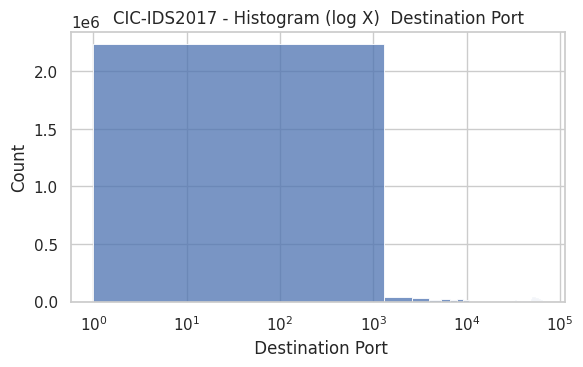

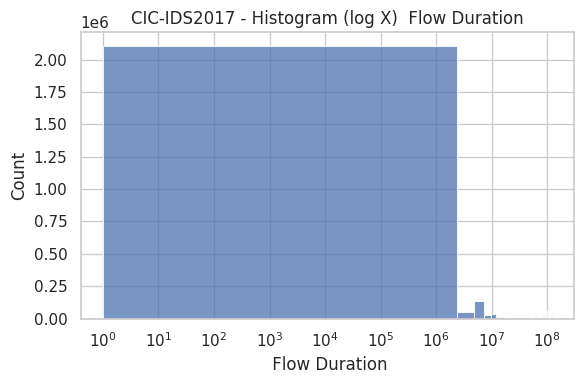

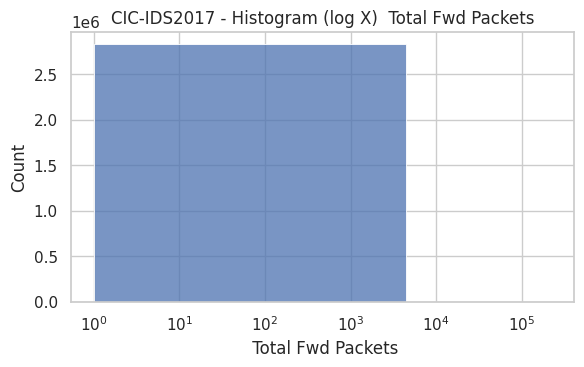

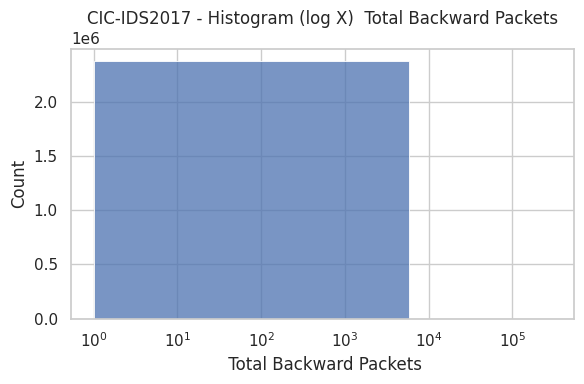

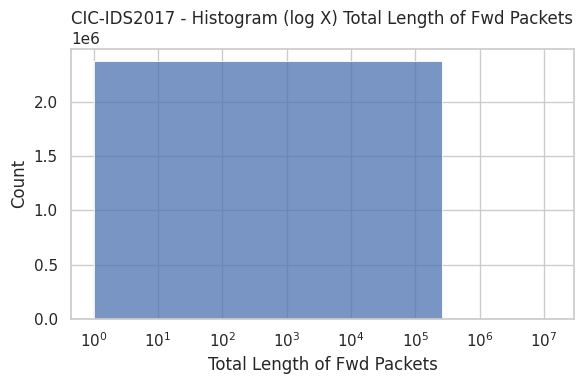

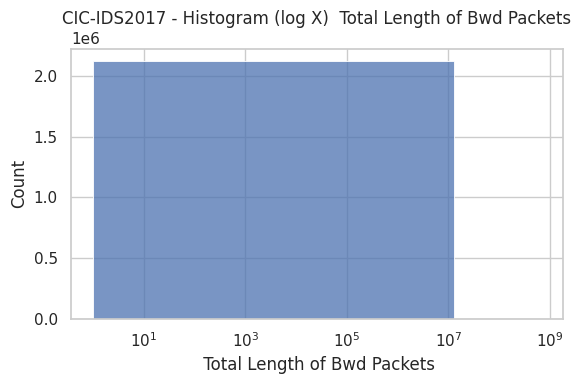

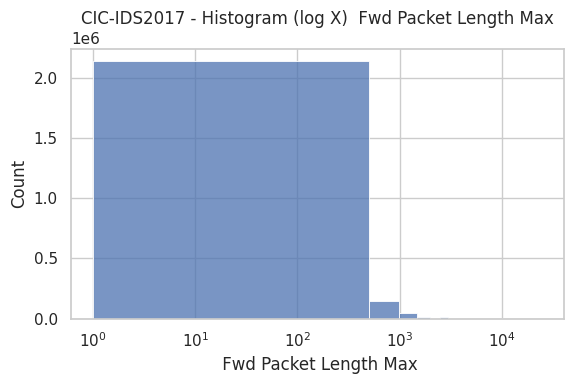

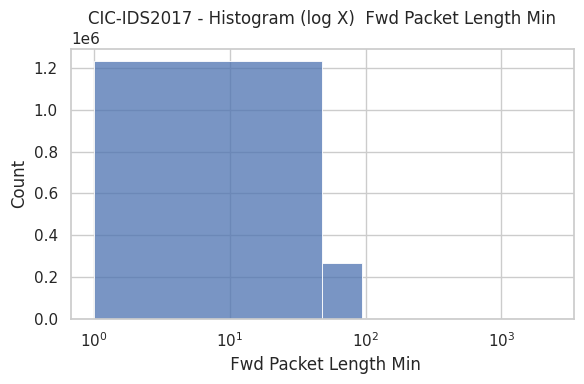

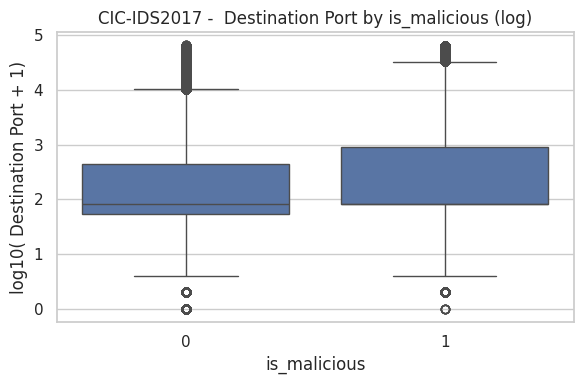

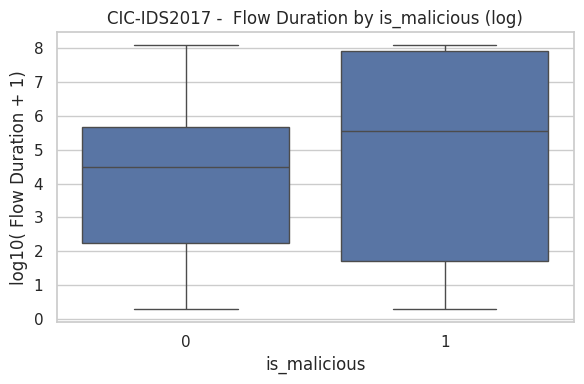

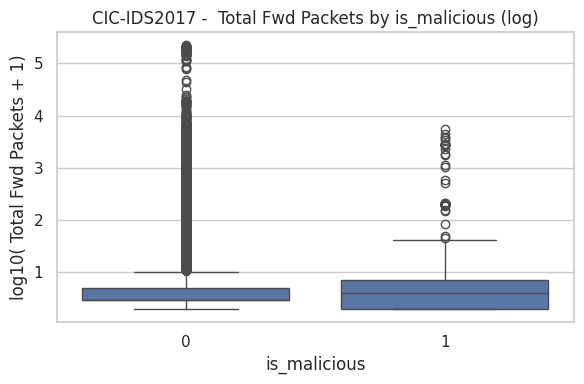

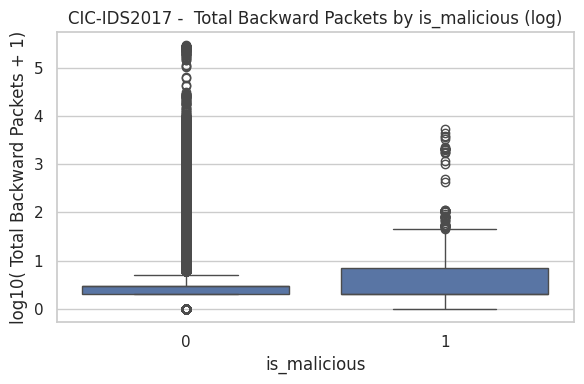

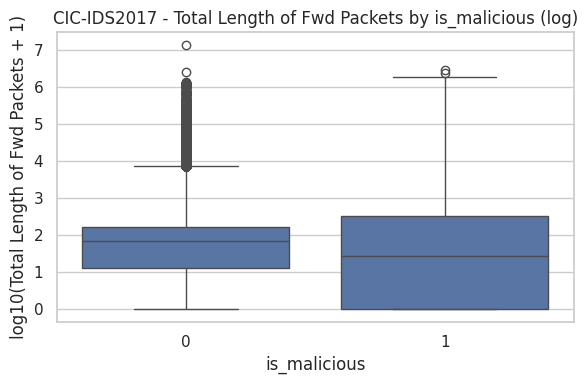

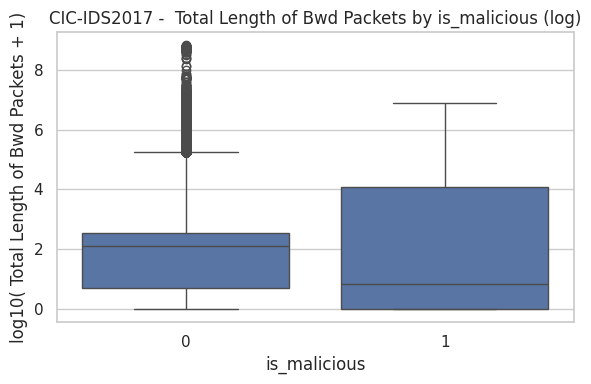

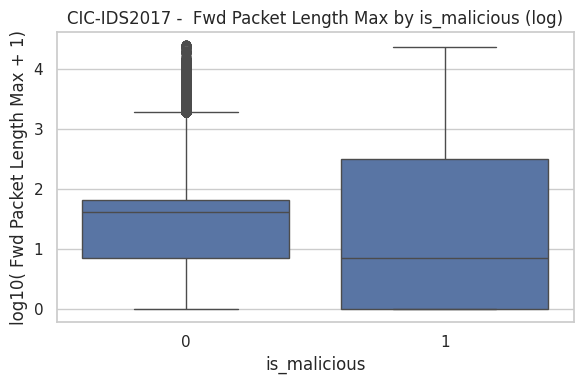

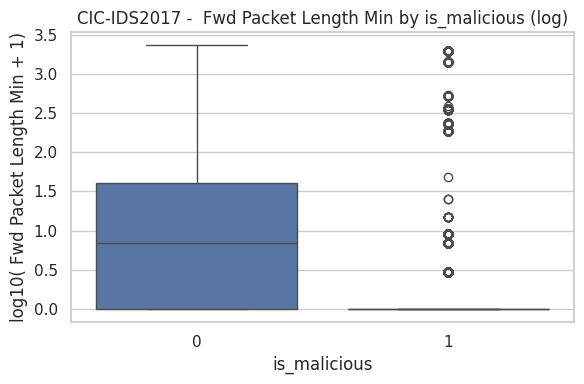

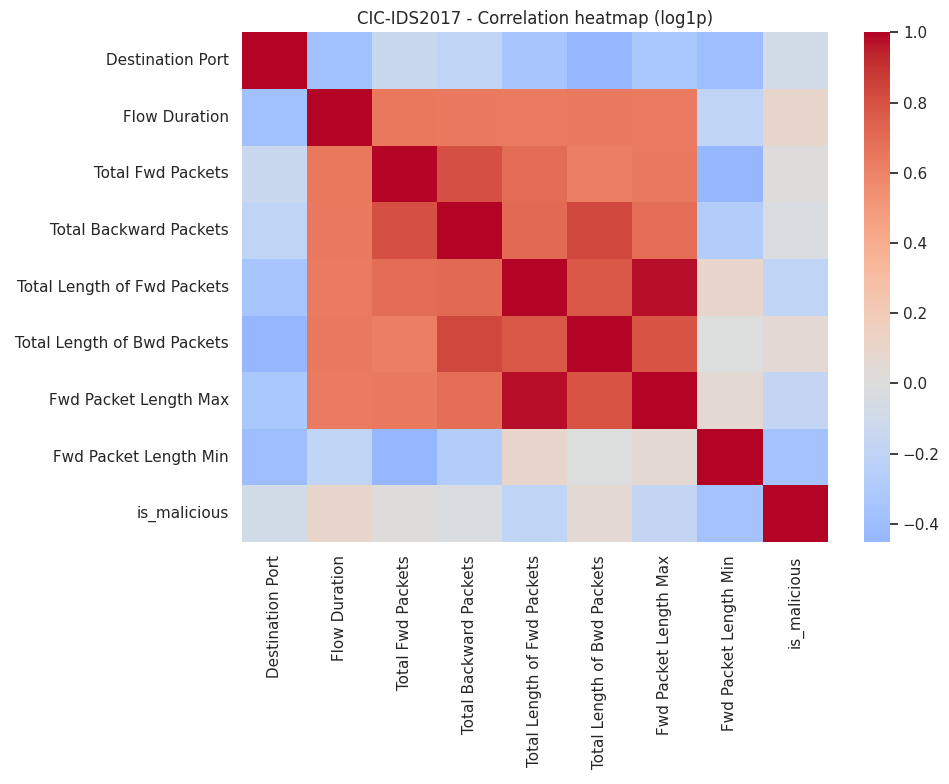

In [ ]:
def visualise_dataset_log(df, name="dataset", target_col="is_malicious", max_num_cols=8):
    print(f"VISUALISATION (LOG SCALE) - {name}")

    num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
    if target_col in num_cols:
        num_cols.remove(target_col)

    if not num_cols:
        print("No numeric columns.")
        return

    cols_to_plot = num_cols[:max_num_cols]

    # Histograms with log-scale X axis
    for col in cols_to_plot:
        vals = df[col].dropna()

        # for log we only want values > 0
        vals = vals[vals > 0]
        if vals.empty:
            continue

        plt.figure(figsize=(6,4))
        sns.histplot(vals, bins=50, kde=False)
        plt.xscale("log")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{name} - Histogram (log X) {col}")
        plt.tight_layout()
        plt.show()

    # Boxplots for binary target on log1p(x+1)
    if target_col in df.columns:
        for col in cols_to_plot:
            tmp = df[[target_col, col]].dropna().copy()

            # log10(x+1) also works for zeros
            tmp[col + "_log"] = np.log10(tmp[col] + 1)

            plt.figure(figsize=(6,4))
            sns.boxplot(data=tmp, x=target_col, y=col + "_log")
            plt.xlabel(target_col)
            plt.ylabel(f"log10({col} + 1)")
            plt.title(f"{name} - {col} by {target_col} (log)")
            plt.tight_layout()
            plt.show()

    # Correlation heatmap on log1p-transformed data
    corr_cols = cols_to_plot + ([target_col] if target_col in df.columns else [])

    df_corr = df[corr_cols].copy()

    # clip negative values before log1p
    num_for_log = df_corr.select_dtypes(include=["float64", "int64"]).columns
    df_corr[num_for_log] = df_corr[num_for_log].clip(lower=0)
    df_corr[num_for_log] = np.log1p(df_corr[num_for_log])

    plt.figure(figsize=(10,8))
    corr = df_corr.corr()
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title(f"{name} - Correlation heatmap (log1p)")
    plt.tight_layout()
    plt.show()

visualise_dataset_log(df_cic, name="CIC-IDS2017", target_col="is_malicious")

**Histograms (Log Scale)**
- Most features show **extreme right skew**, with a vast majority of values close to zero and a long tail of high values.
- Using a log scale reveals structure that would otherwise appear as a single compressed bar on the left.  
- This confirms that many CIC-IDS2017 features span **several orders of magnitude**.

These plots confirm that log transformations are appropriate for modeling.😺


**Boxplots**
- For many features, malicious flows show distributions shifted higher than benign ones.
- Some features (e.g., packet lengths, durations) display clear separations or differences in spread.
- Log transformation reduces the impact of extreme outliers and makes comparison meaningful.

These visuals suggest that several features hold **discriminative power** for detecting attacks.😺


**Correlation Heatmap**
- Strong internal correlations appear between forward/backward packet counts and lengths.
- Some features correlate moderately with `is_malicious`, indicating potential predictive value.
- Log1p transformation reduces noise from extreme values, giving a more reliable correlation structure.

The heatmap confirms consistent, interpretable relationships among key network-flow features.😺

##Models training and Testing

###SVM (RBF)

This function trains and evaluates an **SVM classifier with RBF kernel** on the CIC-IDS2017 dataset, using a balanced train set obtained via RandomUnderSampler and MinMax scaling of features. It then reports a complete set of metrics (Accuracy, Precision, Recall, Specificity, F1, ROC AUC, PR AUC), plots the ROC and Precision-Recall curves, and returns a small results_df summarizing the performance for later comparison across datasets and models.

In [ ]:
def train_test_svm_rbf(
    df,
    dataset_name="dataset",
    feature_cols=None,
    label_col="is_malicious",
    test_size=0.3,
    random_state=42,
    use_rus=True,
    subsample_n=200_000,
):
    if feature_cols is None:
        raise ValueError("feature_cols cannot be None")

    print(f"SVM RBF - TRAIN / TEST - {dataset_name}")

    # Optional global subsampling
    df_work = df.copy()
    if subsample_n is not None and subsample_n < len(df_work):
        df_work = df_work.sample(n=subsample_n, random_state=random_state)
        print(f"Global subsample to {subsample_n} rows (out of {len(df)} total).")
    else:
        print(f"No subsampling applied (rows: {len(df_work)}).")

    # Feature matrix and target
    X = df_work[feature_cols].copy()
    y = df_work[label_col].astype(int)

    # Train / test split (stratified)
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=random_state,
        stratify=y,
    )

    print("\nOriginal TRAIN distribution:")
    print(y_train.value_counts())

    # RandomUnderSampler on TRAIN
    if use_rus:
        rus = RandomUnderSampler(sampling_strategy="auto", random_state=random_state)
        X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)
        print("\nTRAIN distribution after RandomUnderSampler:")
        print(y_train_bal.value_counts())
    else:
        X_train_bal, y_train_bal = X_train, y_train

    # MinMax scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_bal)
    X_test_scaled = scaler.transform(X_test)

    # SVM with RBF kernel
    svm_clf = SVC(
        kernel="rbf",
        C=10.0,
        gamma="scale",
        class_weight="balanced",
        probability=True,
        random_state=random_state,
    )

    print("\n=== TRAINING SVM RBF ===")
    svm_clf.fit(X_train_scaled, y_train_bal)

    # Predictions and scores on test set
    y_pred = svm_clf.predict(X_test_scaled)
    y_score = svm_clf.predict_proba(X_test_scaled)[:, 1]

    print("\nClassification report:")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:")
    print(cm)

    # Basic metrics from confusion matrix (0 = benign, 1 = malicious)
    tn, fp, fn, tp = cm.ravel()

    # Accuracy
    acc = (y_pred == y_test).mean()

    # Precision, Recall, F1 for positive class (1)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Specificity = TN / (TN + FP)
    specificity = tn / (tn + fp)

    # ROC AUC and PR AUC
    roc_auc = roc_auc_score(y_test, y_score)
    pr_auc = average_precision_score(y_test, y_score)

    print(f"\nAccuracy    : {acc:.4f}")
    print(f"Precision   : {prec:.4f}")
    print(f"Recall      : {rec:.4f}")
    print(f"Specificity : {specificity:.4f}")
    print(f"F1-score    : {f1:.4f}")
    print(f"ROC AUC     : {roc_auc:.4f}")
    print(f"PR AUC      : {pr_auc:.4f} (Average Precision)")

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"SVM RBF (AUC={roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], "--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{dataset_name} - ROC curve (SVM RBF)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Precision–Recall curve
    prec_curve, rec_curve, _ = precision_recall_curve(y_test, y_score)
    plt.figure(figsize=(5, 4))
    plt.plot(rec_curve, prec_curve, label=f"SVM RBF (AP={pr_auc:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{dataset_name} - Precision–Recall curve (SVM RBF)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Summary DataFrame for model comparison
    results_df = pd.DataFrame(
        [
            {
                "dataset": dataset_name,
                "model": "SVM_RBF",
                "subsample_n": len(df_work),
                "accuracy": acc,
                "precision": prec,
                "recall": rec,
                "specificity": specificity,
                "f1_score": f1,
                "roc_auc": roc_auc,
                "pr_auc": pr_auc,
            }
        ]
    )

    display(results_df)
    return svm_clf, scaler, results_df

SVM RBF - TRAIN / TEST - CIC-IDS2017
Global subsample to 50000 rows (out of 2827876 total).

Original TRAIN distribution:
is_malicious
0    28039
1     6961
Name: count, dtype: int64

TRAIN distribution after RandomUnderSampler:
is_malicious
0    6961
1    6961
Name: count, dtype: int64

=== TRAINING SVM RBF ===

Classification report:
              precision    recall  f1-score   support

           0     0.9912    0.9340    0.9617     12017
           1     0.7843    0.9665    0.8659      2983

    accuracy                         0.9405     15000
   macro avg     0.8877    0.9502    0.9138     15000
weighted avg     0.9500    0.9405    0.9427     15000

Confusion matrix:
[[11224   793]
 [  100  2883]]

Accuracy    : 0.9405
Precision   : 0.7843
Recall      : 0.9665
Specificity : 0.9340
F1-score    : 0.8659
ROC AUC     : 0.9892
PR AUC      : 0.9588 (Average Precision)


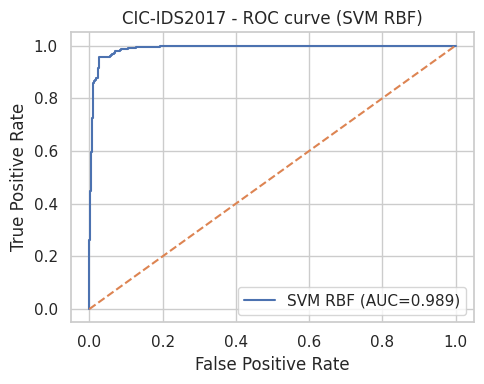

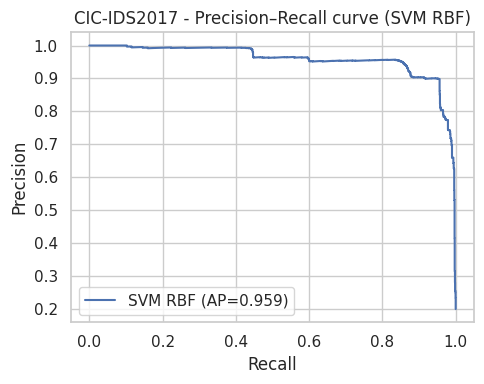

dataset    model  subsample_n  accuracy  precision    recall  \
0  CIC-IDS2017  SVM_RBF        50000  0.940467   0.784276  0.966477   

   specificity  f1_score   roc_auc    pr_auc  
0      0.93401  0.865896  0.989163  0.958765

In [ ]:
svm_model_cic, svm_scaler_cic, svm_results_cic = train_test_svm_rbf(
    df_cic,
    dataset_name="CIC-IDS2017",
    feature_cols=FEATURE_COLS_CIC,
    label_col="is_malicious",
    test_size=0.3,
    random_state=42,
    use_rus=True,
    subsample_n=50_000,
)


**Metrics**

Metrics shows that this means the model **detects almost all attacks** while keeping false alarms reasonably low – an overall very strong classifier on CIC-IDS2017. 😺  

**ROC & Precision-Recall curves**

- **ROC curve** (AUC ≈ 0.99): the line is close to the top-left corner, showing that the SVM clearly separates benign and malicious traffic for many thresholds.  
- **PR curve** (AP ≈ 0.96): precision stays high for most recall values, confirming that the model maintains high quality alerts even when we push recall towards 1.  
- Together, these plots indicate that SVM RBF is **well suited** to this alternative dataset and robust to its class imbalance.  


###Decision Tree

This section trains and evaluates a **Decision Tree classifier** on the CIC-IDS2017 dataset, using a balanced train set obtained via RandomUnderSampler and MinMax scaling of features. It then reports a complete set of metrics (Accuracy, Precision, Recall, Specificity, F1, ROC AUC, PR AUC), plots the ROC and Precision–Recall curves, and returns a small `results_df` summarizing the performance for later comparison across datasets and models.


In [ ]:
def train_test_decision_tree(
    df,
    dataset_name="dataset",
    feature_cols=None,
    label_col="is_malicious",
    test_size=0.3,
    random_state=42,
    use_rus=True,
    subsample_n=200_000,   # adjust up/down if needed
):
    if feature_cols is None:
        raise ValueError("feature_cols cannot be None")

    print(f"DECISION TREE - TRAIN / TEST - {dataset_name}")

    # 1) Optional subsampling to speed up training
    df_work = df.copy()
    if subsample_n is not None and subsample_n < len(df_work):
        df_work = df_work.sample(n=subsample_n, random_state=random_state)
        print(f"Global subsample to {subsample_n} rows (out of {len(df)} total).")
    else:
        print(f"No subsampling applied (rows: {len(df_work)}).")

    X = df_work[feature_cols].copy()
    y = df_work[label_col].astype(int)

    # 2) Train / test split
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=random_state,
        stratify=y,
    )

    print("\nOriginal TRAIN distribution:")
    print(y_train.value_counts())

    # 3) RandomUnderSampler on TRAIN
    if use_rus:
        rus = RandomUnderSampler(sampling_strategy="auto", random_state=random_state)
        X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)
        print("\nTRAIN distribution after RandomUnderSampler:")
        print(y_train_bal.value_counts())
    else:
        X_train_bal, y_train_bal = X_train, y_train

    # 4) MinMax scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_bal)
    X_test_scaled = scaler.transform(X_test)

    # 5) Decision Tree definition
    dt_clf = DecisionTreeClassifier(
        max_depth=None,
        min_samples_leaf=50,
        class_weight="balanced",
        random_state=random_state,
    )

    print("\n=== TRAINING DECISION TREE ===")
    dt_clf.fit(X_train_scaled, y_train_bal)

    # 6) Predict + metrics on TEST
    y_pred = dt_clf.predict(X_test_scaled)
    y_score = dt_clf.predict_proba(X_test_scaled)[:, 1]

    print("\nClassification report:")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:")
    print(cm)

    # Basic metrics (0 = benign, 1 = malicious)
    tn, fp, fn, tp = cm.ravel()

    acc = (y_pred == y_test).mean()
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = tn / (tn + fp)

    roc_auc = roc_auc_score(y_test, y_score)
    pr_auc = average_precision_score(y_test, y_score)

    print(f"\nAccuracy    : {acc:.4f}")
    print(f"Precision   : {prec:.4f}")
    print(f"Recall      : {rec:.4f}")
    print(f"Specificity : {specificity:.4f}")
    print(f"F1-score    : {f1:.4f}")
    print(f"ROC AUC     : {roc_auc:.4f}")
    print(f"PR AUC      : {pr_auc:.4f} (Average Precision)")

    # 7) ROC and Precision–Recall curves
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"Decision Tree (AUC={roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], "--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{dataset_name} - ROC curve (Decision Tree)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    prec_curve, rec_curve, _ = precision_recall_curve(y_test, y_score)
    plt.figure(figsize=(5, 4))
    plt.plot(rec_curve, prec_curve, label=f"Decision Tree (AP={pr_auc:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{dataset_name} - Precision–Recall curve (Decision Tree)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 8) Summary in a DataFrame for comparisons
    results_df = pd.DataFrame(
        [
            {
                "dataset": dataset_name,
                "model": "DecisionTree",
                "subsample_n": len(df_work),
                "accuracy": acc,
                "precision": prec,
                "recall": rec,
                "specificity": specificity,
                "f1_score": f1,
                "roc_auc": roc_auc,
                "pr_auc": pr_auc,
            }
        ]
    )

    display(results_df)
    return dt_clf, scaler, results_df


DECISION TREE - TRAIN / TEST - CIC-IDS2017
Global subsample to 200000 rows (out of 2827876 total).

Original TRAIN distribution:
is_malicious
0    112349
1     27651
Name: count, dtype: int64

TRAIN distribution after RandomUnderSampler:
is_malicious
0    27651
1    27651
Name: count, dtype: int64

=== TRAINING DECISION TREE ===

Classification report:
              precision    recall  f1-score   support

           0     0.9985    0.9884    0.9934     48149
           1     0.9546    0.9939    0.9739     11851

    accuracy                         0.9895     60000
   macro avg     0.9766    0.9911    0.9836     60000
weighted avg     0.9898    0.9895    0.9895     60000

Confusion matrix:
[[47589   560]
 [   72 11779]]

Accuracy    : 0.9895
Precision   : 0.9546
Recall      : 0.9939
Specificity : 0.9884
F1-score    : 0.9739
ROC AUC     : 0.9992
PR AUC      : 0.9952 (Average Precision)


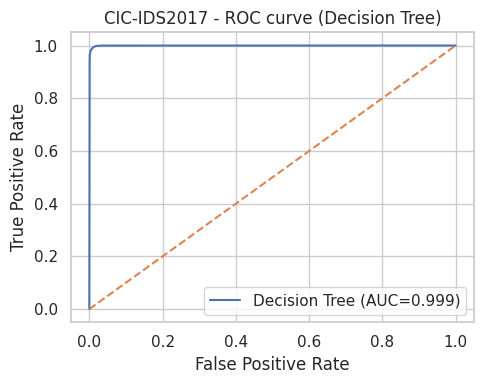

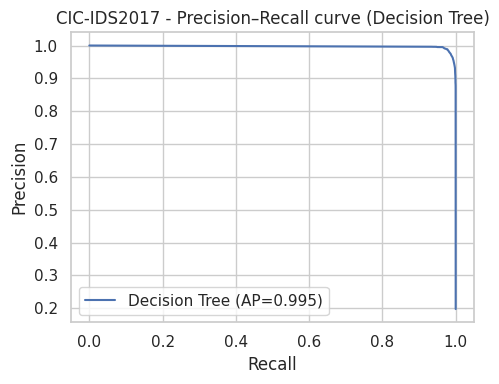

dataset         model  subsample_n  accuracy  precision    recall  \
0  CIC-IDS2017  DecisionTree       200000  0.989467   0.954615  0.993925   

   specificity  f1_score   roc_auc    pr_auc  
0     0.988369  0.973874  0.999231  0.995199

In [ ]:
dt_model_cic, dt_scaler_cic, dt_results_cic = train_test_decision_tree(
    df_cic,
    dataset_name="CIC-IDS2017",
    feature_cols=FEATURE_COLS_CIC,
    label_col="is_malicious",
    test_size=0.3,
    random_state=42,
    use_rus=True,
    subsample_n=200_000,
)


**Metrics**
- Metrics on the test set shows that the model almost perfectly separates benign and malicious traffic: Very **few missed attacks** (high recall) and very **few false alarms** (high specificity).  😺

**ROC & Precision-Recall curves**

- The **ROC curve** is essentially glued to the **top-left corner**, showing that for almost any threshold we can keep the False Positive Rate extremely low while the True Positive Rate stays close to 1.  
- The **Precision-Recall curve** stays near the **top-right corner** and only drops at extreme recall, confirming that alerts remain highly precise even when we recover almost all attacks.  

Overall, on CIC-IDS2017 this decision tree behaves like a **near-perfect classifier**, thanks to the clear structure in the features and the rebalanced training set. 😺

###Random Forest

This section trains and evaluates a **Random Forest classifier** on the CIC-IDS2017 dataset, using a balanced train set obtained via RandomUnderSampler and MinMax scaling of features. It then reports a complete set of metrics (Accuracy, Precision, Recall, Specificity, F1, ROC AUC, PR AUC), plots the ROC and Precision–Recall curves, and returns a small `results_df` summarizing the performance for later comparison across datasets and models.

In [ ]:
def train_test_random_forest(
    df,
    dataset_name="dataset",
    feature_cols=None,
    label_col="is_malicious",
    test_size=0.3,
    random_state=42,
    use_rus=True,
    subsample_n=200_000,   # adjust up/down to control runtime
):
    if feature_cols is None:
        raise ValueError("feature_cols cannot be None")

    print(f"RANDOM FOREST - TRAIN / TEST - {dataset_name}")

    # 1) Optional global subsampling (to speed up training)
    df_work = df.copy()
    if subsample_n is not None and subsample_n < len(df_work):
        df_work = df_work.sample(n=subsample_n, random_state=random_state)
        print(f"Global subsample to {subsample_n} rows (out of {len(df)} total).")
    else:
        print(f"No subsampling applied (rows: {len(df_work)}).")

    X = df_work[feature_cols].copy()
    y = df_work[label_col].astype(int)

    # 2) Train / test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    print("\nOriginal TRAIN distribution:")
    print(y_train.value_counts())

    # 3) RandomUnderSampler on TRAIN
    if use_rus:
        rus = RandomUnderSampler(sampling_strategy="auto", random_state=random_state)
        X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)
        print("\nTRAIN distribution after RandomUnderSampler:")
        print(y_train_bal.value_counts())
    else:
        X_train_bal, y_train_bal = X_train, y_train

    # 4) MinMax scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_bal)
    X_test_scaled  = scaler.transform(X_test)

    # 5) Random Forest definition
    rf_clf = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_leaf=10,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=random_state,
    )

    print("\n=== TRAINING RANDOM FOREST ===")
    rf_clf.fit(X_train_scaled, y_train_bal)

    # 6) Predict + metrics on TEST
    y_pred  = rf_clf.predict(X_test_scaled)
    y_score = rf_clf.predict_proba(X_test_scaled)[:, 1]

    print("\nClassification report:")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:")
    print(cm)

    # Basic metrics (assuming 0 = benign, 1 = malicious)
    tn, fp, fn, tp = cm.ravel()

    acc = (y_pred == y_test).mean()
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    specificity = tn / (tn + fp)

    roc_auc = roc_auc_score(y_test, y_score)
    pr_auc  = average_precision_score(y_test, y_score)

    print(f"\nAccuracy    : {acc:.4f}")
    print(f"Precision   : {prec:.4f}")
    print(f"Recall      : {rec:.4f}")
    print(f"Specificity : {specificity:.4f}")
    print(f"F1-score    : {f1:.4f}")
    print(f"ROC AUC     : {roc_auc:.4f}")
    print(f"PR AUC      : {pr_auc:.4f} (Average Precision)")

    # 7) ROC and Precision–Recall curves
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"Random Forest (AUC={roc_auc:.3f})")
    plt.plot([0,1],[0,1],"--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{dataset_name} - ROC curve (Random Forest)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    prec_curve, rec_curve, _ = precision_recall_curve(y_test, y_score)
    plt.figure(figsize=(5,4))
    plt.plot(rec_curve, prec_curve, label=f"Random Forest (AP={pr_auc:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{dataset_name} - Precision–Recall curve (Random Forest)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 8) Summary in a DataFrame (for model comparison)
    results_df = pd.DataFrame(
        [{
            "dataset": dataset_name,
            "model": "RandomForest",
            "subsample_n": len(df_work),
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "specificity": specificity,
            "f1_score": f1,
            "roc_auc": roc_auc,
            "pr_auc": pr_auc,
        }]
    )

    display(results_df)
    return rf_clf, scaler, results_df


RANDOM FOREST - TRAIN / TEST - CIC-IDS2017
Global subsample to 200000 rows (out of 2827876 total).

Original TRAIN distribution:
is_malicious
0    112349
1     27651
Name: count, dtype: int64

TRAIN distribution after RandomUnderSampler:
is_malicious
0    27651
1    27651
Name: count, dtype: int64

=== TRAINING RANDOM FOREST ===

Classification report:
              precision    recall  f1-score   support

           0     0.9988    0.9974    0.9981     48149
           1     0.9896    0.9953    0.9924     11851

    accuracy                         0.9970     60000
   macro avg     0.9942    0.9963    0.9953     60000
weighted avg     0.9970    0.9970    0.9970     60000

Confusion matrix:
[[48025   124]
 [   56 11795]]

Accuracy    : 0.9970
Precision   : 0.9896
Recall      : 0.9953
Specificity : 0.9974
F1-score    : 0.9924
ROC AUC     : 0.9998
PR AUC      : 0.9992 (Average Precision)


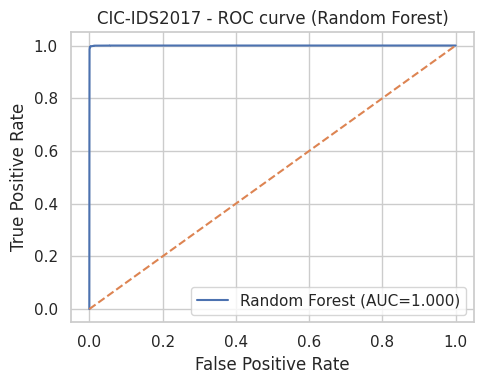

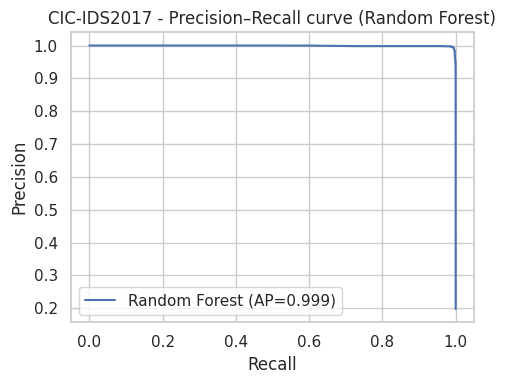

dataset         model  subsample_n  accuracy  precision    recall  \
0  CIC-IDS2017  RandomForest       200000     0.997   0.989596  0.995275   

   specificity  f1_score   roc_auc    pr_auc  
0     0.997425  0.992427  0.999817  0.999154

In [ ]:
rf_model_cic, rf_scaler_cic, rf_results_cic = train_test_random_forest(
    df_cic,
    dataset_name="CIC-IDS2017",
    feature_cols=FEATURE_COLS_CIC,
    label_col="is_malicious",
    test_size=0.3,
    random_state=42,
    use_rus=True,
    subsample_n=200_000,
)


**Metrics**

- Metrics on the test set show that the **Random Forest** almost perfectly separates benign and malicious traffic:  
  **Accuracy ≈ 0.997**, **Precision ≈ 0.99**, **Recall ≈ 0.995**, **Specificity ≈ 0.997** and **F1-score ≈ 0.992**.  
  This means we have **very few missed attacks** and **very few false alarms** at the same time. 😺  

**ROC & Precision-Recall curves**

- The **ROC curve** is essentially glued to the **top-left corner** (ROC AUC ≈ 0.9998), showing that for almost any threshold the False Positive Rate remains extremely low while the True Positive Rate stays close to 1.  
- The **Precision-Recall curve** stays near the **top-right corner** with **PR AUC ≈ 0.9992**, confirming that alerts are almost always correct even when we recover nearly all attacks.  

Overall, on CIC-IDS2017 this Random Forest acts as a **near-perfect classifier**, benefiting from the rich flow features and the balanced training set. 😺



###KNN

This function trains and evaluates a **K-Nearest Neighbors (KNN) classifier** on the CIC-IDS2017 dataset, using a balanced train set obtained via RandomUnderSampler and MinMax scaling of features. It then computes a full set of metrics (Accuracy, Precision, Recall, Specificity, F1, ROC AUC, PR AUC), plots the ROC and Precision–Recall curves, and returns a `results_df` summarizing the performance for later comparison across datasets and models.

In [ ]:
def train_test_knn(
    df,
    dataset_name="dataset",
    feature_cols=None,
    label_col="is_malicious",
    test_size=0.3,
    random_state=42,
    use_rus=True,
    subsample_n=100_000,   # KNN usually requires a smaller subsample
):
    if feature_cols is None:
        raise ValueError("feature_cols cannot be None")

    print(f"KNN - TRAIN / TEST - {dataset_name}")

    # 1) Optional subsampling (to speed up computation)
    df_work = df.copy()
    if subsample_n is not None and subsample_n < len(df_work):
        df_work = df_work.sample(n=subsample_n, random_state=random_state)
        print(f"Global subsample to {subsample_n} rows (out of {len(df)} total).")
    else:
        print(f"No subsampling applied (rows: {len(df_work)}).")

    X = df_work[feature_cols].copy()
    y = df_work[label_col].astype(int)

    # 2) Train / test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    print("\nOriginal TRAIN distribution:")
    print(y_train.value_counts())

    # 3) RandomUnderSampler on TRAIN
    if use_rus:
        rus = RandomUnderSampler(sampling_strategy="auto", random_state=random_state)
        X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)
        print("\nTRAIN distribution after RandomUnderSampler:")
        print(y_train_bal.value_counts())
    else:
        X_train_bal, y_train_bal = X_train, y_train

    # 4) MinMax scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_bal)
    X_test_scaled  = scaler.transform(X_test)

    # 5) KNN definition
    knn_clf = KNeighborsClassifier(
        n_neighbors=5,
        weights="distance",
        metric="minkowski",
    )

    print("\n=== TRAINING KNN ===")
    knn_clf.fit(X_train_scaled, y_train_bal)

    # 6) Predictions and metrics
    y_pred  = knn_clf.predict(X_test_scaled)
    y_score = knn_clf.predict_proba(X_test_scaled)[:, 1]

    print("\nClassification report:")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:")
    print(cm)

    # Basic metrics (assuming 0 = benign, 1 = malicious)
    tn, fp, fn, tp = cm.ravel()

    acc = (y_pred == y_test).mean()
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    specificity = tn / (tn + fp)

    roc_auc = roc_auc_score(y_test, y_score)
    pr_auc  = average_precision_score(y_test, y_score)

    print(f"\nAccuracy    : {acc:.4f}")
    print(f"Precision   : {prec:.4f}")
    print(f"Recall      : {rec:.4f}")
    print(f"Specificity : {specificity:.4f}")
    print(f"F1-score    : {f1:.4f}")
    print(f"ROC AUC     : {roc_auc:.4f}")
    print(f"PR AUC      : {pr_auc:.4f} (Average Precision)")

    # 7) ROC and Precision–Recall curves
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"KNN (AUC={roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], "--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{dataset_name} - ROC curve (KNN)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    prec_curve, rec_curve, _ = precision_recall_curve(y_test, y_score)
    plt.figure(figsize=(5, 4))
    plt.plot(rec_curve, prec_curve, label=f"KNN (AP={pr_auc:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{dataset_name} - Precision–Recall curve (KNN)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 8) Summary DataFrame for model comparison
    results_df = pd.DataFrame(
        [{
            "dataset": dataset_name,
            "model": "KNN",
            "subsample_n": len(df_work),
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "specificity": specificity,
            "f1_score": f1,
            "roc_auc": roc_auc,
            "pr_auc": pr_auc,
        }]
    )

    display(results_df)
    return knn_clf, scaler, results_df


KNN - TRAIN / TEST - CIC-IDS2017
Global subsample to 200000 rows (out of 2827876 total).

Original TRAIN distribution:
is_malicious
0    112349
1     27651
Name: count, dtype: int64

TRAIN distribution after RandomUnderSampler:
is_malicious
0    27651
1    27651
Name: count, dtype: int64

=== TRAINING KNN ===

Classification report:
              precision    recall  f1-score   support

           0     0.9981    0.9835    0.9908     48149
           1     0.9367    0.9926    0.9638     11851

    accuracy                         0.9853     60000
   macro avg     0.9674    0.9880    0.9773     60000
weighted avg     0.9860    0.9853    0.9854     60000

Confusion matrix:
[[47354   795]
 [   88 11763]]

Accuracy    : 0.9853
Precision   : 0.9367
Recall      : 0.9926
Specificity : 0.9835
F1-score    : 0.9638
ROC AUC     : 0.9952
PR AUC      : 0.9679 (Average Precision)


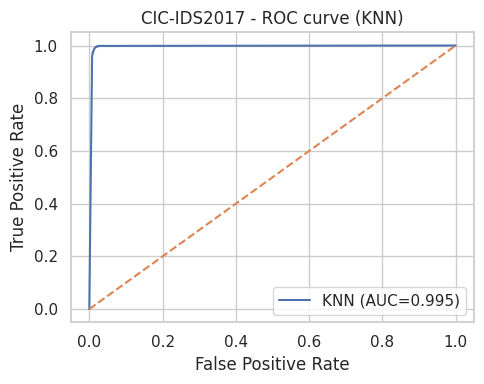

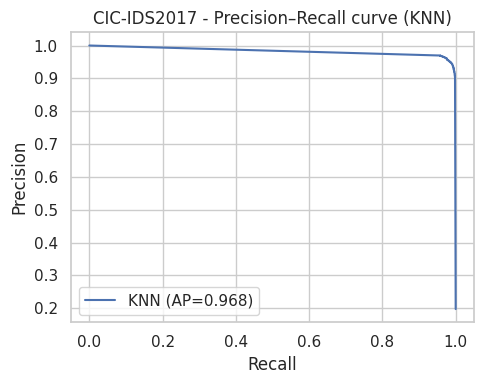

dataset model  subsample_n  accuracy  precision    recall  specificity  \
0  CIC-IDS2017   KNN       200000  0.985283   0.936694  0.992574     0.983489   

   f1_score   roc_auc   pr_auc  
0  0.963825  0.995207  0.96791

In [ ]:
knn_model_cic, knn_scaler_cic, knn_results_cic = train_test_knn(
    df_cic,
    dataset_name="CIC-IDS2017",
    feature_cols=FEATURE_COLS_CIC,
    label_col="is_malicious",
    test_size=0.3,
    random_state=42,
    use_rus=True,
    subsample_n=200_000,
)


**Metrics**

- Metrics on the test set show that **KNN** is also a very strong classifier on CIC-IDS2017:  
  **Accuracy ≈ 0.985**, **Precision ≈ 0.937**, **Recall ≈ 0.993**, **Specificity ≈ 0.983** and **F1-score ≈ 0.964**.  
  This means the model detects **almost all attacks** while keeping a good control on false positives, although it is slightly weaker than the Random Forest. 😺  

**ROC & Precision-Recall curves**

- The **ROC curve** lies very close to the **top-left corner** (ROC AUC ≈ 0.995), indicating excellent separation between benign and malicious flows across thresholds.  
- The **Precision-Recall curve** stays high (PR AUC ≈ 0.968), dropping only when recall approaches 1, which confirms that alerts remain mostly correct even when we try to capture nearly all attacks.  

Overall, KNN provides a **high-quality, distance-based baseline** on CIC-IDS2017, consistent with the strong performance of tree-based models.


##Results

In [ ]:
# Collect all result DataFrames in a list
all_results = [
    svm_results_cic,
    dt_results_cic,
    rf_results_cic,
    knn_results_cic,
]

# Concatenate into a single summary table
summary_table = pd.concat(all_results, ignore_index=True)

# Optionally sort by accuracy in descending order
summary_table = summary_table.sort_values(by="accuracy", ascending=False)

# Display the summary table
display(summary_table)


dataset         model  subsample_n  accuracy  precision    recall  \
2  CIC-IDS2017  RandomForest       200000  0.997000   0.989596  0.995275   
1  CIC-IDS2017  DecisionTree       200000  0.989467   0.954615  0.993925   
3  CIC-IDS2017           KNN       200000  0.985283   0.936694  0.992574   
0  CIC-IDS2017       SVM_RBF        50000  0.940467   0.784276  0.966477   

   specificity  f1_score   roc_auc    pr_auc  
2     0.997425  0.992427  0.999817  0.999154  
1     0.988369  0.973874  0.999231  0.995199  
3     0.983489  0.963825  0.995207  0.967910  
0     0.934010  0.865896  0.989163  0.958765

On the alternative dataset CIC-IDS2017 all four models achieve very strong results.  
The best performer is **RandomForest** (accuracy ≈0.997, F1 ≈0.992, ROC/PR AUC ≈1), closely followed by the **DecisionTree** and then **KNN**, which still reaches accuracy above 0.985.  
The **SVM_RBF** trained on a smaller subsample (50k flows) performs slightly worse but remains a strong baseline, with accuracy around 0.94 and good Recall for attacks.  

This gives us a solid reference point to compare against the performance we obtained on our main IoT-23 dataset.


## Comparison between IoT-23 (our main dataset) and CIC-IDS2017 (alternative dataset)

Below we compare the **same four families of models** on the two datasets, using the main metrics reported in our tables.

| Model           | Dataset      | Accuracy | Precision | Recall | Specificity | F1-score |
|----------------|-------------|----------|-----------|--------|------------|---------|
| **RandomForest** (RF_RandomForest_GSlight / RandomForest) | **IoT-23**      | ~0.91   | ~0.97    | ~0.92 | ~0.83     | ~0.83   |
|                | **CIC-IDS2017** | **0.997** | **0.990**  | **0.995** | **0.997**   | **0.992** |
| **Decision Tree** (DT_DecisionTree_GS / DecisionTree)     | **IoT-23**      | ~0.91   | ~0.97    | ~0.92 | ~0.83     | ~0.83   |
|                | **CIC-IDS2017** | 0.989  | 0.955   | 0.994 | 0.988    | 0.974  |
| **KNN** (KNN_small / KNN)                                | **IoT-23**      | ~0.91   | ~0.97    | ~0.92 | ~0.83     | ~0.83   |
|                | **CIC-IDS2017** | 0.985  | 0.937   | 0.993 | 0.983    | 0.964  |
| **SVM RBF** (SVCrbf_u_prob / SVM_RBF)                    | **IoT-23**      | ~0.86   | ~0.97    | ~0.87 | ~0.84     | ~0.84   |
|                | **CIC-IDS2017** | 0.940  | 0.784   | 0.966 | 0.934    | 0.866  |



- On **CIC-IDS2017** all four models reach **very high performance**, with Random Forest and Decision Tree almost perfect (accuracy and recall > 0.98).  
- On **IoT-23** the *same families* of models are still strong but clearly **lower**, especially in specificity and F1-score: the traffic is more heterogeneous and the boundary between benign and malicious is harder to learn.

**Why our IoT-23 dataset gives worse results than CIC-IDS2017**

The lower metrics on IoT-23 are mainly due to the **nature of the data**, not to weaker models:

- **More heterogeneous traffic:** IoT-23 contains many different IoT malware families and several benign scenarios. Their flows often overlap in the same feature space (bytes, packets, duration, conn_state), so the boundary between benign and malicious traffic is much less clear.

- **Stronger and “messier” imbalance:** Some attack types in IoT-23 are rare and noisy, which makes them hard to learn without overfitting or increasing false positives.

- **Less separable patterns:** After subsampling and rebalancing, CIC-IDS2017 shows more homogeneous and distinct behaviours for benign vs malicious flows, so tree models, KNN and SVM can separate the classes almost perfectly.  
  On IoT-23 the same models face **higher variability and ambiguity**, so Accuracy, Specificity and F1-score inevitably remain lower even though the modelling approach is the same.😿

